Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Batch 01: zip file part 49
import os
os.chdir('/content/drive/My Drive/kaggle')
os.makedirs('batch03', exist_ok=True)
os.chdir('/content/drive/My Drive/kaggle/batch03')

!pwd

/content/drive/My Drive/kaggle/batch03


In [0]:
!unzip -o '*.zip'

Archive:  dfdc_train_part_47.zip
  inflating: dfdc_train_part_47/aakjukgjme.mp4  
  inflating: dfdc_train_part_47/abrfkdizen.mp4  
  inflating: dfdc_train_part_47/abwijcvcbe.mp4  
  inflating: dfdc_train_part_47/abwvxlfyvh.mp4  
  inflating: dfdc_train_part_47/acdichcibo.mp4  
  inflating: dfdc_train_part_47/acgdmcpqoe.mp4  
  inflating: dfdc_train_part_47/achejkrwas.mp4  
  inflating: dfdc_train_part_47/aciukwyoli.mp4  
  inflating: dfdc_train_part_47/acubjjdopy.mp4  
  inflating: dfdc_train_part_47/adyiotxxxu.mp4  
  inflating: dfdc_train_part_47/aecunwnmcw.mp4  
  inflating: dfdc_train_part_47/aemfpfwron.mp4  
  inflating: dfdc_train_part_47/aetpnobkcv.mp4  
  inflating: dfdc_train_part_47/aeviyhvand.mp4  
  inflating: dfdc_train_part_47/aezyoffjsd.mp4  
  inflating: dfdc_train_part_47/affymoposl.mp4  
  inflating: dfdc_train_part_47/aflspexpuy.mp4  
  inflating: dfdc_train_part_47/afrwahmczi.mp4  
  inflating: dfdc_train_part_47/afslhsyvcg.mp4  
  inflating: dfdc_train_part_47/afvb

Code

In [0]:
import pickle
import sys
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 
import cv2 as cv

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
DATA_FOLDER = '/content/drive/My Drive/kaggle'
TRAIN_SAMPLE_FOLDER = 'batch03/dfdc_train_part_47'
TEST_FOLDER = 'test_videos'

print(f"Train samples: {len(os.listdir(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER)))}")
print(f"Test samples: {len(os.listdir(os.path.join(DATA_FOLDER, TEST_FOLDER)))}")

Train samples: 2407
Test samples: 60


In [0]:
train_list = list(os.listdir(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER)))
ext_dict = []
for file in train_list:
    file_ext = file.split('.')[1]
    if (file_ext not in ext_dict):
        ext_dict.append(file_ext)
print(f"Extensions: {ext_dict}")

for file_ext in ext_dict:
    print(f"Files with extension `{file_ext}`: {len([file for file in train_list if  file.endswith(file_ext)])}")
  
test_list = list(os.listdir(os.path.join(DATA_FOLDER, TEST_FOLDER)))
ext_dict = []
for file in test_list:
    file_ext = file.split('.')[1]
    if (file_ext not in ext_dict):
        ext_dict.append(file_ext)
print(f"Extensions: {ext_dict}")
for file_ext in ext_dict:
    print(f"Files with extension `{file_ext}`: {len([file for file in train_list if  file.endswith(file_ext)])}")

json_file = [file for file in train_list if  file.endswith('json')][0]
print(f"JSON file: {json_file}")

def get_meta_from_json(path):
    df = pd.read_json(os.path.join(DATA_FOLDER, path, json_file))
    df = df.T
    return df

meta_train_df = get_meta_from_json(TRAIN_SAMPLE_FOLDER)
meta_train_df.head()

Extensions: ['mp4', 'json']
Files with extension `mp4`: 2406
Files with extension `json`: 1
Extensions: ['mp4']
Files with extension `mp4`: 2406
JSON file: metadata.json


,label,split,original
qzhrdqxpax.mp4,FAKE,train,rlhmppiklf.mp4
mthkmtbuab.mp4,REAL,train,NaN
jgmtynuyqc.mp4,FAKE,train,xkrhzvriqg.mp4
fbosopvlqz.mp4,FAKE,train,ivssyazqtr.mp4
trzdsncewk.mp4,FAKE,train,fsxwyhjxgo.mp4


In [0]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [0]:
missing_data(meta_train_df)

,label,split,original
Total,0,0,515
Percent,0,0,16.4327
Types,object,object,object


In [0]:
missing_data(meta_train_df.loc[meta_train_df.label=='REAL'])

,label,split,original
Total,0,0,515
Percent,0,0,100
Types,object,object,object


In [0]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [0]:
unique_values(meta_train_df)

,label,split,original
Total,3134,3134,2619
Uniques,2,1,515


In [0]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [0]:
most_frequent_values(meta_train_df)

,label,split,original
Total,3134,3134,2619
Most frequent item,FAKE,train,qaqeyfsjzt.mp4
Frequence,2619,3134,18
Percent from total,83.567,100,0.687


In [0]:
def plot_count(feature, title, df, size=1):
    '''
    Plot count of classes / feature
    param: feature - the feature to analyze
    param: title - title to add to the graph
    param: df - dataframe from which we plot feature's classes distribution 
    param: size - default 1.
    '''
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

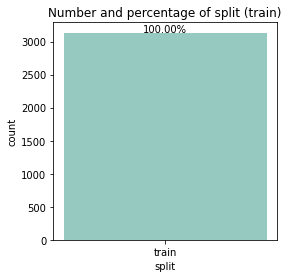

In [0]:
plot_count('split', 'split (train)', meta_train_df)


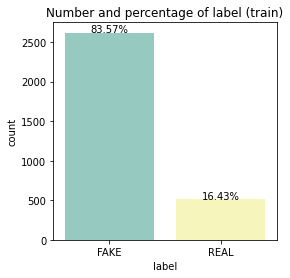

In [0]:
plot_count('label', 'label (train)', meta_train_df)


In [0]:
meta = np.array(list(meta_train_df.index))
storage = np.array([file for file in train_list if  file.endswith('mp4')])
print(f"Metadata: {meta.shape[0]}, Folder: {storage.shape[0]}")
print(f"Files in metadata and not in folder: {np.setdiff1d(meta,storage,assume_unique=False).shape[0]}")
print(f"Files in folder and not in metadata: {np.setdiff1d(storage,meta,assume_unique=False).shape[0]}")

Metadata: 3134, Folder: 3134
Files in metadata and not in folder: 0
Files in folder and not in metadata: 0


In [0]:
fake_train_sample_video = list(meta_train_df.loc[meta_train_df.label=='FAKE'].sample(3).index)
fake_train_sample_video

['bmioepcpsx.mp4', 'dzieklokdr.mp4', 'dhcselezer.mp4']

In [0]:
def display_image_from_video(video_path):
    '''
    input: video_path - path for video
    process:
    1. perform a video capture from the video
    2. read the image
    3. display the image
    '''
    capture_image = cv.VideoCapture(video_path) 
    ret, frame = capture_image.read()
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    ax.imshow(frame)
    print(frame.shape)

(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)


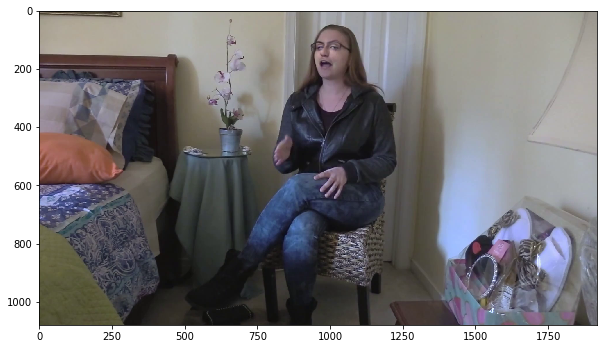

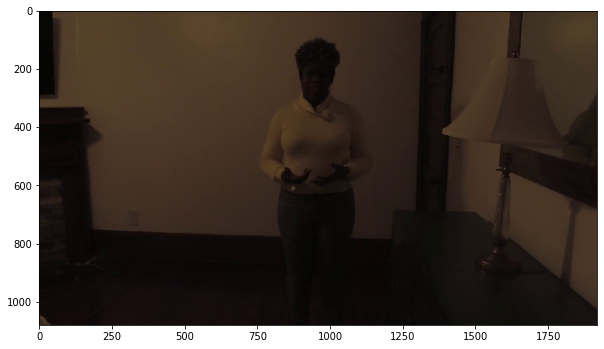

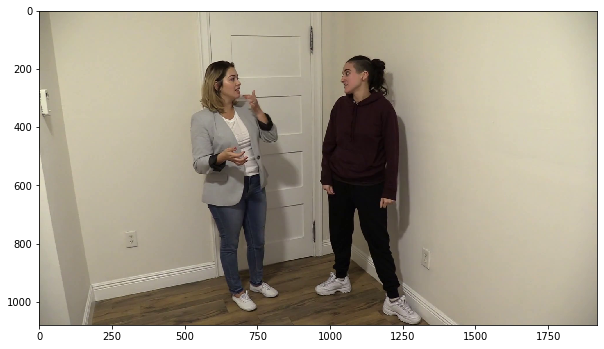

In [0]:
for video_file in fake_train_sample_video:
    display_image_from_video(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER, video_file))

Face extraction

In [0]:
# Install facenet
!pip install facenet-pytorch

In [0]:
from facenet_pytorch import MTCNN, InceptionResnetV1
from tqdm import tqdm
from collections import defaultdict
import os

In [0]:
def sampleFacesFromVid(link, offset=0, interval=30, mtcnn=MTCNN(margin=20, keep_all=True, post_process=False, device='cuda:0'), showimg=False):
  try:
    print("Extracting Face from: ", link)
    # Load a video
    v_cap = cv.VideoCapture(link)
    v_len = int(v_cap.get(cv.CAP_PROP_FRAME_COUNT))

    # Loop through video, taking a handful of frames to form a batch
    frames = []
    for i in tqdm(range(v_len)):
        
        # Load frame
        success = v_cap.grab()
        if i % interval == offset:
            success, frame = v_cap.retrieve()
        else:
            continue
        if not success:
            continue
            
        # Add to batch
        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        frames.append(Image.fromarray(frame))

    # Detect faces in batch
    faces = mtcnn(frames)
    
    if showimg:
      fig, axes = plt.subplots(len(faces), 2, figsize=(6, 15))
      for i, frame_faces in enumerate(faces):
        for j, face in enumerate(frame_faces):
          axes[i, j].imshow(face.permute(1, 2, 0).int().numpy())
          axes[i, j].axis('off')
      fig.show()

    return faces
  except:
    print("Failed for file: ", link)

In [0]:
def saveFacesToPics(faces, dirPrefix=""):
  try:
    d = defaultdict(list)
    for i, frame_faces in enumerate(faces):
      for j, face in enumerate(frame_faces):
        faceObj = face.permute(1, 2, 0).int().numpy().astype(np.float32)
        d[j].append(faceObj)

    count = max([len(v) for k, v, in d.items()])
    for k, v in d.items():
      if len(v) == count:
        if dirPrefix:
          os.makedirs(dirPrefix + "face_" + str(k), exist_ok=True)  # succeeds even if directory exists.
        # Save files
        num = 0
        for img in v:
          cv.imwrite(os.path.join(dirPrefix + "face_" + str(k), str(num).zfill(2) + '.png'), cv.cvtColor(img, cv.COLOR_RGB2BGR))
          num += 1
  except:
    print("Failed for file: ", dirPrefix)


In [0]:
def saveFacesToArray(faces):
  try:
    d = defaultdict(list)
    for i, frame_faces in enumerate(faces):
      for j, face in enumerate(frame_faces):
        faceObj = face.permute(1, 2, 0).int().numpy().astype(np.float32)
        d[j].append(faceObj)

    count = max([len(v) for k, v, in d.items()])

    data = []
    for k, v in d.items():
      if len(v) == count:
        data.append([cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in v])
    
    return data

  except:
    print("Failed!")
    return []

In [0]:
def saveBatch(data, labels, name="output"):
  d = defaultdict(list)

  d['y'] = labels

  for frameList in data:
    for i in range(0, 10):
      d['x' + str(i)].append(frameList[i])

  d = dict(d)
  np.save(name, np.array(dict(d)))

Extract faces and save

In [0]:
os.makedirs('/content/drive/My Drive/kaggle/batch03/', exist_ok=True)
os.chdir('/content/drive/My Drive/kaggle/batch03/')

DATA_FOLDER = '/content/drive/My Drive/kaggle'
TRAIN_SAMPLE_FOLDER = 'batch03/dfdc_train_part_47'
TEST_FOLDER = 'test_videos'

mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device='cuda:0')

passNum, passIdx = 0, 0

train_list = list(os.listdir(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER)))

batchNum, batchIdx, batchCount = 256, 0, 0
data, target = [], []

for file in train_list:
  if file == "metadata.json":
    continue

  if passNum > passIdx:
    passIdx += 1
    continue
  
  print(batchIdx)

  label = meta_train_df.loc[file, 'label']
  faces = sampleFacesFromVid(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER, file), mtcnn=mtcnn)
  arr = saveFacesToArray(faces)
  data.extend(arr)
  target.extend([label for _ in arr])
  batchIdx += 1

  if label == 'REAL':
    # Multiple sample for real
    print("Multiple sample for REAL: ", file)
    for ofst in [8, 16, 24]:
      faces = sampleFacesFromVid(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER, file), offset=ofst, interval=30, mtcnn=mtcnn)
      arr = saveFacesToArray(faces)
      data.extend(arr)
      target.extend([label for _ in arr])
      batchIdx += 1

  if batchIdx >= batchNum:
    saveBatch(data, target, name="batch_" + str(batchCount))
    data.clear()
    target.clear()
    batchIdx = 0
    batchCount += 1

saveBatch(data, target, name="batch_" + str(batchCount))

0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aakjukgjme.mp4


100%|██████████| 300/300 [00:02<00:00, 137.38it/s]


1
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/abrfkdizen.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.67it/s]

Multiple sample for REAL:  abrfkdizen.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/abrfkdizen.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.80it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/abrfkdizen.mp4


  4%|▍         | 12/300 [00:00<00:02, 106.40it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/abrfkdizen.mp4


100%|██████████| 300/300 [00:02<00:00, 132.94it/s]


5
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/abwijcvcbe.mp4


100%|██████████| 300/300 [00:02<00:00, 119.07it/s]


6
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/abwvxlfyvh.mp4


100%|██████████| 301/301 [00:01<00:00, 183.42it/s]


7
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/acdichcibo.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.75it/s]

Multiple sample for REAL:  acdichcibo.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/acdichcibo.mp4


  4%|▍         | 12/300 [00:00<00:02, 107.17it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/acdichcibo.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.66it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/acdichcibo.mp4


100%|██████████| 300/300 [00:02<00:00, 134.14it/s]


11
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/acgdmcpqoe.mp4


100%|██████████| 300/300 [00:02<00:00, 128.72it/s]


12
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/achejkrwas.mp4


100%|██████████| 300/300 [00:02<00:00, 139.94it/s]


13
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aciukwyoli.mp4


100%|██████████| 300/300 [00:02<00:00, 135.24it/s]


14
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/acubjjdopy.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.47it/s]

Multiple sample for REAL:  acubjjdopy.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/acubjjdopy.mp4


  3%|▎         | 10/300 [00:00<00:03, 92.15it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/acubjjdopy.mp4


  3%|▎         | 10/300 [00:00<00:03, 93.06it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/acubjjdopy.mp4


100%|██████████| 300/300 [00:02<00:00, 111.13it/s]


18
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/adyiotxxxu.mp4


100%|██████████| 300/300 [00:02<00:00, 115.29it/s]


19
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aecunwnmcw.mp4


  3%|▎         | 8/300 [00:00<00:03, 74.24it/s]

Multiple sample for REAL:  aecunwnmcw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aecunwnmcw.mp4


  3%|▎         | 8/300 [00:00<00:04, 71.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aecunwnmcw.mp4


  2%|▏         | 6/300 [00:00<00:05, 57.46it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aecunwnmcw.mp4


100%|██████████| 300/300 [00:02<00:00, 114.84it/s]


23
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aemfpfwron.mp4


100%|██████████| 300/300 [00:02<00:00, 143.85it/s]


24
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aetpnobkcv.mp4


100%|██████████| 300/300 [00:02<00:00, 147.88it/s]


25
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aeviyhvand.mp4


100%|██████████| 300/300 [00:02<00:00, 140.52it/s]


26
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aezyoffjsd.mp4


100%|██████████| 300/300 [00:02<00:00, 111.98it/s]


Failed!
27
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/affymoposl.mp4


100%|██████████| 300/300 [00:02<00:00, 129.77it/s]


28
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aflspexpuy.mp4


100%|██████████| 300/300 [00:01<00:00, 159.43it/s]


29
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/afrwahmczi.mp4


100%|██████████| 300/300 [00:02<00:00, 120.60it/s]


30
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/afslhsyvcg.mp4


100%|██████████| 300/300 [00:02<00:00, 122.67it/s]


31
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/afvbnsjcyu.mp4


100%|██████████| 301/301 [00:01<00:00, 266.31it/s]


32
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/afxuuxmywr.mp4


100%|██████████| 300/300 [00:02<00:00, 142.45it/s]


33
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/agcdaizeff.mp4


100%|██████████| 300/300 [00:02<00:00, 148.09it/s]


34
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/agcoyyzeju.mp4


  3%|▎         | 8/300 [00:00<00:03, 75.75it/s]

Multiple sample for REAL:  agcoyyzeju.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/agcoyyzeju.mp4


  2%|▏         | 6/300 [00:00<00:05, 52.55it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/agcoyyzeju.mp4


  3%|▎         | 8/300 [00:00<00:03, 75.74it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/agcoyyzeju.mp4


100%|██████████| 300/300 [00:02<00:00, 120.14it/s]


38
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/agfyfocump.mp4


100%|██████████| 300/300 [00:02<00:00, 135.32it/s]


39
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/agktbbxwla.mp4


100%|██████████| 300/300 [00:02<00:00, 135.74it/s]


40
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/agsvesfhlc.mp4


100%|██████████| 300/300 [00:01<00:00, 150.08it/s]


41
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ahihejgaoi.mp4


100%|██████████| 300/300 [00:02<00:00, 145.02it/s]


42
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ahnhwpxegb.mp4


100%|██████████| 300/300 [00:02<00:00, 134.66it/s]


Failed!
43
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ahvatznenl.mp4


100%|██████████| 301/301 [00:01<00:00, 290.06it/s]


44
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ahzuhugjto.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.39it/s]

Multiple sample for REAL:  ahzuhugjto.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ahzuhugjto.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.99it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ahzuhugjto.mp4


  4%|▍         | 13/300 [00:00<00:02, 124.04it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ahzuhugjto.mp4


100%|██████████| 300/300 [00:01<00:00, 150.56it/s]


48
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aiihfyykkb.mp4


100%|██████████| 300/300 [00:02<00:00, 116.90it/s]


49
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aildcyhkso.mp4


100%|██████████| 300/300 [00:02<00:00, 144.36it/s]


50
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ailhqhhqtl.mp4


100%|██████████| 300/300 [00:02<00:00, 143.93it/s]


51
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/airktntzqp.mp4


100%|██████████| 300/300 [00:27<00:00, 11.02it/s]


52
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aivslmwqcd.mp4


100%|██████████| 301/301 [00:01<00:00, 300.04it/s]


53
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aizdhhesnq.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.60it/s]

Multiple sample for REAL:  aizdhhesnq.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aizdhhesnq.mp4


  4%|▍         | 13/300 [00:00<00:02, 125.14it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aizdhhesnq.mp4


  4%|▍         | 13/300 [00:00<00:02, 123.18it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aizdhhesnq.mp4


100%|██████████| 300/300 [00:02<00:00, 142.02it/s]


57
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ajbxbxcrdo.mp4


  3%|▎         | 9/300 [00:00<00:03, 81.26it/s]

Multiple sample for REAL:  ajbxbxcrdo.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ajbxbxcrdo.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.55it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ajbxbxcrdo.mp4


  4%|▎         | 11/300 [00:00<00:02, 99.13it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ajbxbxcrdo.mp4


100%|██████████| 300/300 [00:02<00:00, 142.92it/s]


61
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ajintjubct.mp4


100%|██████████| 300/300 [00:02<00:00, 138.27it/s]


62
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ajmvszeaho.mp4


100%|██████████| 300/300 [00:02<00:00, 127.41it/s]


63
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ajxkvlpgov.mp4


100%|██████████| 300/300 [00:01<00:00, 150.40it/s]


64
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/akdvkdoyoh.mp4


  4%|▍         | 13/300 [00:00<00:02, 120.01it/s]

Multiple sample for REAL:  akdvkdoyoh.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/akdvkdoyoh.mp4


  5%|▌         | 15/300 [00:00<00:02, 139.29it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/akdvkdoyoh.mp4


  5%|▌         | 15/300 [00:00<00:01, 143.12it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/akdvkdoyoh.mp4


100%|██████████| 300/300 [00:01<00:00, 161.52it/s]


68
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/akgyyniqoz.mp4


100%|██████████| 300/300 [00:02<00:00, 116.23it/s]


69
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/akjimeoiox.mp4


100%|██████████| 300/300 [00:02<00:00, 128.86it/s]


70
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aknynjmtzb.mp4


100%|██████████| 300/300 [00:02<00:00, 144.80it/s]


71
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/akxtsuinpj.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.52it/s]

Multiple sample for REAL:  akxtsuinpj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/akxtsuinpj.mp4


  4%|▍         | 12/300 [00:00<00:02, 108.50it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/akxtsuinpj.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.87it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/akxtsuinpj.mp4


100%|██████████| 300/300 [00:01<00:00, 152.75it/s]


75
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/akxztlfsks.mp4


100%|██████████| 300/300 [00:02<00:00, 131.99it/s]


76
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/albmkgvkhm.mp4


100%|██████████| 300/300 [00:02<00:00, 143.96it/s]


77
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aledotxnmz.mp4


100%|██████████| 300/300 [00:02<00:00, 146.89it/s]


78
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/alpmztosny.mp4


  8%|▊         | 25/301 [00:00<00:01, 237.36it/s]

Multiple sample for REAL:  alpmztosny.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/alpmztosny.mp4


  8%|▊         | 25/301 [00:00<00:01, 237.21it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/alpmztosny.mp4


  8%|▊         | 25/301 [00:00<00:01, 234.50it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/alpmztosny.mp4


100%|██████████| 301/301 [00:01<00:00, 290.06it/s]


82
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/amwmnvuftj.mp4


100%|██████████| 300/300 [00:02<00:00, 136.24it/s]


83
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/angqjpzdts.mp4


100%|██████████| 301/301 [00:01<00:00, 201.12it/s]


84
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/anjlxbnxpo.mp4


100%|██████████| 300/300 [00:01<00:00, 161.79it/s]


85
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ankmhqwytc.mp4


100%|██████████| 300/300 [00:01<00:00, 151.27it/s]


86
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ansoiwvrqm.mp4


100%|██████████| 300/300 [00:02<00:00, 139.59it/s]


87
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/anwjjhmbqt.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.28it/s]

Multiple sample for REAL:  anwjjhmbqt.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/anwjjhmbqt.mp4


  4%|▍         | 12/300 [00:00<00:02, 101.16it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/anwjjhmbqt.mp4


  4%|▍         | 12/300 [00:00<00:02, 106.38it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/anwjjhmbqt.mp4


100%|██████████| 300/300 [00:02<00:00, 143.79it/s]


91
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/anwrkkclze.mp4


100%|██████████| 300/300 [00:02<00:00, 132.63it/s]


92
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aosmlwbjrc.mp4


100%|██████████| 300/300 [00:01<00:00, 151.60it/s]


93
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aoxltdxgll.mp4


100%|██████████| 300/300 [00:02<00:00, 137.61it/s]


94
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aoyoopetdx.mp4


100%|██████████| 300/300 [00:02<00:00, 137.21it/s]


95
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/apifhdspiu.mp4


100%|██████████| 300/300 [00:01<00:00, 151.25it/s]


96
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aplurzejra.mp4


100%|██████████| 300/300 [00:02<00:00, 124.89it/s]


97
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/apofytyhxk.mp4


100%|██████████| 300/300 [00:01<00:00, 154.54it/s]


98
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aqfeqkckjs.mp4


100%|██████████| 300/300 [00:02<00:00, 141.05it/s]


99
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aqmdrnrunl.mp4


100%|██████████| 300/300 [00:02<00:00, 135.58it/s]


100
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aretvijthh.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.08it/s]

Multiple sample for REAL:  aretvijthh.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aretvijthh.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.32it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aretvijthh.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.36it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aretvijthh.mp4


100%|██████████| 300/300 [00:02<00:00, 142.27it/s]


104
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/arjhugbkjr.mp4


100%|██████████| 300/300 [00:02<00:00, 136.27it/s]


105
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/arnshkdhmt.mp4


100%|██████████| 300/300 [00:02<00:00, 142.73it/s]


106
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aryxrnnlsr.mp4


100%|██████████| 300/300 [00:02<00:00, 133.66it/s]


107
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/asbrrnbkbn.mp4


100%|██████████| 300/300 [00:02<00:00, 142.99it/s]


108
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/asfhofohez.mp4


100%|██████████| 300/300 [00:01<00:00, 152.62it/s]


109
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ashqrawqub.mp4


100%|██████████| 300/300 [00:02<00:00, 130.58it/s]


110
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/askalizlde.mp4


100%|██████████| 300/300 [00:02<00:00, 131.19it/s]


111
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/asquqxqfgt.mp4


100%|██████████| 300/300 [00:02<00:00, 138.31it/s]


112
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/astycpcvjv.mp4


100%|██████████| 300/300 [00:01<00:00, 154.35it/s]


113
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/asyngyvjas.mp4


100%|██████████| 300/300 [00:01<00:00, 152.74it/s]


114
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/atjrilmghp.mp4


100%|██████████| 300/300 [00:02<00:00, 131.95it/s]


115
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/atpavsukgc.mp4


100%|██████████| 300/300 [00:02<00:00, 136.73it/s]


116
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/atxxrvpedy.mp4


100%|██████████| 300/300 [00:02<00:00, 149.47it/s]


117
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/auaudezume.mp4


100%|██████████| 300/300 [00:02<00:00, 138.51it/s]


118
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aujoxrpddn.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.68it/s]

Multiple sample for REAL:  aujoxrpddn.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aujoxrpddn.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.60it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aujoxrpddn.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.24it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aujoxrpddn.mp4


100%|██████████| 300/300 [00:02<00:00, 149.33it/s]


122
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aukznkpjqe.mp4


100%|██████████| 300/300 [00:02<00:00, 115.93it/s]


123
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/auunxrgrox.mp4


100%|██████████| 300/300 [00:02<00:00, 144.92it/s]


124
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/auxnjvttgs.mp4


100%|██████████| 301/301 [00:01<00:00, 265.82it/s]


125
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/avktbnnfct.mp4


100%|██████████| 300/300 [00:02<00:00, 139.07it/s]


126
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/avotaeqmvc.mp4


100%|██████████| 300/300 [00:02<00:00, 139.69it/s]


127
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/avwddhpjxw.mp4


100%|██████████| 300/300 [00:02<00:00, 145.57it/s]


128
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/awsjaessrp.mp4


100%|██████████| 300/300 [00:02<00:00, 147.71it/s]


129
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/awxbgxeldd.mp4


100%|██████████| 300/300 [00:02<00:00, 135.52it/s]


130
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/axakrhimzr.mp4


100%|██████████| 300/300 [00:02<00:00, 148.08it/s]


131
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/axcjfghdur.mp4


100%|██████████| 300/300 [00:02<00:00, 142.78it/s]


132
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/axdepsfowg.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.05it/s]

Multiple sample for REAL:  axdepsfowg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/axdepsfowg.mp4


  3%|▎         | 10/300 [00:00<00:03, 88.76it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/axdepsfowg.mp4


  3%|▎         | 10/300 [00:00<00:03, 86.81it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/axdepsfowg.mp4


100%|██████████| 300/300 [00:02<00:00, 132.85it/s]


136
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/axfqvtdpqn.mp4


100%|██████████| 300/300 [00:02<00:00, 127.19it/s]


137
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/axtfaxnnir.mp4


100%|██████████| 300/300 [00:02<00:00, 133.15it/s]


138
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/axxxmqnvlo.mp4


100%|██████████| 300/300 [00:02<00:00, 135.99it/s]


139
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ayfauyvasg.mp4


100%|██████████| 300/300 [00:02<00:00, 128.64it/s]


140
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aypgpcgzzo.mp4


100%|██████████| 300/300 [00:02<00:00, 138.59it/s]


141
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ayumdlbgzg.mp4


100%|██████████| 301/301 [00:00<00:00, 308.01it/s]


142
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/aywteojccm.mp4


100%|██████████| 300/300 [00:02<00:00, 143.50it/s]


143
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/azmbudlmve.mp4


100%|██████████| 300/300 [00:02<00:00, 142.41it/s]


144
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/azrbqpomdw.mp4


100%|██████████| 300/300 [00:02<00:00, 120.82it/s]


145
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/azseubmxrc.mp4


100%|██████████| 300/300 [00:02<00:00, 141.41it/s]


146
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/baiefifser.mp4


100%|██████████| 300/300 [00:01<00:00, 166.89it/s]


147
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/balwrahloa.mp4


100%|██████████| 300/300 [00:02<00:00, 127.00it/s]


148
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/banbcqfqmw.mp4


100%|██████████| 300/300 [00:02<00:00, 123.07it/s]


149
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/baolpdzfsz.mp4


100%|██████████| 300/300 [00:02<00:00, 140.53it/s]


150
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bbgkukkicj.mp4


100%|██████████| 300/300 [00:02<00:00, 131.54it/s]


151
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bcawixfkln.mp4


100%|██████████| 300/300 [00:02<00:00, 138.13it/s]


152
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bcihtlgaqa.mp4


100%|██████████| 300/300 [00:02<00:00, 147.70it/s]


153
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bcpythngcj.mp4


100%|██████████| 300/300 [00:02<00:00, 137.31it/s]


154
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bdqvamryhc.mp4


100%|██████████| 301/301 [00:01<00:00, 209.16it/s]


155
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/beridjgqtm.mp4


100%|██████████| 300/300 [00:02<00:00, 131.10it/s]


156
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bfcptqxlvw.mp4


100%|██████████| 300/300 [00:02<00:00, 132.98it/s]


157
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bfeycvkedq.mp4


100%|██████████| 300/300 [00:02<00:00, 125.17it/s]


158
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bffrotkdcu.mp4


100%|██████████| 300/300 [00:02<00:00, 130.60it/s]


159
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bgcfsiswtj.mp4


100%|██████████| 300/300 [00:02<00:00, 125.80it/s]


160
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bgdehyzokn.mp4


100%|██████████| 300/300 [00:02<00:00, 142.22it/s]


161
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bghcevlhjf.mp4


100%|██████████| 300/300 [00:02<00:00, 133.47it/s]


162
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bgnxqmdjxq.mp4


100%|██████████| 300/300 [00:01<00:00, 151.58it/s]


163
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bgqhldvsgc.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.84it/s]

Multiple sample for REAL:  bgqhldvsgc.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bgqhldvsgc.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.30it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bgqhldvsgc.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.36it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bgqhldvsgc.mp4


100%|██████████| 300/300 [00:02<00:00, 126.92it/s]


167
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bgulswwjgs.mp4


100%|██████████| 300/300 [00:02<00:00, 141.18it/s]


168
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bgxxyytpnf.mp4


100%|██████████| 300/300 [00:02<00:00, 141.81it/s]


169
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/biborxaekt.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.95it/s]

Multiple sample for REAL:  biborxaekt.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/biborxaekt.mp4


  4%|▍         | 13/300 [00:00<00:02, 129.55it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/biborxaekt.mp4


  4%|▍         | 13/300 [00:00<00:02, 125.28it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/biborxaekt.mp4


100%|██████████| 300/300 [00:02<00:00, 144.94it/s]


173
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/biebcflser.mp4


100%|██████████| 300/300 [00:02<00:00, 110.88it/s]


174
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/biefjlethf.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.96it/s]

Multiple sample for REAL:  biefjlethf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/biefjlethf.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.86it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/biefjlethf.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.34it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/biefjlethf.mp4


100%|██████████| 300/300 [00:02<00:00, 123.63it/s]


178
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bjizwsyhld.mp4


  4%|▎         | 11/300 [00:00<00:02, 97.98it/s]

Multiple sample for REAL:  bjizwsyhld.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bjizwsyhld.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.98it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bjizwsyhld.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.69it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bjizwsyhld.mp4


100%|██████████| 300/300 [00:02<00:00, 137.30it/s]


182
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bjmaxtqiwq.mp4


100%|██████████| 300/300 [00:02<00:00, 127.83it/s]


183
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bjwlkdnbgw.mp4


100%|██████████| 300/300 [00:01<00:00, 151.07it/s]


184
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bkmzjbrzhj.mp4


100%|██████████| 300/300 [00:02<00:00, 147.62it/s]


185
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bkojtypnkn.mp4


100%|██████████| 300/300 [00:02<00:00, 134.72it/s]


186
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bkpolfeixc.mp4


100%|██████████| 300/300 [00:01<00:00, 153.18it/s]


187
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bkytciqsgd.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.64it/s]

Multiple sample for REAL:  bkytciqsgd.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bkytciqsgd.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.03it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bkytciqsgd.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.56it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bkytciqsgd.mp4


100%|██████████| 300/300 [00:02<00:00, 123.18it/s]


191
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bldvboovyj.mp4


100%|██████████| 300/300 [00:02<00:00, 138.98it/s]


192
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bleowhekvn.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.29it/s]

Multiple sample for REAL:  bleowhekvn.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bleowhekvn.mp4


  3%|▎         | 10/300 [00:00<00:03, 92.45it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bleowhekvn.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.55it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bleowhekvn.mp4


100%|██████████| 300/300 [00:02<00:00, 126.26it/s]


196
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bmdiaytrcm.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.96it/s]

Multiple sample for REAL:  bmdiaytrcm.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bmdiaytrcm.mp4


  4%|▍         | 12/300 [00:00<00:02, 109.07it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bmdiaytrcm.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.33it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bmdiaytrcm.mp4


100%|██████████| 300/300 [00:02<00:00, 142.48it/s]


200
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bmnpqrwnex.mp4


  4%|▍         | 12/300 [00:00<00:02, 109.81it/s]

Multiple sample for REAL:  bmnpqrwnex.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bmnpqrwnex.mp4


  5%|▍         | 14/300 [00:00<00:02, 126.35it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bmnpqrwnex.mp4


  4%|▍         | 13/300 [00:00<00:02, 129.83it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bmnpqrwnex.mp4


100%|██████████| 300/300 [00:01<00:00, 153.70it/s]


204
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bnbvwywbci.mp4


100%|██████████| 300/300 [00:02<00:00, 132.20it/s]


205
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bnflosxiea.mp4


100%|██████████| 300/300 [00:02<00:00, 142.13it/s]


206
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bnivwnbzbx.mp4


100%|██████████| 300/300 [00:02<00:00, 136.02it/s]


207
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bnnbfpcvlr.mp4


100%|██████████| 300/300 [00:02<00:00, 114.36it/s]


208
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bnrmoejozc.mp4


100%|██████████| 300/300 [00:02<00:00, 145.08it/s]


209
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bnvpafalfu.mp4


100%|██████████| 300/300 [00:02<00:00, 145.85it/s]


210
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/boepzadatv.mp4


100%|██████████| 300/300 [00:02<00:00, 149.55it/s]


211
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bofeeihrug.mp4


100%|██████████| 300/300 [00:01<00:00, 154.45it/s]


212
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/boiaofxiwp.mp4


100%|██████████| 300/300 [00:01<00:00, 161.36it/s]


213
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bosclfijdo.mp4


100%|██████████| 300/300 [00:01<00:00, 154.16it/s]


214
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/boxrpxjcrv.mp4


100%|██████████| 300/300 [00:01<00:00, 151.47it/s]


215
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bpoekpidxd.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.66it/s]

Multiple sample for REAL:  bpoekpidxd.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bpoekpidxd.mp4


  4%|▍         | 12/300 [00:00<00:02, 108.83it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bpoekpidxd.mp4


  4%|▍         | 12/300 [00:00<00:02, 106.66it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bpoekpidxd.mp4


100%|██████████| 300/300 [00:02<00:00, 143.36it/s]


219
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bpoteqryto.mp4


100%|██████████| 300/300 [00:02<00:00, 147.88it/s]


220
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bpvimgtvqr.mp4


  3%|▎         | 9/300 [00:00<00:03, 80.51it/s]

Multiple sample for REAL:  bpvimgtvqr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bpvimgtvqr.mp4


  3%|▎         | 10/300 [00:00<00:03, 96.51it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bpvimgtvqr.mp4


  3%|▎         | 10/300 [00:00<00:03, 93.87it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bpvimgtvqr.mp4


100%|██████████| 300/300 [00:02<00:00, 129.69it/s]


224
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bpylmgxfqt.mp4


100%|██████████| 300/300 [00:02<00:00, 140.98it/s]


225
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bqexsfjguv.mp4


100%|██████████| 300/300 [00:02<00:00, 136.69it/s]


226
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bqxxjdrlhv.mp4


100%|██████████| 300/300 [00:02<00:00, 139.48it/s]


227
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bqzqcnytto.mp4


100%|██████████| 300/300 [00:02<00:00, 136.12it/s]


228
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/brjvozjthm.mp4


100%|██████████| 300/300 [00:02<00:00, 129.08it/s]


229
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/brthpcihdg.mp4


100%|██████████| 300/300 [00:02<00:00, 141.12it/s]


230
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/brvsnraikz.mp4


100%|██████████| 300/300 [00:01<00:00, 152.78it/s]


231
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/brzhadgdbo.mp4


100%|██████████| 300/300 [00:02<00:00, 138.09it/s]


232
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bsbnaftjxd.mp4


100%|██████████| 300/300 [00:02<00:00, 144.88it/s]


233
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bsbztddlfe.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.30it/s]

Multiple sample for REAL:  bsbztddlfe.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bsbztddlfe.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.80it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bsbztddlfe.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.19it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bsbztddlfe.mp4


100%|██████████| 300/300 [00:01<00:00, 151.59it/s]


237
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bsdxszzuoz.mp4


100%|██████████| 300/300 [00:02<00:00, 110.29it/s]


238
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bsqvhrfnry.mp4


100%|██████████| 300/300 [00:02<00:00, 122.15it/s]


Failed!
239
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bssfqydpps.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.32it/s]

Multiple sample for REAL:  bssfqydpps.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bssfqydpps.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.29it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bssfqydpps.mp4


  5%|▍         | 14/300 [00:00<00:02, 132.80it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bssfqydpps.mp4


100%|██████████| 300/300 [00:02<00:00, 136.88it/s]


243
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bsvwcilhko.mp4


100%|██████████| 300/300 [00:01<00:00, 152.26it/s]


244
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/btayrbgjxm.mp4


100%|██████████| 300/300 [00:02<00:00, 147.46it/s]


245
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/btbagxtphm.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.25it/s]

Multiple sample for REAL:  btbagxtphm.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/btbagxtphm.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.24it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/btbagxtphm.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.47it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/btbagxtphm.mp4


100%|██████████| 300/300 [00:02<00:00, 115.98it/s]


249
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/btbvjzjlqz.mp4


100%|██████████| 300/300 [00:02<00:00, 146.66it/s]


250
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/btgxrrldio.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.38it/s]

Multiple sample for REAL:  btgxrrldio.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/btgxrrldio.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.18it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/btgxrrldio.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.59it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/btgxrrldio.mp4


100%|██████████| 300/300 [00:02<00:00, 131.57it/s]


254
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/btknugoagq.mp4


100%|██████████| 300/300 [00:02<00:00, 142.78it/s]


255
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/btlqqvfuck.mp4


100%|██████████| 300/300 [00:01<00:00, 150.76it/s]


0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/btqqucipfc.mp4


100%|██████████| 300/300 [00:02<00:00, 145.73it/s]


1
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/buezutuhse.mp4


100%|██████████| 300/300 [00:01<00:00, 155.15it/s]


2
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bulmuhdpit.mp4


100%|██████████| 300/300 [00:02<00:00, 139.54it/s]


3
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bvagqyahki.mp4


100%|██████████| 300/300 [00:02<00:00, 101.52it/s]


Failed!
4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bvbxaenure.mp4


100%|██████████| 300/300 [00:02<00:00, 125.15it/s]


5
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bvcgjefely.mp4


100%|██████████| 300/300 [00:02<00:00, 126.71it/s]


6
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bvhmwphflz.mp4


100%|██████████| 300/300 [00:02<00:00, 143.34it/s]


7
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bvvbtgcwxk.mp4


100%|██████████| 300/300 [00:01<00:00, 163.21it/s]


8
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bweqhxlrrm.mp4


100%|██████████| 300/300 [00:02<00:00, 131.81it/s]


9
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bwopxuzykt.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.16it/s]

Multiple sample for REAL:  bwopxuzykt.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bwopxuzykt.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.50it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bwopxuzykt.mp4


  3%|▎         | 8/300 [00:00<00:03, 78.64it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bwopxuzykt.mp4


100%|██████████| 300/300 [00:02<00:00, 141.95it/s]


13
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bwrdkiirsu.mp4


100%|██████████| 300/300 [00:01<00:00, 171.30it/s]


14
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bwuqunogsd.mp4


100%|██████████| 300/300 [00:02<00:00, 121.80it/s]


Failed!
15
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bwxpsmsefj.mp4


100%|██████████| 300/300 [00:02<00:00, 127.94it/s]


16
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bxfwiuvafo.mp4


100%|██████████| 300/300 [00:02<00:00, 130.73it/s]


17
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bxhyaulwtg.mp4


  3%|▎         | 8/300 [00:00<00:03, 79.60it/s]

Multiple sample for REAL:  bxhyaulwtg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bxhyaulwtg.mp4


  3%|▎         | 10/300 [00:00<00:03, 83.81it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bxhyaulwtg.mp4


  3%|▎         | 8/300 [00:00<00:03, 73.54it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bxhyaulwtg.mp4


100%|██████████| 300/300 [00:02<00:00, 119.75it/s]


21
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bxkalrcdyx.mp4


100%|██████████| 300/300 [00:02<00:00, 130.63it/s]


Failed!
22
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bxqercyauk.mp4


100%|██████████| 300/300 [00:02<00:00, 143.52it/s]


23
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bxswfhqcbc.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.27it/s]

Multiple sample for REAL:  bxswfhqcbc.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bxswfhqcbc.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.22it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bxswfhqcbc.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.44it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bxswfhqcbc.mp4


100%|██████████| 300/300 [00:02<00:00, 132.07it/s]


27
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/byiminimdm.mp4


100%|██████████| 300/300 [00:02<00:00, 122.48it/s]


Failed!
28
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/byjuufxrwl.mp4


100%|██████████| 300/300 [00:01<00:00, 150.78it/s]


29
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/byrbgeowil.mp4


100%|██████████| 300/300 [00:01<00:00, 157.97it/s]


30
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/byusjuglvw.mp4


100%|██████████| 300/300 [00:02<00:00, 143.80it/s]


31
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/byzdqbsjhs.mp4


100%|██████████| 300/300 [00:02<00:00, 132.45it/s]


32
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bzbtqgbrdl.mp4


100%|██████████| 300/300 [00:02<00:00, 139.15it/s]


33
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bzdhpjxqbp.mp4


100%|██████████| 300/300 [00:02<00:00, 141.82it/s]


34
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/bzqkplrsnt.mp4


100%|██████████| 300/300 [00:02<00:00, 137.66it/s]


35
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cacaalogqa.mp4


100%|██████████| 300/300 [00:02<00:00, 140.23it/s]


36
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/canjrymigo.mp4


100%|██████████| 300/300 [00:02<00:00, 132.51it/s]


37
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/caznfplucs.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.92it/s]

Multiple sample for REAL:  caznfplucs.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/caznfplucs.mp4


  3%|▎         | 10/300 [00:00<00:03, 92.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/caznfplucs.mp4


  3%|▎         | 10/300 [00:00<00:03, 91.59it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/caznfplucs.mp4


100%|██████████| 300/300 [00:02<00:00, 133.69it/s]


41
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cbcjilnpfa.mp4


100%|██████████| 300/300 [00:02<00:00, 144.18it/s]


42
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ccdgiezfdv.mp4


100%|██████████| 300/300 [00:02<00:00, 139.37it/s]


43
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ccdidtvycw.mp4


100%|██████████| 300/300 [00:02<00:00, 135.30it/s]


44
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ccggjgnzws.mp4


100%|██████████| 300/300 [00:02<00:00, 135.35it/s]


45
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ccpxfwqifj.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.52it/s]

Multiple sample for REAL:  ccpxfwqifj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ccpxfwqifj.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ccpxfwqifj.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.98it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ccpxfwqifj.mp4


100%|██████████| 300/300 [00:02<00:00, 140.12it/s]


49
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ccyphmrxrf.mp4


100%|██████████| 300/300 [00:02<00:00, 111.16it/s]


50
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cdhiogrmhb.mp4


  7%|▋         | 22/301 [00:00<00:01, 216.94it/s]

Multiple sample for REAL:  cdhiogrmhb.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cdhiogrmhb.mp4


  8%|▊         | 24/301 [00:00<00:01, 232.72it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cdhiogrmhb.mp4


  8%|▊         | 24/301 [00:00<00:01, 233.19it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cdhiogrmhb.mp4


100%|██████████| 301/301 [00:01<00:00, 280.06it/s]


54
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cdnizjybej.mp4


100%|██████████| 300/300 [00:02<00:00, 142.59it/s]


55
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cdosaiyoln.mp4


100%|██████████| 300/300 [00:02<00:00, 134.33it/s]


56
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cduovsffmz.mp4


100%|██████████| 300/300 [00:02<00:00, 137.88it/s]


57
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cdwhtpnuia.mp4


  3%|▎         | 8/300 [00:00<00:03, 78.56it/s]

Multiple sample for REAL:  cdwhtpnuia.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cdwhtpnuia.mp4


  3%|▎         | 8/300 [00:00<00:04, 70.52it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cdwhtpnuia.mp4


  3%|▎         | 8/300 [00:00<00:03, 76.81it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cdwhtpnuia.mp4


100%|██████████| 300/300 [00:02<00:00, 124.16it/s]


61
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ceeutxgbzd.mp4


100%|██████████| 300/300 [00:02<00:00, 135.66it/s]


62
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cetjuevdbj.mp4


100%|██████████| 300/300 [00:02<00:00, 132.00it/s]


63
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cfepgwphfx.mp4


100%|██████████| 300/300 [00:02<00:00, 132.27it/s]


64
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cfkbnqpbpm.mp4


100%|██████████| 300/300 [00:02<00:00, 134.94it/s]


65
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cfmskgcrrm.mp4


100%|██████████| 300/300 [00:02<00:00, 125.89it/s]


66
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cfryhrtbkr.mp4


100%|██████████| 300/300 [00:02<00:00, 131.06it/s]


67
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cfuilgjref.mp4


  3%|▎         | 9/300 [00:00<00:03, 80.68it/s]

Multiple sample for REAL:  cfuilgjref.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cfuilgjref.mp4


  4%|▍         | 12/300 [00:00<00:02, 108.03it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cfuilgjref.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.09it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cfuilgjref.mp4


100%|██████████| 300/300 [00:02<00:00, 148.96it/s]


71
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cgauqjrqrb.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.38it/s]

Multiple sample for REAL:  cgauqjrqrb.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cgauqjrqrb.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.02it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cgauqjrqrb.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.25it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cgauqjrqrb.mp4


100%|██████████| 300/300 [00:02<00:00, 144.06it/s]


75
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cgjmjdenqi.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.43it/s]

Multiple sample for REAL:  cgjmjdenqi.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cgjmjdenqi.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.30it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cgjmjdenqi.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.09it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cgjmjdenqi.mp4


100%|██████████| 300/300 [00:02<00:00, 133.61it/s]


Failed!
79
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cgttzpagqf.mp4


100%|██████████| 300/300 [00:02<00:00, 130.09it/s]


80
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cgvgfncfzs.mp4


100%|██████████| 300/300 [00:02<00:00, 145.08it/s]


81
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cidhdrfcbe.mp4


100%|██████████| 300/300 [00:02<00:00, 138.73it/s]


82
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cigchlqmkp.mp4


100%|██████████| 300/300 [00:01<00:00, 158.92it/s]


83
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cisatzdpcs.mp4


  3%|▎         | 8/300 [00:00<00:03, 77.77it/s]

Multiple sample for REAL:  cisatzdpcs.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cisatzdpcs.mp4


  3%|▎         | 8/300 [00:00<00:04, 70.04it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cisatzdpcs.mp4


  3%|▎         | 8/300 [00:00<00:04, 71.72it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cisatzdpcs.mp4


100%|██████████| 300/300 [00:02<00:00, 127.96it/s]


87
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cjwyfughav.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.76it/s]

Multiple sample for REAL:  cjwyfughav.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cjwyfughav.mp4


  4%|▍         | 13/300 [00:00<00:02, 115.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cjwyfughav.mp4


  4%|▍         | 13/300 [00:00<00:02, 120.06it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cjwyfughav.mp4


100%|██████████| 300/300 [00:01<00:00, 150.12it/s]


91
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ckdamfrafe.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.64it/s]

Multiple sample for REAL:  ckdamfrafe.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ckdamfrafe.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.27it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ckdamfrafe.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.86it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ckdamfrafe.mp4


100%|██████████| 300/300 [00:02<00:00, 135.44it/s]


95
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ckiovbrsdf.mp4


100%|██████████| 300/300 [00:02<00:00, 149.57it/s]


96
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ckmahvimru.mp4


100%|██████████| 300/300 [00:02<00:00, 130.72it/s]


97
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cknqoxgbru.mp4


100%|██████████| 300/300 [00:02<00:00, 130.03it/s]


98
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ckronlxbzr.mp4


100%|██████████| 300/300 [00:01<00:00, 151.76it/s]


99
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/clbvotyixd.mp4


100%|██████████| 300/300 [00:01<00:00, 151.75it/s]


100
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cljaovquzv.mp4


100%|██████████| 300/300 [00:02<00:00, 133.92it/s]


101
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/clvddrgsab.mp4


100%|██████████| 300/300 [00:02<00:00, 122.34it/s]


102
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cmaeplipsz.mp4


100%|██████████| 300/300 [00:02<00:00, 136.98it/s]


103
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cmbkzxueyi.mp4


100%|██████████| 300/300 [00:02<00:00, 143.20it/s]


104
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cmjiaqgbuv.mp4


100%|██████████| 300/300 [00:02<00:00, 144.49it/s]


105
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cmoeewkbqv.mp4


100%|██████████| 301/301 [00:01<00:00, 214.35it/s]


106
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cmpfjuwyud.mp4


100%|██████████| 300/300 [00:02<00:00, 132.20it/s]


107
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cnequaglft.mp4


100%|██████████| 300/300 [00:02<00:00, 147.91it/s]


108
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cnfidfeyln.mp4


100%|██████████| 300/300 [00:02<00:00, 130.05it/s]


109
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cniguenkpg.mp4


100%|██████████| 300/300 [00:01<00:00, 155.53it/s]


110
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cnvuwedyis.mp4


100%|██████████| 300/300 [00:02<00:00, 125.71it/s]


Failed!
111
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cnycctrbyt.mp4


100%|██████████| 300/300 [00:02<00:00, 134.29it/s]


112
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cnyphduocz.mp4


100%|██████████| 300/300 [00:02<00:00, 124.34it/s]


113
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cpixrjvxjn.mp4


100%|██████████| 300/300 [00:02<00:00, 146.68it/s]


114
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cprmmgasmm.mp4


100%|██████████| 300/300 [00:02<00:00, 147.46it/s]


115
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cpucjmfawf.mp4


  3%|▎         | 9/300 [00:00<00:03, 75.03it/s]

Failed!
Multiple sample for REAL:  cpucjmfawf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cpucjmfawf.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.11it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cpucjmfawf.mp4


  3%|▎         | 10/300 [00:00<00:03, 90.87it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cpucjmfawf.mp4


100%|██████████| 300/300 [00:02<00:00, 119.31it/s]


Failed!
119
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cqbjqtmqvj.mp4


100%|██████████| 300/300 [00:02<00:00, 125.64it/s]


120
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cqdxzxirqw.mp4


100%|██████████| 300/300 [00:02<00:00, 142.46it/s]


121
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cqewayywpg.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.55it/s]

Multiple sample for REAL:  cqewayywpg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cqewayywpg.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cqewayywpg.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.20it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cqewayywpg.mp4


100%|██████████| 300/300 [00:02<00:00, 142.46it/s]


125
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cqiyijvrcj.mp4


100%|██████████| 300/300 [00:02<00:00, 145.42it/s]


126
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cqklyqnfer.mp4


100%|██████████| 300/300 [00:02<00:00, 126.98it/s]


127
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cqpoanrjak.mp4


100%|██████████| 300/300 [00:02<00:00, 140.46it/s]


128
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cqrxhsuqqq.mp4


100%|██████████| 300/300 [00:02<00:00, 122.59it/s]


129
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cqskjazxwc.mp4


100%|██████████| 300/300 [00:02<00:00, 146.57it/s]


130
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/creplotjfu.mp4


  3%|▎         | 8/300 [00:00<00:03, 79.03it/s]

Multiple sample for REAL:  creplotjfu.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/creplotjfu.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.31it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/creplotjfu.mp4


  3%|▎         | 8/300 [00:00<00:03, 74.48it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/creplotjfu.mp4


100%|██████████| 300/300 [00:02<00:00, 126.51it/s]


134
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/crjlenlhek.mp4


100%|██████████| 300/300 [00:02<00:00, 141.87it/s]


135
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cseqwtcwdl.mp4


100%|██████████| 300/300 [00:02<00:00, 137.24it/s]


136
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/csjeiievqq.mp4


100%|██████████| 300/300 [00:02<00:00, 132.98it/s]


137
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/csxksuzkhm.mp4


100%|██████████| 300/300 [00:02<00:00, 125.89it/s]


138
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cszvjqvmed.mp4


100%|██████████| 300/300 [00:02<00:00, 134.50it/s]


139
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ctmzprtrhs.mp4


100%|██████████| 300/300 [00:02<00:00, 123.27it/s]


140
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ctnneaxztc.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.77it/s]

Multiple sample for REAL:  ctnneaxztc.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ctnneaxztc.mp4


  4%|▍         | 12/300 [00:00<00:02, 101.52it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ctnneaxztc.mp4


  3%|▎         | 8/300 [00:00<00:03, 79.00it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ctnneaxztc.mp4


100%|██████████| 300/300 [00:02<00:00, 128.80it/s]


144
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cudqwytasr.mp4


100%|██████████| 300/300 [00:02<00:00, 140.03it/s]


145
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cufwpbfhwc.mp4


100%|██████████| 300/300 [00:02<00:00, 146.18it/s]


146
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cukedccddh.mp4


100%|██████████| 300/300 [00:02<00:00, 138.56it/s]


147
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cuslsmkwpx.mp4


100%|██████████| 300/300 [00:02<00:00, 148.93it/s]


148
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cuyigebxzv.mp4


100%|██████████| 300/300 [00:02<00:00, 141.80it/s]


149
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cvjtaxyhed.mp4


100%|██████████| 301/301 [00:01<00:00, 207.64it/s]


150
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cwhmodncwy.mp4


100%|██████████| 300/300 [00:02<00:00, 128.85it/s]


151
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cxeziknbpr.mp4


100%|██████████| 300/300 [00:02<00:00, 137.86it/s]


152
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cxjwmxsgjv.mp4


100%|██████████| 300/300 [00:02<00:00, 140.91it/s]


153
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cxvayntesu.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.65it/s]

Multiple sample for REAL:  cxvayntesu.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cxvayntesu.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cxvayntesu.mp4


  5%|▍         | 14/300 [00:00<00:02, 125.59it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cxvayntesu.mp4


100%|██████████| 300/300 [00:02<00:00, 147.47it/s]


157
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cxvgbzsijg.mp4


100%|██████████| 300/300 [00:02<00:00, 114.09it/s]


158
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cxyizzufss.mp4


100%|██████████| 300/300 [00:01<00:00, 152.63it/s]


159
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cybfrdydog.mp4


100%|██████████| 300/300 [00:02<00:00, 125.21it/s]


160
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cydsglobim.mp4


100%|██████████| 300/300 [00:02<00:00, 146.38it/s]


161
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cyglumtcmz.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.09it/s]

Multiple sample for REAL:  cyglumtcmz.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cyglumtcmz.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.20it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cyglumtcmz.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.83it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cyglumtcmz.mp4


100%|██████████| 300/300 [00:01<00:00, 152.21it/s]


165
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cypejmkvjc.mp4


100%|██████████| 300/300 [00:02<00:00, 135.95it/s]


166
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cyvrbnzomt.mp4


100%|██████████| 300/300 [00:02<00:00, 142.39it/s]


167
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/cyzaecgzji.mp4


100%|██████████| 300/300 [00:02<00:00, 139.67it/s]


168
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/czyhqhvccy.mp4


100%|██████████| 300/300 [00:02<00:00, 130.27it/s]


169
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/czyllxdlzo.mp4


100%|██████████| 300/300 [00:02<00:00, 130.35it/s]


170
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dabecadkih.mp4


100%|██████████| 300/300 [00:02<00:00, 136.28it/s]


171
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dajlkmlvch.mp4


100%|██████████| 300/300 [00:02<00:00, 122.89it/s]


172
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/damwvewpft.mp4


100%|██████████| 300/300 [00:02<00:00, 123.31it/s]


173
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dbdoggoocx.mp4


100%|██████████| 300/300 [00:02<00:00, 140.40it/s]


174
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dbgvpwesbv.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.19it/s]

Multiple sample for REAL:  dbgvpwesbv.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dbgvpwesbv.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.73it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dbgvpwesbv.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.70it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dbgvpwesbv.mp4


100%|██████████| 300/300 [00:02<00:00, 139.67it/s]


178
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dbqbwrcvjk.mp4


  4%|▎         | 11/300 [00:00<00:02, 96.47it/s]

Multiple sample for REAL:  dbqbwrcvjk.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dbqbwrcvjk.mp4


  4%|▎         | 11/300 [00:00<00:02, 99.50it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dbqbwrcvjk.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dbqbwrcvjk.mp4


100%|██████████| 300/300 [00:02<00:00, 131.68it/s]


182
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dctsqbktdd.mp4


100%|██████████| 300/300 [00:01<00:00, 153.05it/s]


183
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dcwokudqws.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.00it/s]

Multiple sample for REAL:  dcwokudqws.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dcwokudqws.mp4


  4%|▍         | 12/300 [00:00<00:02, 104.59it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dcwokudqws.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.04it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dcwokudqws.mp4


100%|██████████| 300/300 [00:02<00:00, 141.09it/s]


187
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dcyizhgzmd.mp4


100%|██████████| 300/300 [00:02<00:00, 121.26it/s]


188
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ddnticyxmd.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.32it/s]

Multiple sample for REAL:  ddnticyxmd.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ddnticyxmd.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.16it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ddnticyxmd.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.75it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ddnticyxmd.mp4


100%|██████████| 300/300 [00:02<00:00, 137.60it/s]


192
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ddrjnwlugg.mp4


  3%|▎         | 10/300 [00:00<00:03, 93.56it/s]

Multiple sample for REAL:  ddrjnwlugg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ddrjnwlugg.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.69it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ddrjnwlugg.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.40it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ddrjnwlugg.mp4


100%|██████████| 300/300 [00:02<00:00, 143.10it/s]


196
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ddwepnuyti.mp4


100%|██████████| 300/300 [00:02<00:00, 112.31it/s]


Failed!
197
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/degqguwzgp.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.24it/s]

Multiple sample for REAL:  degqguwzgp.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/degqguwzgp.mp4


  3%|▎         | 9/300 [00:00<00:03, 83.24it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/degqguwzgp.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.03it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/degqguwzgp.mp4


100%|██████████| 300/300 [00:02<00:00, 124.36it/s]


201
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/derkcaxbhk.mp4


100%|██████████| 300/300 [00:02<00:00, 130.58it/s]


202
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dexltvvrzu.mp4


100%|██████████| 300/300 [00:01<00:00, 159.43it/s]


203
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dffsnfrocs.mp4


100%|██████████| 300/300 [00:02<00:00, 123.15it/s]


204
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dfkqciwcxx.mp4


100%|██████████| 300/300 [00:02<00:00, 118.26it/s]


Failed!
205
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dfqwasrdvq.mp4


  8%|▊         | 23/301 [00:00<00:01, 219.69it/s]

Multiple sample for REAL:  dfqwasrdvq.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dfqwasrdvq.mp4


  8%|▊         | 23/301 [00:00<00:01, 224.94it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dfqwasrdvq.mp4


  8%|▊         | 25/301 [00:00<00:01, 226.53it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dfqwasrdvq.mp4


100%|██████████| 301/301 [00:01<00:00, 270.82it/s]


209
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dfwtdceztx.mp4


100%|██████████| 300/300 [00:02<00:00, 141.92it/s]


210
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dgaytezioz.mp4


100%|██████████| 300/300 [00:02<00:00, 125.96it/s]


211
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dguibctgnw.mp4


100%|██████████| 300/300 [00:02<00:00, 133.01it/s]


212
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dhbzkpirjq.mp4


100%|██████████| 300/300 [00:02<00:00, 135.50it/s]


213
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dhfcwchsir.mp4


100%|██████████| 300/300 [00:02<00:00, 129.79it/s]


214
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dhujlrhlmc.mp4


100%|██████████| 300/300 [00:02<00:00, 143.94it/s]


215
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dhxmdqifot.mp4


100%|██████████| 300/300 [00:02<00:00, 129.65it/s]


216
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dhxrauqahg.mp4


100%|██████████| 300/300 [00:02<00:00, 138.83it/s]


217
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dirmzyzqdc.mp4


100%|██████████| 300/300 [00:01<00:00, 153.80it/s]


218
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/diskzkrrph.mp4


  3%|▎         | 8/300 [00:00<00:03, 75.02it/s]

Multiple sample for REAL:  diskzkrrph.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/diskzkrrph.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.58it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/diskzkrrph.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.97it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/diskzkrrph.mp4


100%|██████████| 300/300 [00:02<00:00, 132.34it/s]


222
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/djchjxxndc.mp4


100%|██████████| 300/300 [00:02<00:00, 139.93it/s]


223
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/djcwyyddya.mp4


100%|██████████| 300/300 [00:02<00:00, 133.29it/s]


224
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/djiysgzgpe.mp4


100%|██████████| 300/300 [00:02<00:00, 137.24it/s]


225
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/djpakbpuym.mp4


100%|██████████| 300/300 [00:02<00:00, 136.98it/s]


226
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/djwshghuug.mp4


100%|██████████| 300/300 [00:02<00:00, 121.36it/s]


227
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/djzjzfzmel.mp4


100%|██████████| 300/300 [00:02<00:00, 136.14it/s]


228
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dkayifawyz.mp4


100%|██████████| 300/300 [00:02<00:00, 122.91it/s]


Failed!
229
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dkofkxrhng.mp4


100%|██████████| 300/300 [00:02<00:00, 120.52it/s]


230
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dkvxzocpnx.mp4


100%|██████████| 300/300 [00:02<00:00, 146.07it/s]


231
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dkwhpqqqaf.mp4


100%|██████████| 300/300 [00:02<00:00, 139.20it/s]


232
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dlazwrjveu.mp4


100%|██████████| 300/300 [00:02<00:00, 124.80it/s]


233
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dlelgvsnae.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.11it/s]

Multiple sample for REAL:  dlelgvsnae.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dlelgvsnae.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.61it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dlelgvsnae.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.96it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dlelgvsnae.mp4


100%|██████████| 300/300 [00:02<00:00, 134.74it/s]


237
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dlgcycscay.mp4


100%|██████████| 300/300 [00:01<00:00, 152.67it/s]


238
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dllkubdbbd.mp4


100%|██████████| 300/300 [00:04<00:00, 65.20it/s]


239
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dmabuhmyel.mp4


  3%|▎         | 9/300 [00:00<00:03, 83.51it/s]

Multiple sample for REAL:  dmabuhmyel.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dmabuhmyel.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.10it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dmabuhmyel.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.12it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dmabuhmyel.mp4


100%|██████████| 300/300 [00:02<00:00, 129.20it/s]


243
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dmczblhcdt.mp4


100%|██████████| 300/300 [00:02<00:00, 148.47it/s]


244
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dmdskkrzbc.mp4


100%|██████████| 300/300 [00:04<00:00, 63.48it/s]


245
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dmehxjzdmv.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.46it/s]

Multiple sample for REAL:  dmehxjzdmv.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dmehxjzdmv.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.39it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dmehxjzdmv.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.03it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dmehxjzdmv.mp4


100%|██████████| 300/300 [00:02<00:00, 130.03it/s]


249
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dmgjhisfnt.mp4


100%|██████████| 300/300 [00:02<00:00, 126.90it/s]


250
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dmmdfzagvm.mp4


100%|██████████| 300/300 [00:02<00:00, 144.97it/s]


251
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dmueaxtkcm.mp4


100%|██████████| 300/300 [00:02<00:00, 121.94it/s]


252
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dnarvuxikn.mp4


100%|██████████| 300/300 [00:02<00:00, 149.74it/s]


253
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dnvxraeele.mp4


100%|██████████| 301/301 [00:01<00:00, 208.36it/s]


254
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dobniqrlak.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.35it/s]

Multiple sample for REAL:  dobniqrlak.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dobniqrlak.mp4


  3%|▎         | 8/300 [00:00<00:03, 79.11it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dobniqrlak.mp4


  4%|▍         | 12/300 [00:00<00:02, 102.65it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dobniqrlak.mp4


100%|██████████| 300/300 [00:02<00:00, 133.76it/s]


0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/doptetuggv.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.40it/s]

Multiple sample for REAL:  doptetuggv.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/doptetuggv.mp4


  4%|▍         | 13/300 [00:00<00:02, 114.76it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/doptetuggv.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.76it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/doptetuggv.mp4


100%|██████████| 300/300 [00:02<00:00, 122.97it/s]


4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dopyarkmwh.mp4


100%|██████████| 300/300 [00:02<00:00, 112.03it/s]


5
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dorkzruqpe.mp4


100%|██████████| 301/301 [00:01<00:00, 283.33it/s]


6
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dowopnjsjm.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.53it/s]

Multiple sample for REAL:  dowopnjsjm.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dowopnjsjm.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.73it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dowopnjsjm.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.11it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dowopnjsjm.mp4


100%|██████████| 300/300 [00:02<00:00, 132.56it/s]


10
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dpbojjwctj.mp4


100%|██████████| 300/300 [00:02<00:00, 135.05it/s]


11
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dpesoimjjo.mp4


100%|██████████| 300/300 [00:02<00:00, 143.95it/s]


12
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dpjzcvczif.mp4


  3%|▎         | 9/300 [00:00<00:03, 78.43it/s]

Failed!
Multiple sample for REAL:  dpjzcvczif.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dpjzcvczif.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.34it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dpjzcvczif.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.19it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dpjzcvczif.mp4


100%|██████████| 300/300 [00:02<00:00, 128.37it/s]


Failed!
16
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dpuzevsqec.mp4


100%|██████████| 300/300 [00:02<00:00, 146.17it/s]


17
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dpvmizbjmm.mp4


100%|██████████| 300/300 [00:02<00:00, 121.66it/s]


Failed!
18
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dqfgwejsvm.mp4


  3%|▎         | 8/300 [00:00<00:03, 77.64it/s]

Multiple sample for REAL:  dqfgwejsvm.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dqfgwejsvm.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.65it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dqfgwejsvm.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dqfgwejsvm.mp4


100%|██████████| 300/300 [00:02<00:00, 129.93it/s]


22
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dqfqgkoyax.mp4


100%|██████████| 300/300 [00:02<00:00, 135.02it/s]


23
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dqwzmbwhzo.mp4


  4%|▍         | 13/300 [00:00<00:02, 123.37it/s]

Multiple sample for REAL:  dqwzmbwhzo.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dqwzmbwhzo.mp4


  4%|▍         | 13/300 [00:00<00:02, 125.78it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dqwzmbwhzo.mp4


  5%|▍         | 14/300 [00:00<00:02, 135.07it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dqwzmbwhzo.mp4


100%|██████████| 300/300 [00:01<00:00, 157.53it/s]


27
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/drjmigyisb.mp4


100%|██████████| 300/300 [00:02<00:00, 111.03it/s]


28
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/drkisthaav.mp4


100%|██████████| 300/300 [00:04<00:00, 62.97it/s] 


29
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/drlnvwvvuw.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.83it/s]

Multiple sample for REAL:  drlnvwvvuw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/drlnvwvvuw.mp4


  4%|▍         | 12/300 [00:00<00:02, 102.12it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/drlnvwvvuw.mp4


  4%|▍         | 12/300 [00:00<00:02, 101.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/drlnvwvvuw.mp4


100%|██████████| 300/300 [00:02<00:00, 133.81it/s]


33
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/drpqbtfjsr.mp4


100%|██████████| 300/300 [00:02<00:00, 144.85it/s]


34
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/drsfrhpdgk.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.40it/s]

Failed!
Multiple sample for REAL:  drsfrhpdgk.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/drsfrhpdgk.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.09it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/drsfrhpdgk.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.53it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/drsfrhpdgk.mp4


100%|██████████| 300/300 [00:02<00:00, 120.50it/s]


Failed!
38
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dsnerafcqv.mp4


100%|██████████| 300/300 [00:02<00:00, 134.71it/s]


39
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dstvkvrglm.mp4


100%|██████████| 301/301 [00:01<00:00, 288.56it/s]


40
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dsywxyckwy.mp4


100%|██████████| 300/300 [00:02<00:00, 133.49it/s]


41
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dsyxpluggm.mp4


100%|██████████| 300/300 [00:02<00:00, 117.27it/s]


42
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dtbgjdtujf.mp4


100%|██████████| 300/300 [00:02<00:00, 119.18it/s]


Failed!
43
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dtdlzuofte.mp4


100%|██████████| 300/300 [00:02<00:00, 136.43it/s]


44
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dtivssiisl.mp4


100%|██████████| 300/300 [00:02<00:00, 128.93it/s]


45
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dtssdnhgiw.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.70it/s]

Multiple sample for REAL:  dtssdnhgiw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dtssdnhgiw.mp4


  4%|▎         | 11/300 [00:00<00:02, 97.05it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dtssdnhgiw.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.91it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dtssdnhgiw.mp4


100%|██████████| 300/300 [00:02<00:00, 134.63it/s]


49
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dtuatfaetk.mp4


100%|██████████| 300/300 [00:02<00:00, 134.20it/s]


50
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dtylzjvdic.mp4


100%|██████████| 300/300 [00:02<00:00, 130.93it/s]


51
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/duhsvhutbd.mp4


100%|██████████| 300/300 [00:02<00:00, 132.42it/s]


52
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dultiznosk.mp4


  3%|▎         | 9/300 [00:00<00:03, 83.90it/s]

Multiple sample for REAL:  dultiznosk.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dultiznosk.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.12it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dultiznosk.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.03it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dultiznosk.mp4


100%|██████████| 300/300 [00:02<00:00, 122.50it/s]


56
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/duqfwmozqw.mp4


100%|██████████| 300/300 [00:02<00:00, 130.21it/s]


57
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dvokziuunu.mp4


100%|██████████| 300/300 [00:02<00:00, 120.31it/s]


58
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dvtiaiezhe.mp4


100%|██████████| 300/300 [00:02<00:00, 118.84it/s]


59
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dvvaingisq.mp4


100%|██████████| 300/300 [00:02<00:00, 137.25it/s]


60
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dvzikrvoam.mp4


100%|██████████| 300/300 [00:02<00:00, 127.45it/s]


61
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dvzmolgimy.mp4


100%|██████████| 300/300 [00:02<00:00, 145.49it/s]


62
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dvzxmhkzti.mp4


100%|██████████| 300/300 [00:02<00:00, 149.78it/s]


63
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dwezonukuz.mp4


100%|██████████| 300/300 [00:02<00:00, 120.61it/s]


64
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dwolumdlvo.mp4


100%|██████████| 300/300 [00:02<00:00, 134.34it/s]


65
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dwpurwnovd.mp4


  3%|▎         | 8/300 [00:00<00:03, 79.64it/s]

Multiple sample for REAL:  dwpurwnovd.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dwpurwnovd.mp4


  3%|▎         | 10/300 [00:00<00:03, 87.71it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dwpurwnovd.mp4


  3%|▎         | 10/300 [00:00<00:03, 89.62it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dwpurwnovd.mp4


100%|██████████| 300/300 [00:02<00:00, 115.24it/s]


69
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dwruwqicke.mp4


100%|██████████| 300/300 [00:02<00:00, 128.42it/s]


70
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dwxbothlyp.mp4


  4%|▎         | 11/300 [00:00<00:02, 99.74it/s]

Multiple sample for REAL:  dwxbothlyp.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dwxbothlyp.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.70it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dwxbothlyp.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.89it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dwxbothlyp.mp4


100%|██████████| 300/300 [00:02<00:00, 120.55it/s]


74
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dwxzgolduz.mp4


100%|██████████| 300/300 [00:02<00:00, 136.92it/s]


75
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dxphlwcvan.mp4


100%|██████████| 300/300 [00:02<00:00, 133.39it/s]


76
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dyjgbbvocn.mp4


100%|██████████| 300/300 [00:02<00:00, 118.38it/s]


77
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dykyivrvxo.mp4


100%|██████████| 300/300 [00:02<00:00, 137.40it/s]


78
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dymulfowor.mp4


100%|██████████| 300/300 [00:02<00:00, 138.44it/s]


79
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dyowjilyiv.mp4


100%|██████████| 300/300 [00:02<00:00, 126.91it/s]


80
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dysayreyzb.mp4


100%|██████████| 300/300 [00:02<00:00, 144.08it/s]


81
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dywsegvtvy.mp4


100%|██████████| 300/300 [00:02<00:00, 123.15it/s]


82
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dyxmvodnfp.mp4


100%|██████████| 300/300 [00:02<00:00, 130.79it/s]


83
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dyzowrafjy.mp4


100%|██████████| 300/300 [00:02<00:00, 120.12it/s]


84
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dzptrcpemh.mp4


100%|██████████| 300/300 [00:02<00:00, 117.14it/s]


85
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dzsgbnotgw.mp4


100%|██████████| 300/300 [00:02<00:00, 138.78it/s]


86
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/dzstrtwvix.mp4


100%|██████████| 300/300 [00:02<00:00, 134.11it/s]


87
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eacsjvcmlp.mp4


100%|██████████| 300/300 [00:02<00:00, 139.95it/s]


88
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eagzlzukzh.mp4


100%|██████████| 300/300 [00:02<00:00, 130.01it/s]


89
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ealngzauwe.mp4


100%|██████████| 300/300 [00:02<00:00, 130.66it/s]


90
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eaqpooegza.mp4


100%|██████████| 300/300 [00:02<00:00, 136.93it/s]


91
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ebenvuuxld.mp4


  3%|▎         | 9/300 [00:00<00:03, 78.66it/s]

Multiple sample for REAL:  ebenvuuxld.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ebenvuuxld.mp4


  3%|▎         | 10/300 [00:00<00:03, 92.06it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ebenvuuxld.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.13it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ebenvuuxld.mp4


100%|██████████| 300/300 [00:02<00:00, 121.84it/s]


95
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ebfzzxgswf.mp4


100%|██████████| 300/300 [00:02<00:00, 139.25it/s]


96
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ebrsglqviz.mp4


100%|██████████| 301/301 [00:01<00:00, 281.12it/s]


97
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ebuthbfhyn.mp4


100%|██████████| 300/300 [00:02<00:00, 122.77it/s]


98
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ecaetyjowd.mp4


100%|██████████| 300/300 [00:02<00:00, 116.86it/s]


99
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ecetgjzzxa.mp4


100%|██████████| 300/300 [00:02<00:00, 128.71it/s]


100
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eczcpjxzwv.mp4


  9%|▉         | 27/301 [00:00<00:01, 268.77it/s]

Multiple sample for REAL:  eczcpjxzwv.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eczcpjxzwv.mp4


  9%|▉         | 27/301 [00:00<00:01, 269.39it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eczcpjxzwv.mp4


  9%|▊         | 26/301 [00:00<00:01, 257.72it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eczcpjxzwv.mp4


100%|██████████| 301/301 [00:01<00:00, 289.67it/s]


104
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eddfbqjngn.mp4


100%|██████████| 300/300 [00:02<00:00, 133.46it/s]


105
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/edmmhxrwls.mp4


100%|██████████| 300/300 [00:02<00:00, 122.09it/s]


106
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/edpbqnwtho.mp4


100%|██████████| 300/300 [00:02<00:00, 139.79it/s]


107
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eecjlreedm.mp4


100%|██████████| 300/300 [00:02<00:00, 133.76it/s]


108
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eeexurxfne.mp4


100%|██████████| 300/300 [00:02<00:00, 141.54it/s]


109
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eehmfwoqrp.mp4


100%|██████████| 300/300 [00:02<00:00, 116.03it/s]


110
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eeohcepxjm.mp4


100%|██████████| 300/300 [00:02<00:00, 140.56it/s]


111
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eeuekpiwkh.mp4


  3%|▎         | 9/300 [00:00<00:03, 78.35it/s]

Multiple sample for REAL:  eeuekpiwkh.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eeuekpiwkh.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.87it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eeuekpiwkh.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.67it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eeuekpiwkh.mp4


100%|██████████| 300/300 [00:02<00:00, 129.18it/s]


115
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/efbmvocbli.mp4


100%|██████████| 300/300 [00:02<00:00, 132.36it/s]


116
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/efdidhtpfe.mp4


100%|██████████| 300/300 [00:02<00:00, 128.53it/s]


117
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/efianwppfc.mp4


100%|██████████| 300/300 [00:02<00:00, 123.08it/s]


118
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/efrairxdnm.mp4


100%|██████████| 300/300 [00:02<00:00, 132.26it/s]


119
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/efydxghsro.mp4


100%|██████████| 300/300 [00:02<00:00, 122.86it/s]


120
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/efyphrhpsw.mp4


100%|██████████| 300/300 [00:02<00:00, 136.86it/s]


121
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/egdhgkhcwo.mp4


100%|██████████| 300/300 [00:02<00:00, 133.46it/s]


122
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eglbpmqqbu.mp4


100%|██████████| 300/300 [00:02<00:00, 133.77it/s]


123
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/egvnshhsod.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.02it/s]

Multiple sample for REAL:  egvnshhsod.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/egvnshhsod.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.22it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/egvnshhsod.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.43it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/egvnshhsod.mp4


100%|██████████| 300/300 [00:02<00:00, 127.16it/s]


127
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ehmxtsynns.mp4


100%|██████████| 300/300 [00:02<00:00, 134.46it/s]


128
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ehwjfenbgu.mp4


100%|██████████| 300/300 [00:02<00:00, 133.40it/s]


129
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eijuqrgaqp.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.16it/s]

Multiple sample for REAL:  eijuqrgaqp.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eijuqrgaqp.mp4


  4%|▍         | 13/300 [00:00<00:02, 129.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eijuqrgaqp.mp4


  4%|▍         | 13/300 [00:00<00:02, 127.38it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eijuqrgaqp.mp4


100%|██████████| 300/300 [00:01<00:00, 152.65it/s]


133
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eisgeotlay.mp4


100%|██████████| 300/300 [00:02<00:00, 127.85it/s]


134
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ekhjgthkoc.mp4


100%|██████████| 300/300 [00:02<00:00, 139.15it/s]


135
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eklmkbktzs.mp4


100%|██████████| 300/300 [00:02<00:00, 128.51it/s]


136
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ekmbotgxyr.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.78it/s]

Multiple sample for REAL:  ekmbotgxyr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ekmbotgxyr.mp4


  5%|▌         | 15/300 [00:00<00:01, 144.01it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ekmbotgxyr.mp4


  4%|▍         | 13/300 [00:00<00:02, 128.59it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ekmbotgxyr.mp4


100%|██████████| 300/300 [00:01<00:00, 157.69it/s]


140
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ekmwbuaedp.mp4


100%|██████████| 300/300 [00:02<00:00, 115.55it/s]


141
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ekyqfnbgrm.mp4


100%|██████████| 300/300 [00:02<00:00, 143.05it/s]


142
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/elqwqccmot.mp4


100%|██████████| 300/300 [00:02<00:00, 129.93it/s]


143
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/elujuuvdib.mp4


100%|██████████| 301/301 [00:01<00:00, 252.40it/s]


144
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/emvikmmndn.mp4


100%|██████████| 300/300 [00:02<00:00, 125.05it/s]


145
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/endblutfop.mp4


  3%|▎         | 9/300 [00:00<00:03, 81.11it/s]

Multiple sample for REAL:  endblutfop.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/endblutfop.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.84it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/endblutfop.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.74it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/endblutfop.mp4


100%|██████████| 300/300 [00:02<00:00, 115.73it/s]


149
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eneknlfodw.mp4


100%|██████████| 300/300 [00:02<00:00, 143.67it/s]


150
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/enfdiglvvt.mp4


100%|██████████| 300/300 [00:02<00:00, 119.04it/s]


151
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/enhnmsqyqj.mp4


100%|██████████| 300/300 [00:02<00:00, 116.88it/s]


Failed!
152
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/enjlezwnxf.mp4


100%|██████████| 300/300 [00:02<00:00, 128.58it/s]


153
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ennkjirvtk.mp4


100%|██████████| 300/300 [00:02<00:00, 140.97it/s]


154
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/enpqwqmztj.mp4


100%|██████████| 300/300 [00:02<00:00, 137.68it/s]


155
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/enpshnkugu.mp4


100%|██████████| 300/300 [00:02<00:00, 117.41it/s]


156
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/enyytoyguq.mp4


100%|██████████| 300/300 [00:02<00:00, 125.47it/s]


157
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/enznkxtllv.mp4


100%|██████████| 300/300 [00:02<00:00, 127.60it/s]


158
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/epjstuklzg.mp4


100%|██████████| 300/300 [00:02<00:00, 124.46it/s]


159
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eqahzafnym.mp4


100%|██████████| 300/300 [00:02<00:00, 137.48it/s]


160
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eqkybjnuea.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.69it/s]

Multiple sample for REAL:  eqkybjnuea.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eqkybjnuea.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.95it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eqkybjnuea.mp4


  4%|▍         | 12/300 [00:00<00:02, 101.73it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eqkybjnuea.mp4


100%|██████████| 300/300 [00:02<00:00, 135.41it/s]


164
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eqlygriwog.mp4


100%|██████████| 300/300 [00:02<00:00, 137.41it/s]


165
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eqnrhfnypx.mp4


100%|██████████| 300/300 [00:02<00:00, 119.79it/s]


166
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eqtwkqxolz.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.71it/s]

Multiple sample for REAL:  eqtwkqxolz.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eqtwkqxolz.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.28it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eqtwkqxolz.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.55it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eqtwkqxolz.mp4


100%|██████████| 300/300 [00:02<00:00, 130.54it/s]


170
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/erbcdnkjqv.mp4


100%|██████████| 300/300 [00:02<00:00, 142.57it/s]


171
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/erjwrksgsu.mp4


  3%|▎         | 9/300 [00:00<00:03, 77.27it/s]

Multiple sample for REAL:  erjwrksgsu.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/erjwrksgsu.mp4


  2%|▏         | 7/300 [00:00<00:04, 69.04it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/erjwrksgsu.mp4


  2%|▏         | 7/300 [00:00<00:04, 68.34it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/erjwrksgsu.mp4


100%|██████████| 300/300 [00:02<00:00, 121.62it/s]


175
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/erluerwkwn.mp4


100%|██████████| 300/300 [00:02<00:00, 125.29it/s]


176
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/erpaijomxg.mp4


100%|██████████| 300/300 [00:02<00:00, 141.03it/s]


177
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/esdmcqxzjh.mp4


100%|██████████| 300/300 [00:02<00:00, 127.45it/s]


178
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/esdmehlyhe.mp4


  3%|▎         | 8/300 [00:00<00:03, 74.29it/s]

Multiple sample for REAL:  esdmehlyhe.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/esdmehlyhe.mp4


  3%|▎         | 8/300 [00:00<00:03, 77.60it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/esdmehlyhe.mp4


  3%|▎         | 8/300 [00:00<00:03, 75.22it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/esdmehlyhe.mp4


100%|██████████| 300/300 [00:02<00:00, 126.26it/s]


182
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/esqvrydrim.mp4


100%|██████████| 301/301 [00:01<00:00, 213.35it/s]


183
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/esvfbnxbfk.mp4


100%|██████████| 300/300 [00:01<00:00, 154.06it/s]


184
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/etacemolnz.mp4


100%|██████████| 300/300 [00:02<00:00, 128.82it/s]


Failed!
185
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/etinyifrcj.mp4


100%|██████████| 300/300 [00:02<00:00, 135.72it/s]


186
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/etoezdmbjh.mp4


100%|██████████| 301/301 [00:01<00:00, 276.18it/s]


187
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/etttsckqzg.mp4


100%|██████████| 300/300 [00:02<00:00, 125.87it/s]


188
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eubjjvbxss.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.28it/s]

Multiple sample for REAL:  eubjjvbxss.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eubjjvbxss.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.09it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eubjjvbxss.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.75it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eubjjvbxss.mp4


100%|██████████| 300/300 [00:02<00:00, 138.91it/s]


192
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eugizkqdla.mp4


100%|██████████| 300/300 [00:02<00:00, 142.46it/s]


193
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eundchcedg.mp4


100%|██████████| 300/300 [00:01<00:00, 150.20it/s]


194
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eusxhfybrd.mp4


100%|██████████| 300/300 [00:02<00:00, 148.86it/s]


195
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/euyynvauyv.mp4


  3%|▎         | 9/300 [00:00<00:03, 81.05it/s]

Multiple sample for REAL:  euyynvauyv.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/euyynvauyv.mp4


  3%|▎         | 8/300 [00:00<00:03, 74.78it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/euyynvauyv.mp4


  3%|▎         | 8/300 [00:00<00:03, 78.66it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/euyynvauyv.mp4


100%|██████████| 300/300 [00:02<00:00, 121.39it/s]


199
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/euzlhdnsid.mp4


100%|██████████| 300/300 [00:01<00:00, 155.41it/s]


200
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/evmrcinjdq.mp4


100%|██████████| 300/300 [00:02<00:00, 127.44it/s]


201
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/evqumrxyfs.mp4


100%|██████████| 300/300 [00:02<00:00, 146.23it/s]


202
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/evrgcrznre.mp4


  4%|▎         | 11/300 [00:00<00:02, 99.18it/s]

Multiple sample for REAL:  evrgcrznre.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/evrgcrznre.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.73it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/evrgcrznre.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.82it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/evrgcrznre.mp4


100%|██████████| 300/300 [00:02<00:00, 144.51it/s]


206
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/evsrwoifxu.mp4


100%|██████████| 300/300 [00:01<00:00, 152.98it/s]


207
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/evtizpbsrt.mp4


100%|██████████| 300/300 [00:02<00:00, 139.12it/s]


208
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ewbgymjvos.mp4


100%|██████████| 300/300 [00:01<00:00, 156.57it/s]


209
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ewjwkmevus.mp4


100%|██████████| 301/301 [00:01<00:00, 277.72it/s]


210
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/exikkzaesy.mp4


  2%|▏         | 7/300 [00:00<00:04, 69.40it/s]

Multiple sample for REAL:  exikkzaesy.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/exikkzaesy.mp4


  2%|▏         | 7/300 [00:00<00:04, 64.59it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/exikkzaesy.mp4


  2%|▏         | 7/300 [00:00<00:04, 62.86it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/exikkzaesy.mp4


100%|██████████| 300/300 [00:02<00:00, 123.40it/s]


214
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/exipptdkki.mp4


100%|██████████| 300/300 [00:02<00:00, 135.04it/s]


215
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/exjhqhkiiq.mp4


100%|██████████| 300/300 [00:01<00:00, 151.73it/s]


216
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/extihvlsxg.mp4


  3%|▎         | 8/300 [00:00<00:03, 73.47it/s]

Multiple sample for REAL:  extihvlsxg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/extihvlsxg.mp4


  3%|▎         | 8/300 [00:00<00:04, 69.34it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/extihvlsxg.mp4


  2%|▏         | 6/300 [00:00<00:05, 57.88it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/extihvlsxg.mp4


100%|██████████| 300/300 [00:02<00:00, 122.46it/s]


220
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eyeeizenid.mp4


  3%|▎         | 9/300 [00:00<00:03, 81.72it/s]

Multiple sample for REAL:  eyeeizenid.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eyeeizenid.mp4


  3%|▎         | 10/300 [00:00<00:03, 96.28it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eyeeizenid.mp4


  3%|▎         | 10/300 [00:00<00:03, 93.49it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eyeeizenid.mp4


100%|██████████| 300/300 [00:02<00:00, 125.17it/s]


224
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eyrvyndpjs.mp4


100%|██████████| 300/300 [00:02<00:00, 138.13it/s]


225
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eyujrtghok.mp4


100%|██████████| 300/300 [00:02<00:00, 137.52it/s]


226
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eyulbxiwne.mp4


100%|██████████| 300/300 [00:02<00:00, 140.02it/s]


227
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/eyzudnrcnp.mp4


100%|██████████| 300/300 [00:02<00:00, 118.44it/s]


228
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ezkyiounzg.mp4


100%|██████████| 300/300 [00:02<00:00, 133.51it/s]


229
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ezvsimvagj.mp4


100%|██████████| 300/300 [00:02<00:00, 145.78it/s]


230
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ezwbapbpgw.mp4


100%|██████████| 300/300 [00:02<00:00, 127.32it/s]


231
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ezwswnpxgw.mp4


100%|██████████| 300/300 [00:02<00:00, 141.85it/s]


232
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ezzxtovqvz.mp4


100%|██████████| 300/300 [00:02<00:00, 129.85it/s]


Failed!
233
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/factpeezlu.mp4


100%|██████████| 300/300 [00:02<00:00, 144.35it/s]


234
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/faicwfivhj.mp4


100%|██████████| 300/300 [00:02<00:00, 135.79it/s]


235
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/falfxrjier.mp4


100%|██████████| 300/300 [00:02<00:00, 133.02it/s]


236
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/famywizotu.mp4


100%|██████████| 300/300 [00:02<00:00, 130.38it/s]


237
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fasuaiwqpu.mp4


100%|██████████| 300/300 [00:02<00:00, 146.84it/s]


238
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/faygjfrrcq.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.91it/s]

Multiple sample for REAL:  faygjfrrcq.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/faygjfrrcq.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.99it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/faygjfrrcq.mp4


  4%|▍         | 13/300 [00:00<00:02, 127.33it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/faygjfrrcq.mp4


100%|██████████| 300/300 [00:01<00:00, 150.63it/s]


242
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fbosopvlqz.mp4


100%|██████████| 300/300 [00:02<00:00, 129.66it/s]


243
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fbrnfldzje.mp4


100%|██████████| 300/300 [00:02<00:00, 136.71it/s]


244
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fbykdbonvn.mp4


100%|██████████| 300/300 [00:02<00:00, 124.98it/s]


245
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fbyxcxtpsw.mp4


  2%|▏         | 7/300 [00:00<00:04, 65.62it/s]

Multiple sample for REAL:  fbyxcxtpsw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fbyxcxtpsw.mp4


  2%|▏         | 7/300 [00:00<00:04, 68.15it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fbyxcxtpsw.mp4


  2%|▏         | 7/300 [00:00<00:04, 66.34it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fbyxcxtpsw.mp4


100%|██████████| 300/300 [00:02<00:00, 126.12it/s]


249
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fbzclcxmxh.mp4


100%|██████████| 300/300 [00:02<00:00, 141.54it/s]


250
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fbzvbtnwuo.mp4


100%|██████████| 300/300 [00:02<00:00, 129.96it/s]


251
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fckhrlmdps.mp4


100%|██████████| 300/300 [00:01<00:00, 156.57it/s]


252
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fcvalghdjp.mp4


100%|██████████| 300/300 [00:02<00:00, 127.14it/s]


253
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fddjyuntaw.mp4


100%|██████████| 300/300 [00:02<00:00, 132.31it/s]


254
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fdirkafogc.mp4


100%|██████████| 300/300 [00:02<00:00, 144.00it/s]


255
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fdrizqnsqt.mp4


100%|██████████| 300/300 [00:02<00:00, 148.38it/s]


0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fdvgiqipzx.mp4


100%|██████████| 301/301 [00:01<00:00, 240.94it/s]


1
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fdzexbsksd.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.84it/s]

Multiple sample for REAL:  fdzexbsksd.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fdzexbsksd.mp4


  3%|▎         | 8/300 [00:00<00:04, 72.82it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fdzexbsksd.mp4


  3%|▎         | 10/300 [00:00<00:03, 92.31it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fdzexbsksd.mp4


100%|██████████| 300/300 [00:02<00:00, 118.87it/s]


5
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/feaqnlczwc.mp4


100%|██████████| 300/300 [00:01<00:00, 152.18it/s]


6
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/febvxdmywc.mp4


100%|██████████| 300/300 [00:02<00:00, 119.91it/s]


7
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fekufemysq.mp4


100%|██████████| 300/300 [00:02<00:00, 142.65it/s]


8
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/feocfndoxy.mp4


100%|██████████| 300/300 [00:01<00:00, 150.84it/s]


9
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fersuzuomu.mp4


100%|██████████| 300/300 [00:02<00:00, 130.74it/s]


10
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fezfsagvyo.mp4


100%|██████████| 300/300 [00:02<00:00, 122.27it/s]


11
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ffbcwbelsp.mp4


100%|██████████| 300/300 [00:01<00:00, 165.95it/s]


12
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ffjyjsdzcx.mp4


100%|██████████| 300/300 [00:02<00:00, 135.00it/s]


13
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ffqtwsnbjy.mp4


100%|██████████| 301/301 [00:01<00:00, 204.87it/s]


14
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fgeepyrgsa.mp4


100%|██████████| 300/300 [00:01<00:00, 162.24it/s]


15
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fgicfmosym.mp4


100%|██████████| 300/300 [00:01<00:00, 153.73it/s]


16
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fhijwlldwo.mp4


100%|██████████| 300/300 [00:01<00:00, 172.61it/s]


17
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fiayeurvwb.mp4


100%|██████████| 300/300 [00:02<00:00, 135.45it/s]


18
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fidfnekxpy.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.93it/s]

Multiple sample for REAL:  fidfnekxpy.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fidfnekxpy.mp4


  4%|▍         | 13/300 [00:00<00:02, 115.68it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fidfnekxpy.mp4


  4%|▍         | 13/300 [00:00<00:02, 120.69it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fidfnekxpy.mp4


100%|██████████| 300/300 [00:02<00:00, 141.02it/s]


22
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/firkihyytz.mp4


100%|██████████| 300/300 [00:04<00:00, 66.64it/s] 


23
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fjkbiwdyus.mp4


100%|██████████| 300/300 [00:02<00:00, 127.30it/s]


24
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fjnoqfxzxf.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.11it/s]

Multiple sample for REAL:  fjnoqfxzxf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fjnoqfxzxf.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.87it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fjnoqfxzxf.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.35it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fjnoqfxzxf.mp4


100%|██████████| 300/300 [00:02<00:00, 139.62it/s]


28
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fjrcjisybg.mp4


100%|██████████| 300/300 [00:02<00:00, 143.56it/s]


29
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fjrleuhnha.mp4


100%|██████████| 300/300 [00:02<00:00, 131.56it/s]


30
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fkkmxwjkxb.mp4


100%|██████████| 300/300 [00:02<00:00, 141.57it/s]


31
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fkmxqizsjr.mp4


100%|██████████| 300/300 [00:01<00:00, 170.93it/s]


32
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fkpjlgnzsm.mp4


100%|██████████| 300/300 [00:02<00:00, 140.64it/s]


33
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fkukyvanom.mp4


100%|██████████| 300/300 [00:02<00:00, 129.22it/s]


34
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fkywnulhhf.mp4


100%|██████████| 300/300 [00:02<00:00, 122.10it/s]


35
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/flammdszzo.mp4


100%|██████████| 300/300 [00:02<00:00, 133.04it/s]


36
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/flqusvanls.mp4


100%|██████████| 300/300 [00:02<00:00, 125.88it/s]


37
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/flqwmxveir.mp4


100%|██████████| 300/300 [00:02<00:00, 140.88it/s]


38
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fltaysfwct.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.24it/s]

Multiple sample for REAL:  fltaysfwct.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fltaysfwct.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.57it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fltaysfwct.mp4


  4%|▍         | 13/300 [00:00<00:02, 117.21it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fltaysfwct.mp4


100%|██████████| 300/300 [00:02<00:00, 137.99it/s]


42
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fltwqzypjm.mp4


100%|██████████| 300/300 [00:01<00:00, 150.45it/s]


43
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fmauvgencv.mp4


100%|██████████| 300/300 [00:01<00:00, 154.57it/s]


44
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fmnpsjdxov.mp4


100%|██████████| 301/301 [00:01<00:00, 288.81it/s]


45
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fmpigpxfbw.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.01it/s]

Multiple sample for REAL:  fmpigpxfbw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fmpigpxfbw.mp4


  4%|▍         | 13/300 [00:00<00:02, 129.89it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fmpigpxfbw.mp4


  5%|▍         | 14/300 [00:00<00:02, 128.04it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fmpigpxfbw.mp4


100%|██████████| 300/300 [00:02<00:00, 147.19it/s]


49
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fmuncwjpej.mp4


100%|██████████| 300/300 [00:02<00:00, 121.71it/s]


50
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fmvdkhucsz.mp4


100%|██████████| 300/300 [00:01<00:00, 177.79it/s]


51
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fmzufgwlyj.mp4


100%|██████████| 300/300 [00:02<00:00, 132.06it/s]


52
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fncvzofotd.mp4


100%|██████████| 300/300 [00:02<00:00, 124.55it/s]


53
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fntrideeyb.mp4


100%|██████████| 300/300 [00:02<00:00, 131.73it/s]


54
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fohmhzhhuc.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.16it/s]

Multiple sample for REAL:  fohmhzhhuc.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fohmhzhhuc.mp4


  4%|▍         | 13/300 [00:00<00:02, 121.43it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fohmhzhhuc.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.43it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fohmhzhhuc.mp4


100%|██████████| 300/300 [00:02<00:00, 133.17it/s]


58
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fokqgsgsku.mp4


100%|██████████| 300/300 [00:02<00:00, 133.01it/s]


59
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fomgviyohz.mp4


100%|██████████| 300/300 [00:02<00:00, 146.69it/s]


60
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fophlxjwol.mp4


100%|██████████| 300/300 [00:02<00:00, 129.56it/s]


61
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/foptkvfuhs.mp4


100%|██████████| 300/300 [00:02<00:00, 142.29it/s]


62
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/forrseurea.mp4


100%|██████████| 300/300 [00:02<00:00, 146.79it/s]


63
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/foynwjsqeh.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.90it/s]

Multiple sample for REAL:  foynwjsqeh.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/foynwjsqeh.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.74it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/foynwjsqeh.mp4


  4%|▍         | 13/300 [00:00<00:02, 127.12it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/foynwjsqeh.mp4


100%|██████████| 300/300 [00:02<00:00, 146.77it/s]


67
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fpafdiehsl.mp4


100%|██████████| 300/300 [00:02<00:00, 145.22it/s]


68
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fposdoyraa.mp4


100%|██████████| 300/300 [00:02<00:00, 142.99it/s]


69
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fptqmjcpuo.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.60it/s]

Multiple sample for REAL:  fptqmjcpuo.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fptqmjcpuo.mp4


  4%|▍         | 13/300 [00:00<00:02, 123.95it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fptqmjcpuo.mp4


  5%|▌         | 15/300 [00:00<00:01, 147.53it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fptqmjcpuo.mp4


100%|██████████| 300/300 [00:01<00:00, 158.25it/s]


73
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fpwxlhamap.mp4


100%|██████████| 300/300 [00:02<00:00, 111.87it/s]


74
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fpzlthygvg.mp4


100%|██████████| 300/300 [00:02<00:00, 136.85it/s]


75
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fqeilecqej.mp4


  4%|▍         | 12/300 [00:00<00:02, 115.84it/s]

Multiple sample for REAL:  fqeilecqej.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fqeilecqej.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.54it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fqeilecqej.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.19it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fqeilecqej.mp4


100%|██████████| 300/300 [00:02<00:00, 139.30it/s]


79
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fqjicqoasu.mp4


100%|██████████| 300/300 [00:02<00:00, 133.22it/s]


80
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fqkhinwwqy.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.56it/s]

Multiple sample for REAL:  fqkhinwwqy.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fqkhinwwqy.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.00it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fqkhinwwqy.mp4


  4%|▍         | 12/300 [00:00<00:02, 115.50it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fqkhinwwqy.mp4


100%|██████████| 300/300 [00:02<00:00, 137.95it/s]


84
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fraqjvnoxk.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.79it/s]

Multiple sample for REAL:  fraqjvnoxk.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fraqjvnoxk.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.07it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fraqjvnoxk.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.04it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fraqjvnoxk.mp4


100%|██████████| 300/300 [00:02<00:00, 138.93it/s]


88
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/frkhhpwfjr.mp4


100%|██████████| 300/300 [00:02<00:00, 129.12it/s]


89
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/frksxzccfm.mp4


100%|██████████| 301/301 [00:01<00:00, 293.68it/s]


90
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fromclsodq.mp4


100%|██████████| 300/300 [00:02<00:00, 135.80it/s]


91
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/frrebqdqvj.mp4


100%|██████████| 300/300 [00:01<00:00, 155.82it/s]


92
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fryjurazkm.mp4


100%|██████████| 300/300 [00:01<00:00, 162.28it/s]


93
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fsqpfckyho.mp4


100%|██████████| 300/300 [00:02<00:00, 138.40it/s]


94
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fsxjpxakzo.mp4


100%|██████████| 300/300 [00:02<00:00, 133.64it/s]


95
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fsxwyhjxgo.mp4


  4%|▍         | 12/300 [00:00<00:02, 115.14it/s]

Multiple sample for REAL:  fsxwyhjxgo.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fsxwyhjxgo.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.44it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fsxwyhjxgo.mp4


  4%|▍         | 13/300 [00:00<00:02, 129.67it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fsxwyhjxgo.mp4


100%|██████████| 300/300 [00:02<00:00, 138.76it/s]


99
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ftlxdbinct.mp4


100%|██████████| 300/300 [00:01<00:00, 156.36it/s]


100
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ftsgwzxvcm.mp4


100%|██████████| 300/300 [00:01<00:00, 151.91it/s]


101
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fuanewhvas.mp4


100%|██████████| 300/300 [00:01<00:00, 151.17it/s]


102
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fuldvurmus.mp4


100%|██████████| 300/300 [00:01<00:00, 151.60it/s]


103
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fuolxbpwez.mp4


100%|██████████| 300/300 [00:02<00:00, 147.73it/s]


104
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fupbzybwis.mp4


100%|██████████| 300/300 [00:02<00:00, 137.19it/s]


105
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fusrkgmrrk.mp4


100%|██████████| 300/300 [00:02<00:00, 121.11it/s]


106
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fuywworttr.mp4


100%|██████████| 300/300 [00:02<00:00, 142.39it/s]


107
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fvlmjzkqyy.mp4


100%|██████████| 300/300 [00:02<00:00, 128.35it/s]


108
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fvnfyukhpd.mp4


100%|██████████| 300/300 [00:01<00:00, 163.45it/s]


109
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fvyqxyrvjj.mp4


100%|██████████| 300/300 [00:02<00:00, 148.04it/s]


110
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fvzfpquoxe.mp4


100%|██████████| 300/300 [00:02<00:00, 132.00it/s]


111
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fwngwlcgva.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.67it/s]

Multiple sample for REAL:  fwngwlcgva.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fwngwlcgva.mp4


  2%|▏         | 7/300 [00:00<00:04, 64.10it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fwngwlcgva.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.95it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fwngwlcgva.mp4


100%|██████████| 300/300 [00:02<00:00, 143.10it/s]


115
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fwosuimbgb.mp4


100%|██████████| 300/300 [00:02<00:00, 145.43it/s]


116
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fwpoxuktzn.mp4


100%|██████████| 300/300 [00:02<00:00, 136.10it/s]


117
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fxazwvarlr.mp4


100%|██████████| 300/300 [00:02<00:00, 141.02it/s]


118
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fxlgoimahx.mp4


100%|██████████| 300/300 [00:01<00:00, 156.72it/s]


119
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fxseedosdt.mp4


100%|██████████| 300/300 [00:02<00:00, 132.54it/s]


120
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fxsuzurfry.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.26it/s]

Multiple sample for REAL:  fxsuzurfry.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fxsuzurfry.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.60it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fxsuzurfry.mp4


  3%|▎         | 10/300 [00:00<00:03, 96.52it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fxsuzurfry.mp4


100%|██████████| 300/300 [00:02<00:00, 144.69it/s]


124
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fybfybjntb.mp4


100%|██████████| 300/300 [00:02<00:00, 142.84it/s]


125
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fysmewdbqv.mp4


100%|██████████| 300/300 [00:02<00:00, 143.03it/s]


126
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fzamdqeljh.mp4


100%|██████████| 300/300 [00:02<00:00, 129.81it/s]


127
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fzbzmxlnue.mp4


  3%|▎         | 10/300 [00:00<00:02, 96.70it/s]

Multiple sample for REAL:  fzbzmxlnue.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fzbzmxlnue.mp4


  4%|▍         | 12/300 [00:00<00:02, 106.41it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fzbzmxlnue.mp4


  4%|▍         | 13/300 [00:00<00:02, 125.27it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fzbzmxlnue.mp4


100%|██████████| 300/300 [00:02<00:00, 149.02it/s]


131
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fzliozbuku.mp4


100%|██████████| 300/300 [00:01<00:00, 151.03it/s]


132
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fztuhkkqnq.mp4


100%|██████████| 300/300 [00:02<00:00, 126.35it/s]


133
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/fzuxokfzaj.mp4


100%|██████████| 300/300 [00:02<00:00, 130.09it/s]


134
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gaadxzmtfe.mp4


100%|██████████| 300/300 [00:02<00:00, 132.29it/s]


135
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gaiirjtvdb.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.04it/s]

Multiple sample for REAL:  gaiirjtvdb.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gaiirjtvdb.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.76it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gaiirjtvdb.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.07it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gaiirjtvdb.mp4


100%|██████████| 300/300 [00:01<00:00, 150.33it/s]


139
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gaptsqkaks.mp4


  4%|▍         | 13/300 [00:00<00:02, 120.80it/s]

Multiple sample for REAL:  gaptsqkaks.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gaptsqkaks.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.27it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gaptsqkaks.mp4


  5%|▍         | 14/300 [00:00<00:02, 131.53it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gaptsqkaks.mp4


100%|██████████| 300/300 [00:01<00:00, 154.87it/s]


143
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/garygrmuie.mp4


100%|██████████| 300/300 [00:02<00:00, 140.84it/s]


144
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/garyozboal.mp4


100%|██████████| 300/300 [00:02<00:00, 139.74it/s]


145
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gaulesojbm.mp4


100%|██████████| 300/300 [00:02<00:00, 128.72it/s]


146
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gayypjkwsg.mp4


100%|██████████| 300/300 [00:02<00:00, 148.09it/s]


147
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gbjxesicxu.mp4


100%|██████████| 300/300 [00:02<00:00, 141.25it/s]


148
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gbnyqnnctw.mp4


100%|██████████| 300/300 [00:02<00:00, 144.63it/s]


149
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gbtmpohxoz.mp4


100%|██████████| 300/300 [00:02<00:00, 138.41it/s]


150
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gbwnfkaypl.mp4


100%|██████████| 300/300 [00:02<00:00, 143.66it/s]


151
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gcbyurxhbz.mp4


100%|██████████| 300/300 [00:02<00:00, 140.85it/s]


152
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gccwdwkdmb.mp4


100%|██████████| 300/300 [00:01<00:00, 160.84it/s]


153
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gcohsfodxw.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.82it/s]

Multiple sample for REAL:  gcohsfodxw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gcohsfodxw.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.12it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gcohsfodxw.mp4


  5%|▍         | 14/300 [00:00<00:02, 126.66it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gcohsfodxw.mp4


100%|██████████| 300/300 [00:02<00:00, 138.61it/s]


157
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gcwcvduria.mp4


100%|██████████| 300/300 [00:01<00:00, 152.94it/s]


158
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gdbsyzybzq.mp4


100%|██████████| 301/301 [00:01<00:00, 299.65it/s]


159
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gdrvklhatm.mp4


100%|██████████| 301/301 [00:01<00:00, 283.95it/s]


160
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gdwsgktixc.mp4


100%|██████████| 300/300 [00:02<00:00, 136.37it/s]


161
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gebskbzmyz.mp4


100%|██████████| 300/300 [00:02<00:00, 139.36it/s]


162
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/geulcwvfuy.mp4


100%|██████████| 300/300 [00:02<00:00, 129.46it/s]


163
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gffszagmvi.mp4


100%|██████████| 300/300 [00:02<00:00, 133.40it/s]


164
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gflhlvhqyl.mp4


  4%|▍         | 13/300 [00:00<00:02, 123.67it/s]

Multiple sample for REAL:  gflhlvhqyl.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gflhlvhqyl.mp4


  5%|▍         | 14/300 [00:00<00:02, 137.35it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gflhlvhqyl.mp4


  6%|▌         | 17/300 [00:00<00:01, 156.77it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gflhlvhqyl.mp4


100%|██████████| 300/300 [00:01<00:00, 166.31it/s]


168
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gfqtcgrchy.mp4


100%|██████████| 300/300 [00:02<00:00, 143.82it/s]


169
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ggauoquwzr.mp4


100%|██████████| 300/300 [00:02<00:00, 147.96it/s]


170
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghbdaznixj.mp4


100%|██████████| 300/300 [00:02<00:00, 149.82it/s]


171
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghbuegqmde.mp4


100%|██████████| 300/300 [00:02<00:00, 148.18it/s]


172
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghhgukmjbw.mp4


  3%|▎         | 8/300 [00:00<00:03, 79.31it/s]

Multiple sample for REAL:  ghhgukmjbw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghhgukmjbw.mp4


  4%|▍         | 13/300 [00:00<00:02, 129.14it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghhgukmjbw.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghhgukmjbw.mp4


100%|██████████| 300/300 [00:01<00:00, 158.02it/s]


176
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghsfbvgpeu.mp4


100%|██████████| 300/300 [00:02<00:00, 142.14it/s]


177
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghurwsplvw.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.35it/s]

Multiple sample for REAL:  ghurwsplvw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghurwsplvw.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.12it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghurwsplvw.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.79it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghurwsplvw.mp4


100%|██████████| 300/300 [00:02<00:00, 149.22it/s]


181
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghwdlytvcp.mp4


  2%|▏         | 7/300 [00:00<00:04, 67.08it/s]

Multiple sample for REAL:  ghwdlytvcp.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghwdlytvcp.mp4


  2%|▏         | 7/300 [00:00<00:04, 63.35it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghwdlytvcp.mp4


  2%|▏         | 7/300 [00:00<00:04, 69.75it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghwdlytvcp.mp4


100%|██████████| 300/300 [00:02<00:00, 124.63it/s]


185
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ghxzsygiou.mp4


100%|██████████| 300/300 [00:02<00:00, 147.62it/s]


186
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gifuxzdctf.mp4


100%|██████████| 300/300 [00:02<00:00, 125.67it/s]


187
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gistqrdixw.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.96it/s]

Multiple sample for REAL:  gistqrdixw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gistqrdixw.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.49it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gistqrdixw.mp4


  4%|▍         | 12/300 [00:00<00:02, 109.57it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gistqrdixw.mp4


100%|██████████| 300/300 [00:02<00:00, 134.45it/s]


191
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/giunujatma.mp4


100%|██████████| 300/300 [00:02<00:00, 138.51it/s]


192
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gizglcxnyj.mp4


100%|██████████| 300/300 [00:02<00:00, 143.44it/s]


193
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gjjfnlhmid.mp4


100%|██████████| 300/300 [00:02<00:00, 140.47it/s]


194
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gjykivrdye.mp4


100%|██████████| 300/300 [00:02<00:00, 133.73it/s]


195
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gjylqsqjiu.mp4


100%|██████████| 300/300 [00:02<00:00, 143.34it/s]


196
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gkgyfndrxx.mp4


100%|██████████| 300/300 [00:02<00:00, 129.33it/s]


197
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gkitkfybav.mp4


100%|██████████| 300/300 [00:02<00:00, 126.12it/s]


198
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gkknsyqbnz.mp4


100%|██████████| 300/300 [00:01<00:00, 150.07it/s]


199
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gknntwuwab.mp4


100%|██████████| 300/300 [00:02<00:00, 138.92it/s]


200
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gkyturuqoo.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.52it/s]

Multiple sample for REAL:  gkyturuqoo.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gkyturuqoo.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gkyturuqoo.mp4


  4%|▍         | 12/300 [00:00<00:02, 106.51it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gkyturuqoo.mp4


100%|██████████| 300/300 [00:02<00:00, 142.08it/s]


204
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/glkdsbtlgk.mp4


100%|██████████| 300/300 [00:02<00:00, 127.56it/s]


205
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/glviwluzaj.mp4


100%|██████████| 301/301 [00:01<00:00, 205.07it/s]


206
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/glxxogdths.mp4


100%|██████████| 300/300 [00:01<00:00, 151.43it/s]


207
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/glybskgdcu.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.98it/s]

Multiple sample for REAL:  glybskgdcu.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/glybskgdcu.mp4


  4%|▍         | 13/300 [00:00<00:02, 122.53it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/glybskgdcu.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.51it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/glybskgdcu.mp4


100%|██████████| 300/300 [00:02<00:00, 147.70it/s]


211
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gmbecsekgn.mp4


100%|██████████| 300/300 [00:02<00:00, 119.25it/s]


212
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gmepmwcgwg.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.21it/s]

Multiple sample for REAL:  gmepmwcgwg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gmepmwcgwg.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.04it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gmepmwcgwg.mp4


  4%|▍         | 13/300 [00:00<00:02, 129.46it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gmepmwcgwg.mp4


100%|██████████| 300/300 [00:02<00:00, 147.23it/s]


216
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gmhtuubbqm.mp4


100%|██████████| 300/300 [00:02<00:00, 140.56it/s]


217
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gmrjnaeerk.mp4


100%|██████████| 300/300 [00:02<00:00, 136.94it/s]


218
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gnbuzqstcf.mp4


100%|██████████| 300/300 [00:02<00:00, 133.22it/s]


219
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gnkorwgvuy.mp4


100%|██████████| 300/300 [00:02<00:00, 125.39it/s]


220
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gomjwlutwd.mp4


100%|██████████| 300/300 [00:02<00:00, 130.39it/s]


Failed!
221
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gpbevocdvn.mp4


100%|██████████| 300/300 [00:02<00:00, 141.29it/s]


222
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gpgbkevjrb.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.21it/s]

Multiple sample for REAL:  gpgbkevjrb.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gpgbkevjrb.mp4


  4%|▍         | 13/300 [00:00<00:02, 112.78it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gpgbkevjrb.mp4


  4%|▍         | 13/300 [00:00<00:02, 118.95it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gpgbkevjrb.mp4


100%|██████████| 300/300 [00:02<00:00, 133.80it/s]


226
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gpldedgawp.mp4


100%|██████████| 301/301 [00:01<00:00, 293.66it/s]


227
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gprxsfwfkc.mp4


100%|██████████| 300/300 [00:02<00:00, 125.04it/s]


228
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gpsqelalbp.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.49it/s]

Multiple sample for REAL:  gpsqelalbp.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gpsqelalbp.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.59it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gpsqelalbp.mp4


  3%|▎         | 10/300 [00:00<00:03, 92.88it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gpsqelalbp.mp4


100%|██████████| 300/300 [00:02<00:00, 122.99it/s]


232
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gpyetootnv.mp4


100%|██████████| 300/300 [00:02<00:00, 138.68it/s]


233
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gqopkqbkfc.mp4


100%|██████████| 300/300 [00:02<00:00, 132.74it/s]


234
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gqvxiqyivr.mp4


100%|██████████| 301/301 [00:01<00:00, 286.11it/s]


235
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gqwdkieboo.mp4


100%|██████████| 300/300 [00:02<00:00, 132.77it/s]


236
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gqzvxlnszl.mp4


100%|██████████| 300/300 [00:02<00:00, 137.78it/s]


237
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/grckidrcno.mp4


  4%|▎         | 11/300 [00:00<00:02, 99.29it/s]

Multiple sample for REAL:  grckidrcno.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/grckidrcno.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.35it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/grckidrcno.mp4


  5%|▍         | 14/300 [00:00<00:02, 127.94it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/grckidrcno.mp4


100%|██████████| 300/300 [00:02<00:00, 141.52it/s]


241
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/grdfjgrjnf.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.82it/s]

Multiple sample for REAL:  grdfjgrjnf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/grdfjgrjnf.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.75it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/grdfjgrjnf.mp4


  4%|▍         | 12/300 [00:00<00:02, 107.66it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/grdfjgrjnf.mp4


100%|██████████| 300/300 [00:02<00:00, 138.15it/s]


245
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/grgoqekefq.mp4


100%|██████████| 300/300 [00:02<00:00, 131.52it/s]


Failed!
246
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/grhovatoev.mp4


100%|██████████| 300/300 [00:02<00:00, 119.24it/s]


247
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/grlpjauvzq.mp4


100%|██████████| 300/300 [00:02<00:00, 146.96it/s]


248
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/grqheonmvl.mp4


100%|██████████| 300/300 [00:02<00:00, 137.13it/s]


249
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/grvwhehnbv.mp4


100%|██████████| 300/300 [00:02<00:00, 124.56it/s]


250
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/grzfncynvs.mp4


100%|██████████| 300/300 [00:02<00:00, 139.59it/s]


251
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gtbjejzsaf.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.97it/s]

Multiple sample for REAL:  gtbjejzsaf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gtbjejzsaf.mp4


  4%|▍         | 12/300 [00:00<00:02, 106.62it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gtbjejzsaf.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.66it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gtbjejzsaf.mp4


100%|██████████| 300/300 [00:02<00:00, 142.60it/s]


255
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gtfydughgx.mp4


100%|██████████| 300/300 [00:02<00:00, 139.25it/s]


0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gtjichhfwd.mp4


100%|██████████| 300/300 [00:02<00:00, 139.38it/s]


1
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gunuuztaxd.mp4


  2%|▏         | 6/300 [00:00<00:05, 57.60it/s]

Multiple sample for REAL:  gunuuztaxd.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gunuuztaxd.mp4


  3%|▎         | 8/300 [00:00<00:03, 75.69it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gunuuztaxd.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.87it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gunuuztaxd.mp4


100%|██████████| 300/300 [00:02<00:00, 122.87it/s]


5
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gutmvovhsj.mp4


100%|██████████| 300/300 [00:02<00:00, 144.28it/s]


6
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gvxubmogmp.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.92it/s]

Multiple sample for REAL:  gvxubmogmp.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gvxubmogmp.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gvxubmogmp.mp4


  4%|▍         | 12/300 [00:00<00:02, 100.17it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gvxubmogmp.mp4


100%|██████████| 300/300 [00:02<00:00, 126.86it/s]


10
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gwmpjvzjug.mp4


100%|██████████| 300/300 [00:02<00:00, 140.47it/s]


11
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gwnaxtndii.mp4


100%|██████████| 300/300 [00:02<00:00, 146.58it/s]


12
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gxaxnlxlbg.mp4


100%|██████████| 300/300 [00:02<00:00, 141.91it/s]


13
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gxhkzichcb.mp4


100%|██████████| 300/300 [00:02<00:00, 143.35it/s]


14
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gydjwwwbno.mp4


100%|██████████| 300/300 [00:02<00:00, 135.66it/s]


15
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gynpswzfos.mp4


100%|██████████| 300/300 [00:01<00:00, 150.27it/s]


16
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gyrmgxlclo.mp4


100%|██████████| 300/300 [00:02<00:00, 139.16it/s]


17
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gyvolulghr.mp4


100%|██████████| 300/300 [00:02<00:00, 149.75it/s]


18
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gzdnifamxx.mp4


100%|██████████| 300/300 [00:02<00:00, 131.59it/s]


19
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gzsgxalkve.mp4


100%|██████████| 300/300 [00:02<00:00, 141.00it/s]


20
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/gzwzxbtkpd.mp4


100%|██████████| 300/300 [00:02<00:00, 149.21it/s]


21
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hahqaxikvp.mp4


100%|██████████| 300/300 [00:02<00:00, 132.17it/s]


22
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hasaagrlkg.mp4


100%|██████████| 300/300 [00:02<00:00, 148.26it/s]


23
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hbgbxnhwum.mp4


100%|██████████| 301/301 [00:00<00:00, 304.25it/s]


24
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hbtiyusigb.mp4


100%|██████████| 300/300 [00:01<00:00, 152.50it/s]


25
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hbvvaxorwq.mp4


100%|██████████| 300/300 [00:02<00:00, 148.96it/s]


26
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hchktsapup.mp4


100%|██████████| 300/300 [00:02<00:00, 143.27it/s]


27
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hcsynxlfev.mp4


100%|██████████| 300/300 [00:01<00:00, 151.37it/s]


28
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hcvgqdkqbf.mp4


100%|██████████| 300/300 [00:01<00:00, 150.59it/s]


29
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hcyhcyfnzo.mp4


100%|██████████| 300/300 [00:02<00:00, 146.07it/s]


30
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hczfyxtxnw.mp4


100%|██████████| 300/300 [00:02<00:00, 133.58it/s]


31
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hcznycmxsa.mp4


100%|██████████| 300/300 [00:02<00:00, 145.39it/s]


32
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hdeubzuwrt.mp4


100%|██████████| 300/300 [00:02<00:00, 123.84it/s]


33
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hdquimbepn.mp4


  3%|▎         | 9/300 [00:00<00:03, 79.70it/s]

Multiple sample for REAL:  hdquimbepn.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hdquimbepn.mp4


  4%|▎         | 11/300 [00:00<00:03, 93.77it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hdquimbepn.mp4


  4%|▎         | 11/300 [00:00<00:03, 95.01it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hdquimbepn.mp4


100%|██████████| 300/300 [00:02<00:00, 122.87it/s]


Failed!
37
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hdzygqltzu.mp4


100%|██████████| 300/300 [00:02<00:00, 141.00it/s]


38
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/heiurmawgr.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.89it/s]

Multiple sample for REAL:  heiurmawgr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/heiurmawgr.mp4


  4%|▍         | 12/300 [00:00<00:02, 115.28it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/heiurmawgr.mp4


  4%|▍         | 13/300 [00:00<00:02, 119.97it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/heiurmawgr.mp4


100%|██████████| 300/300 [00:02<00:00, 136.42it/s]


42
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/heiuytczzb.mp4


100%|██████████| 300/300 [00:02<00:00, 130.27it/s]


43
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hevrtabipp.mp4


100%|██████████| 300/300 [00:02<00:00, 137.58it/s]


44
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hewyozvcjs.mp4


100%|██████████| 300/300 [00:02<00:00, 140.64it/s]


45
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hexxuigzdl.mp4


100%|██████████| 300/300 [00:02<00:00, 149.16it/s]


46
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hffkrqxlyv.mp4


100%|██████████| 300/300 [00:01<00:00, 152.18it/s]


47
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hffpiwqxns.mp4


100%|██████████| 300/300 [00:02<00:00, 135.61it/s]


48
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hfgczdzbix.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.27it/s]

Multiple sample for REAL:  hfgczdzbix.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hfgczdzbix.mp4


  4%|▍         | 13/300 [00:00<00:02, 128.99it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hfgczdzbix.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.49it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hfgczdzbix.mp4


100%|██████████| 300/300 [00:02<00:00, 143.91it/s]


52
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hfoleykkho.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.35it/s]

Multiple sample for REAL:  hfoleykkho.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hfoleykkho.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hfoleykkho.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.74it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hfoleykkho.mp4


100%|██████████| 300/300 [00:02<00:00, 143.24it/s]


56
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hgdjrqzwff.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.64it/s]

Multiple sample for REAL:  hgdjrqzwff.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hgdjrqzwff.mp4


  4%|▍         | 13/300 [00:00<00:02, 119.40it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hgdjrqzwff.mp4


  5%|▌         | 15/300 [00:00<00:01, 148.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hgdjrqzwff.mp4


100%|██████████| 300/300 [00:01<00:00, 159.26it/s]


60
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hgkbhaztur.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.76it/s]

Multiple sample for REAL:  hgkbhaztur.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hgkbhaztur.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.77it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hgkbhaztur.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.81it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hgkbhaztur.mp4


100%|██████████| 300/300 [00:02<00:00, 131.95it/s]


64
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hgxaxykble.mp4


100%|██████████| 300/300 [00:02<00:00, 140.49it/s]


65
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hhftunckhq.mp4


100%|██████████| 300/300 [00:01<00:00, 153.13it/s]


66
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hhjavsocdd.mp4


100%|██████████| 300/300 [00:02<00:00, 148.08it/s]


67
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hhvfywtomx.mp4


100%|██████████| 300/300 [00:01<00:00, 152.95it/s]


68
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hhwyxajcrv.mp4


100%|██████████| 300/300 [00:02<00:00, 137.00it/s]


69
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hifcwvflfd.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.70it/s]

Multiple sample for REAL:  hifcwvflfd.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hifcwvflfd.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.89it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hifcwvflfd.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.13it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hifcwvflfd.mp4


100%|██████████| 300/300 [00:02<00:00, 132.31it/s]


73
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hihtiqtluv.mp4


100%|██████████| 300/300 [00:02<00:00, 145.56it/s]


74
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hipzzheqlg.mp4


100%|██████████| 300/300 [00:01<00:00, 151.09it/s]


75
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hjbwztyuch.mp4


100%|██████████| 300/300 [00:02<00:00, 108.11it/s]


76
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hjemlpvsee.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.58it/s]

Multiple sample for REAL:  hjemlpvsee.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hjemlpvsee.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.46it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hjemlpvsee.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.15it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hjemlpvsee.mp4


100%|██████████| 300/300 [00:02<00:00, 141.46it/s]


80
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hjvdrvoimr.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.40it/s]

Multiple sample for REAL:  hjvdrvoimr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hjvdrvoimr.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.51it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hjvdrvoimr.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.81it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hjvdrvoimr.mp4


100%|██████████| 300/300 [00:02<00:00, 136.99it/s]


84
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hklckgfsis.mp4


100%|██████████| 301/301 [00:01<00:00, 219.06it/s]


85
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hklnylpqrg.mp4


100%|██████████| 300/300 [00:02<00:00, 133.42it/s]


86
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hkptymbsmx.mp4


100%|██████████| 300/300 [00:03<00:00, 94.55it/s]


87
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hksnuwrrdz.mp4


100%|██████████| 300/300 [00:02<00:00, 143.24it/s]


88
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hkygybryma.mp4


100%|██████████| 300/300 [00:02<00:00, 124.13it/s]


89
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hkzxsmpuld.mp4


100%|██████████| 300/300 [00:02<00:00, 141.41it/s]


90
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hlcpwfwcyw.mp4


  3%|▎         | 9/300 [00:00<00:03, 79.89it/s]

Multiple sample for REAL:  hlcpwfwcyw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hlcpwfwcyw.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.03it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hlcpwfwcyw.mp4


  4%|▎         | 11/300 [00:00<00:03, 95.57it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hlcpwfwcyw.mp4


100%|██████████| 300/300 [00:02<00:00, 144.27it/s]


94
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hletmfwutr.mp4


  2%|▏         | 7/300 [00:00<00:04, 69.50it/s]

Multiple sample for REAL:  hletmfwutr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hletmfwutr.mp4


  2%|▏         | 7/300 [00:00<00:04, 62.04it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hletmfwutr.mp4


  2%|▏         | 7/300 [00:00<00:04, 68.11it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hletmfwutr.mp4


100%|██████████| 300/300 [00:02<00:00, 129.82it/s]


98
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hluutfbsig.mp4


100%|██████████| 300/300 [00:02<00:00, 134.39it/s]


99
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hlzztkliyx.mp4


100%|██████████| 300/300 [00:02<00:00, 146.27it/s]


100
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hmbkdaflod.mp4


100%|██████████| 300/300 [00:02<00:00, 132.98it/s]


101
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hmsupjpzvl.mp4


100%|██████████| 300/300 [00:01<00:00, 161.72it/s]


102
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hmwcwtutbx.mp4


100%|██████████| 300/300 [00:02<00:00, 118.08it/s]


Failed!
103
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hnfqnasdnm.mp4


100%|██████████| 300/300 [00:02<00:00, 140.93it/s]


104
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hnmpqyteqf.mp4


  3%|▎         | 9/300 [00:00<00:03, 83.50it/s]

Multiple sample for REAL:  hnmpqyteqf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hnmpqyteqf.mp4


  4%|▍         | 13/300 [00:00<00:02, 125.47it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hnmpqyteqf.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.46it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hnmpqyteqf.mp4


100%|██████████| 300/300 [00:02<00:00, 140.70it/s]


108
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hnqkejilda.mp4


100%|██████████| 300/300 [00:02<00:00, 143.76it/s]


109
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hoifswpbsd.mp4


100%|██████████| 300/300 [00:02<00:00, 141.36it/s]


110
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/houdacvthz.mp4


100%|██████████| 300/300 [00:02<00:00, 135.50it/s]


111
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hpabomixmu.mp4


100%|██████████| 300/300 [00:02<00:00, 129.28it/s]


Failed!
112
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hphxgttbro.mp4


100%|██████████| 300/300 [00:02<00:00, 146.63it/s]


113
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hpzqubfjom.mp4


100%|██████████| 300/300 [00:02<00:00, 130.89it/s]


114
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hqeseklsdo.mp4


100%|██████████| 300/300 [00:02<00:00, 131.56it/s]


Failed!
115
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hqfxruqynj.mp4


100%|██████████| 300/300 [00:01<00:00, 156.72it/s]


116
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hqionfqgsu.mp4


100%|██████████| 300/300 [00:02<00:00, 135.00it/s]


117
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hqnwdzttpm.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.25it/s]

Multiple sample for REAL:  hqnwdzttpm.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hqnwdzttpm.mp4


  4%|▍         | 13/300 [00:00<00:02, 121.13it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hqnwdzttpm.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.04it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hqnwdzttpm.mp4


100%|██████████| 300/300 [00:02<00:00, 142.13it/s]


121
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hqtmojujlv.mp4


100%|██████████| 300/300 [00:02<00:00, 124.49it/s]


122
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hrdezifdym.mp4


100%|██████████| 300/300 [00:02<00:00, 141.51it/s]


Failed!
123
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hrigwyzdtm.mp4


100%|██████████| 300/300 [00:01<00:00, 154.01it/s]


124
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hrpffqsxiv.mp4


100%|██████████| 301/301 [00:00<00:00, 316.38it/s]


125
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hrrrvetfgu.mp4


100%|██████████| 300/300 [00:02<00:00, 141.10it/s]


126
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hsazdtrvux.mp4


100%|██████████| 300/300 [00:02<00:00, 135.45it/s]


127
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hsnyaujcts.mp4


100%|██████████| 300/300 [00:02<00:00, 145.08it/s]


128
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hsoybkvkrv.mp4


100%|██████████| 300/300 [00:02<00:00, 149.17it/s]


129
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hsqdhntniv.mp4


100%|██████████| 300/300 [00:01<00:00, 153.67it/s]


130
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hsrjpbooab.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.94it/s]

Multiple sample for REAL:  hsrjpbooab.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hsrjpbooab.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.34it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hsrjpbooab.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.40it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hsrjpbooab.mp4


100%|██████████| 300/300 [00:02<00:00, 131.89it/s]


134
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hsvjituyll.mp4


  3%|▎         | 9/300 [00:00<00:03, 81.67it/s]

Multiple sample for REAL:  hsvjituyll.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hsvjituyll.mp4


  3%|▎         | 10/300 [00:00<00:03, 92.16it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hsvjituyll.mp4


  3%|▎         | 8/300 [00:00<00:03, 73.98it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hsvjituyll.mp4


100%|██████████| 300/300 [00:02<00:00, 131.31it/s]


138
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/htexdzffsg.mp4


100%|██████████| 300/300 [00:01<00:00, 152.78it/s]


139
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/htiihimjnm.mp4


100%|██████████| 300/300 [00:02<00:00, 132.83it/s]


140
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hubuiiwdtn.mp4


100%|██████████| 300/300 [00:02<00:00, 141.42it/s]


141
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/huhxwuihzm.mp4


100%|██████████| 300/300 [00:02<00:00, 139.57it/s]


142
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hvalvoklqf.mp4


100%|██████████| 300/300 [00:01<00:00, 152.29it/s]


143
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hvbfbdqdin.mp4


100%|██████████| 300/300 [00:02<00:00, 135.48it/s]


144
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hvgokdtdla.mp4


100%|██████████| 300/300 [00:01<00:00, 150.92it/s]


145
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hvrogfypmt.mp4


100%|██████████| 300/300 [00:01<00:00, 156.61it/s]


146
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hvrqacacno.mp4


100%|██████████| 300/300 [00:02<00:00, 136.01it/s]


147
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hwgvcwpzod.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.64it/s]

Multiple sample for REAL:  hwgvcwpzod.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hwgvcwpzod.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.12it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hwgvcwpzod.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.54it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hwgvcwpzod.mp4


100%|██████████| 300/300 [00:02<00:00, 143.67it/s]


151
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hwssfxdbbv.mp4


100%|██████████| 300/300 [00:02<00:00, 117.73it/s]


152
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hxddpnvklf.mp4


100%|██████████| 300/300 [00:01<00:00, 152.93it/s]


153
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hxipakgdqj.mp4


100%|██████████| 300/300 [00:02<00:00, 129.38it/s]


154
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hxxcsuzjqx.mp4


100%|██████████| 300/300 [00:03<00:00, 94.63it/s] 


155
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hxzczdbibf.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.34it/s]

Multiple sample for REAL:  hxzczdbibf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hxzczdbibf.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hxzczdbibf.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.60it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hxzczdbibf.mp4


100%|██████████| 300/300 [00:02<00:00, 145.40it/s]


159
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hybbdegxvk.mp4


100%|██████████| 300/300 [00:01<00:00, 153.22it/s]


160
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hyiigyjbmd.mp4


100%|██████████| 300/300 [00:02<00:00, 116.28it/s]


161
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hytdcdixlv.mp4


100%|██████████| 300/300 [00:02<00:00, 130.68it/s]


162
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/hznmrjbckp.mp4


100%|██████████| 301/301 [00:01<00:00, 276.82it/s]


163
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iahumkrqom.mp4


100%|██████████| 300/300 [00:02<00:00, 148.48it/s]


164
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iakzgqqova.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.46it/s]

Multiple sample for REAL:  iakzgqqova.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iakzgqqova.mp4


  4%|▍         | 12/300 [00:00<00:02, 106.71it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iakzgqqova.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.83it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iakzgqqova.mp4


100%|██████████| 300/300 [00:02<00:00, 128.06it/s]


168
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iazfgosbgc.mp4


100%|██████████| 300/300 [00:02<00:00, 143.19it/s]


169
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ibwttyoraj.mp4


100%|██████████| 300/300 [00:02<00:00, 130.19it/s]


170
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/icfgdgdzzu.mp4


100%|██████████| 301/301 [00:01<00:00, 252.14it/s]


171
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/icgiegvinq.mp4


100%|██████████| 300/300 [00:02<00:00, 127.50it/s]


172
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/icletkvmhy.mp4


100%|██████████| 300/300 [00:02<00:00, 137.69it/s]


173
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iclvcqwdte.mp4


100%|██████████| 300/300 [00:02<00:00, 127.23it/s]


174
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/icqmqztbry.mp4


  3%|▎         | 9/300 [00:00<00:03, 78.37it/s]

Multiple sample for REAL:  icqmqztbry.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/icqmqztbry.mp4


  3%|▎         | 10/300 [00:00<00:03, 92.10it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/icqmqztbry.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.83it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/icqmqztbry.mp4


100%|██████████| 300/300 [00:02<00:00, 120.52it/s]


178
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/icrgmcvxwy.mp4


100%|██████████| 300/300 [00:02<00:00, 136.99it/s]


179
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/idgviegmai.mp4


100%|██████████| 300/300 [00:01<00:00, 159.11it/s]


180
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/idhqpwmptv.mp4


100%|██████████| 300/300 [00:02<00:00, 140.80it/s]


181
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/idhucumgad.mp4


100%|██████████| 300/300 [00:02<00:00, 144.59it/s]


182
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/idqmbfhtod.mp4


100%|██████████| 300/300 [00:02<00:00, 137.44it/s]


183
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iebmggvffj.mp4


100%|██████████| 300/300 [00:02<00:00, 134.14it/s]


184
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iellyzphms.mp4


100%|██████████| 300/300 [00:01<00:00, 152.21it/s]


185
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ieoervpooz.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.77it/s]

Multiple sample for REAL:  ieoervpooz.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ieoervpooz.mp4


  3%|▎         | 8/300 [00:00<00:04, 71.50it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ieoervpooz.mp4


  3%|▎         | 8/300 [00:00<00:04, 71.65it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ieoervpooz.mp4


100%|██████████| 300/300 [00:02<00:00, 130.33it/s]


189
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ieqtuasijl.mp4


  3%|▎         | 9/300 [00:00<00:03, 80.92it/s]

Multiple sample for REAL:  ieqtuasijl.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ieqtuasijl.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.13it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ieqtuasijl.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.24it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ieqtuasijl.mp4


100%|██████████| 300/300 [00:02<00:00, 142.32it/s]


193
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ieybduadtn.mp4


100%|██████████| 300/300 [00:01<00:00, 153.97it/s]


194
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ifbnqnateq.mp4


100%|██████████| 300/300 [00:02<00:00, 134.76it/s]


195
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ifrgshsycv.mp4


100%|██████████| 300/300 [00:02<00:00, 121.27it/s]


196
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/igbvqmetfq.mp4


100%|██████████| 300/300 [00:02<00:00, 127.33it/s]


Failed!
197
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/igcpecxbxu.mp4


100%|██████████| 300/300 [00:02<00:00, 135.04it/s]


198
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/igicvxhpvq.mp4


100%|██████████| 300/300 [00:02<00:00, 141.89it/s]


199
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/igloenuzfl.mp4


100%|██████████| 300/300 [00:02<00:00, 137.77it/s]


200
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/igndyvsvjz.mp4


100%|██████████| 300/300 [00:01<00:00, 150.60it/s]


201
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ihceabkzlk.mp4


100%|██████████| 300/300 [00:02<00:00, 133.53it/s]


202
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ihflbuvazj.mp4


100%|██████████| 300/300 [00:02<00:00, 142.06it/s]


203
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iiiycdclun.mp4


100%|██████████| 300/300 [00:02<00:00, 137.21it/s]


204
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iinevbpmcf.mp4


100%|██████████| 300/300 [00:02<00:00, 137.53it/s]


205
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iivadqebol.mp4


100%|██████████| 300/300 [00:02<00:00, 135.74it/s]


206
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ijeocdiijx.mp4


100%|██████████| 300/300 [00:02<00:00, 122.22it/s]


207
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ijlaqnxjxt.mp4


100%|██████████| 300/300 [00:01<00:00, 158.26it/s]


208
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ikgxqbhmlv.mp4


100%|██████████| 300/300 [00:02<00:00, 140.40it/s]


209
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/illjeenptm.mp4


  8%|▊         | 24/301 [00:00<00:01, 235.16it/s]

Multiple sample for REAL:  illjeenptm.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/illjeenptm.mp4


  7%|▋         | 22/301 [00:00<00:01, 213.66it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/illjeenptm.mp4


  7%|▋         | 22/301 [00:00<00:01, 219.75it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/illjeenptm.mp4


100%|██████████| 301/301 [00:01<00:00, 266.39it/s]


213
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/imbitycmfj.mp4


  3%|▎         | 9/300 [00:00<00:03, 77.07it/s]

Multiple sample for REAL:  imbitycmfj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/imbitycmfj.mp4


  2%|▏         | 7/300 [00:00<00:04, 68.12it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/imbitycmfj.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.47it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/imbitycmfj.mp4


100%|██████████| 300/300 [00:02<00:00, 126.64it/s]


217
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/imkrswmxeg.mp4


100%|██████████| 300/300 [00:02<00:00, 126.55it/s]


218
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/imtkdzkypf.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.66it/s]

Multiple sample for REAL:  imtkdzkypf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/imtkdzkypf.mp4


  5%|▌         | 15/300 [00:00<00:01, 148.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/imtkdzkypf.mp4


  5%|▌         | 15/300 [00:00<00:01, 144.39it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/imtkdzkypf.mp4


100%|██████████| 300/300 [00:01<00:00, 158.07it/s]


222
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/inaegnmolg.mp4


100%|██████████| 300/300 [00:02<00:00, 126.67it/s]


223
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/injpbivosc.mp4


100%|██████████| 300/300 [00:02<00:00, 135.75it/s]


224
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/invdiiotkx.mp4


  3%|▎         | 8/300 [00:00<00:03, 78.30it/s]

Multiple sample for REAL:  invdiiotkx.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/invdiiotkx.mp4


  3%|▎         | 8/300 [00:00<00:03, 76.70it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/invdiiotkx.mp4


  3%|▎         | 8/300 [00:00<00:03, 75.87it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/invdiiotkx.mp4


100%|██████████| 300/300 [00:02<00:00, 122.47it/s]


228
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/inyghuvekb.mp4


100%|██████████| 300/300 [00:02<00:00, 123.17it/s]


229
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ioxkqfokjj.mp4


100%|██████████| 300/300 [00:02<00:00, 120.27it/s]


230
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ipceevmvfn.mp4


100%|██████████| 300/300 [00:02<00:00, 146.46it/s]


231
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ipknjeuhyx.mp4


100%|██████████| 300/300 [00:02<00:00, 126.99it/s]


232
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ipnuvehtbk.mp4


100%|██████████| 300/300 [00:02<00:00, 132.17it/s]


233
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ipopeacpus.mp4


100%|██████████| 300/300 [00:02<00:00, 136.08it/s]


234
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iprmrrxtle.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.41it/s]

Multiple sample for REAL:  iprmrrxtle.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iprmrrxtle.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.45it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iprmrrxtle.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.68it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iprmrrxtle.mp4


100%|██████████| 300/300 [00:02<00:00, 122.68it/s]


238
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iqjffnydwu.mp4


100%|██████████| 300/300 [00:02<00:00, 134.43it/s]


239
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iqlnkvxslo.mp4


100%|██████████| 300/300 [00:02<00:00, 128.86it/s]


240
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iqovzvsvkn.mp4


100%|██████████| 300/300 [00:02<00:00, 133.01it/s]


241
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ircosowvze.mp4


100%|██████████| 300/300 [00:02<00:00, 134.27it/s]


242
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/irfhrdweqh.mp4


100%|██████████| 300/300 [00:02<00:00, 143.29it/s]


243
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/irmimyuumh.mp4


100%|██████████| 300/300 [00:02<00:00, 140.94it/s]


244
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/irufgcupir.mp4


100%|██████████| 300/300 [00:02<00:00, 142.86it/s]


245
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/isaginujnt.mp4


100%|██████████| 300/300 [00:02<00:00, 138.02it/s]


246
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/isdtdgwlbi.mp4


100%|██████████| 300/300 [00:01<00:00, 166.56it/s]


247
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/isjvgthpyu.mp4


100%|██████████| 300/300 [00:02<00:00, 141.92it/s]


248
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/itfzfpuilx.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.49it/s]

Multiple sample for REAL:  itfzfpuilx.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/itfzfpuilx.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.22it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/itfzfpuilx.mp4


  4%|▍         | 12/300 [00:00<00:02, 115.53it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/itfzfpuilx.mp4


100%|██████████| 300/300 [00:02<00:00, 146.58it/s]


252
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/itgqbpccfo.mp4


100%|██████████| 300/300 [00:02<00:00, 129.31it/s]


253
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/itmnwcrluu.mp4


  3%|▎         | 9/300 [00:00<00:03, 83.12it/s]

Multiple sample for REAL:  itmnwcrluu.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/itmnwcrluu.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.80it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/itmnwcrluu.mp4


  4%|▍         | 12/300 [00:00<00:02, 105.70it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/itmnwcrluu.mp4


100%|██████████| 300/300 [00:02<00:00, 129.65it/s]


0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/itrsdfydjh.mp4


100%|██████████| 300/300 [00:02<00:00, 129.04it/s]


1
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/itsqfzciit.mp4


100%|██████████| 300/300 [00:02<00:00, 131.88it/s]


2
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iubyasowgv.mp4


100%|██████████| 300/300 [00:02<00:00, 146.09it/s]


3
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iunpzphxxr.mp4


100%|██████████| 300/300 [00:02<00:00, 103.36it/s]


4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iuqozhqifr.mp4


100%|██████████| 301/301 [00:01<00:00, 247.55it/s]


5
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iuvhrgckrt.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.17it/s]

Multiple sample for REAL:  iuvhrgckrt.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iuvhrgckrt.mp4


  4%|▍         | 12/300 [00:00<00:02, 108.36it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iuvhrgckrt.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.62it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iuvhrgckrt.mp4


100%|██████████| 300/300 [00:02<00:00, 142.00it/s]


9
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iuvuhjcihe.mp4


100%|██████████| 300/300 [00:02<00:00, 126.72it/s]


10
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iuzspdkchy.mp4


100%|██████████| 300/300 [00:02<00:00, 136.41it/s]


11
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ivewzkxtuu.mp4


100%|██████████| 301/301 [00:01<00:00, 273.12it/s]


12
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ivfizuthsm.mp4


100%|██████████| 300/300 [00:02<00:00, 138.77it/s]


13
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ivmnlzrcpl.mp4


100%|██████████| 300/300 [00:02<00:00, 124.32it/s]


14
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ivpqdcully.mp4


  4%|▍         | 13/300 [00:00<00:02, 121.80it/s]

Multiple sample for REAL:  ivpqdcully.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ivpqdcully.mp4


  5%|▍         | 14/300 [00:00<00:02, 131.64it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ivpqdcully.mp4


  5%|▍         | 14/300 [00:00<00:02, 138.30it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ivpqdcully.mp4


100%|██████████| 300/300 [00:01<00:00, 157.07it/s]


18
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ivssyazqtr.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.65it/s]

Multiple sample for REAL:  ivssyazqtr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ivssyazqtr.mp4


  2%|▏         | 5/300 [00:00<00:05, 49.72it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ivssyazqtr.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.08it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ivssyazqtr.mp4


100%|██████████| 300/300 [00:02<00:00, 141.08it/s]


22
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ivywzqwzjw.mp4


100%|██████████| 300/300 [00:02<00:00, 138.84it/s]


23
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iwcfxyoimw.mp4


100%|██████████| 300/300 [00:02<00:00, 138.47it/s]


24
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iwlqewbjeo.mp4


100%|██████████| 300/300 [00:02<00:00, 145.90it/s]


25
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ixbezghtef.mp4


100%|██████████| 300/300 [00:02<00:00, 134.64it/s]


26
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ixcsuxxhzj.mp4


100%|██████████| 300/300 [00:02<00:00, 140.72it/s]


27
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ixoywiwxzr.mp4


100%|██████████| 300/300 [00:01<00:00, 163.41it/s]


28
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ixsldkjafq.mp4


100%|██████████| 300/300 [00:02<00:00, 149.18it/s]


29
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iyhqfygtwo.mp4


100%|██████████| 300/300 [00:02<00:00, 138.64it/s]


30
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iyzruylmxa.mp4


100%|██████████| 300/300 [00:02<00:00, 146.93it/s]


31
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iznuwuxnqc.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.32it/s]

Multiple sample for REAL:  iznuwuxnqc.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iznuwuxnqc.mp4


  4%|▍         | 12/300 [00:00<00:02, 120.00it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iznuwuxnqc.mp4


  5%|▍         | 14/300 [00:00<00:02, 131.14it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/iznuwuxnqc.mp4


100%|██████████| 300/300 [00:02<00:00, 143.07it/s]


35
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/izswzcgmjq.mp4


100%|██████████| 300/300 [00:02<00:00, 118.45it/s]


36
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jankpqqcqv.mp4


100%|██████████| 300/300 [00:02<00:00, 132.92it/s]


37
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jaocplqkcu.mp4


100%|██████████| 300/300 [00:02<00:00, 137.00it/s]


38
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/japkrtsdkj.mp4


100%|██████████| 300/300 [00:02<00:00, 133.79it/s]


39
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jbatiwjmzh.mp4


100%|██████████| 300/300 [00:02<00:00, 146.98it/s]


40
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jbdqevfnlz.mp4


100%|██████████| 300/300 [00:02<00:00, 131.18it/s]


41
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jbpajntban.mp4


100%|██████████| 300/300 [00:02<00:00, 120.31it/s]


42
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jbrjeujfmw.mp4


  3%|▎         | 8/300 [00:00<00:03, 79.44it/s]

Multiple sample for REAL:  jbrjeujfmw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jbrjeujfmw.mp4


  3%|▎         | 8/300 [00:00<00:03, 74.98it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jbrjeujfmw.mp4


  3%|▎         | 8/300 [00:00<00:03, 78.17it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jbrjeujfmw.mp4


100%|██████████| 300/300 [00:02<00:00, 128.10it/s]


46
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jbtayvbjbv.mp4


100%|██████████| 300/300 [00:01<00:00, 159.74it/s]


47
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jbtxgmgqke.mp4


100%|██████████| 301/301 [00:01<00:00, 300.64it/s]


48
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jbvqnbkpoo.mp4


100%|██████████| 300/300 [00:02<00:00, 123.30it/s]


49
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jcbcsxbmkh.mp4


100%|██████████| 300/300 [00:02<00:00, 143.87it/s]


50
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jcfkavlnzt.mp4


100%|██████████| 300/300 [00:01<00:00, 150.42it/s]


51
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jcsfrkqvyt.mp4


100%|██████████| 300/300 [00:02<00:00, 136.76it/s]


52
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jcvclxcgnc.mp4


100%|██████████| 300/300 [00:02<00:00, 132.11it/s]


53
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jcxbeoxfip.mp4


100%|██████████| 300/300 [00:02<00:00, 131.21it/s]


54
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jcxjjnulen.mp4


100%|██████████| 300/300 [00:02<00:00, 132.13it/s]


55
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jdghgrdwrr.mp4


  3%|▎         | 9/300 [00:00<00:03, 78.24it/s]

Multiple sample for REAL:  jdghgrdwrr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jdghgrdwrr.mp4


  4%|▎         | 11/300 [00:00<00:02, 97.16it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jdghgrdwrr.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.72it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jdghgrdwrr.mp4


100%|██████████| 300/300 [00:02<00:00, 124.76it/s]


59
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jdhrvdlgio.mp4


100%|██████████| 300/300 [00:01<00:00, 150.93it/s]


60
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jdmjewwlwc.mp4


100%|██████████| 300/300 [00:02<00:00, 124.33it/s]


61
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jdmrnyamcq.mp4


100%|██████████| 300/300 [00:02<00:00, 144.52it/s]


62
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jdujogycws.mp4


100%|██████████| 300/300 [00:02<00:00, 143.84it/s]


63
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jdxjgytlva.mp4


100%|██████████| 300/300 [00:02<00:00, 130.61it/s]


64
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jeakupfepe.mp4


100%|██████████| 300/300 [00:02<00:00, 124.72it/s]


Failed!
65
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jebfboxyyt.mp4


100%|██████████| 301/301 [00:01<00:00, 274.57it/s]


66
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jeghuhpdwi.mp4


100%|██████████| 300/300 [00:01<00:00, 151.49it/s]


67
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jendkcelzh.mp4


100%|██████████| 300/300 [00:01<00:00, 150.90it/s]


68
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jesstfspwv.mp4


100%|██████████| 300/300 [00:02<00:00, 136.63it/s]


69
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jfbcefsgtw.mp4


100%|██████████| 300/300 [00:01<00:00, 167.35it/s]


70
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jfczxmooec.mp4


100%|██████████| 300/300 [00:01<00:00, 153.67it/s]


71
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jfhjyflcnz.mp4


100%|██████████| 300/300 [00:02<00:00, 138.62it/s]


72
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jfqxuopeol.mp4


100%|██████████| 300/300 [00:02<00:00, 135.63it/s]


73
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jfyumqwrdw.mp4


100%|██████████| 300/300 [00:01<00:00, 150.16it/s]


74
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jgaurqhtri.mp4


100%|██████████| 300/300 [00:01<00:00, 150.46it/s]


75
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jghzdkuzyy.mp4


100%|██████████| 300/300 [00:01<00:00, 155.24it/s]


76
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jgijuusdev.mp4


100%|██████████| 300/300 [00:02<00:00, 132.06it/s]


77
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jglvgjadnn.mp4


100%|██████████| 300/300 [00:02<00:00, 126.02it/s]


78
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jgmehcszoc.mp4


100%|██████████| 300/300 [00:02<00:00, 132.74it/s]


Failed!
79
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jgmtynuyqc.mp4


100%|██████████| 300/300 [00:02<00:00, 149.89it/s]


80
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jgmxaxbjfb.mp4


100%|██████████| 300/300 [00:02<00:00, 122.56it/s]


Failed!
81
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jgnpgycufc.mp4


100%|██████████| 300/300 [00:02<00:00, 131.20it/s]


82
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jgudqdkfmv.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.24it/s]

Multiple sample for REAL:  jgudqdkfmv.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jgudqdkfmv.mp4


  4%|▍         | 13/300 [00:00<00:02, 119.14it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jgudqdkfmv.mp4


  4%|▍         | 13/300 [00:00<00:02, 114.77it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jgudqdkfmv.mp4


100%|██████████| 300/300 [00:02<00:00, 137.92it/s]


86
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jgwpzwxfta.mp4


100%|██████████| 300/300 [00:02<00:00, 142.46it/s]


87
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jhchearscf.mp4


100%|██████████| 300/300 [00:02<00:00, 138.77it/s]


88
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jhihpqpkmb.mp4


100%|██████████| 300/300 [00:02<00:00, 128.21it/s]


89
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jhkptnikbb.mp4


100%|██████████| 300/300 [00:02<00:00, 138.71it/s]


90
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jhttzsdeke.mp4


100%|██████████| 300/300 [00:02<00:00, 148.84it/s]


91
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jhunmskdxo.mp4


100%|██████████| 300/300 [00:02<00:00, 125.85it/s]


92
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jhvgzyuosr.mp4


100%|██████████| 300/300 [00:02<00:00, 133.47it/s]


Failed!
93
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jhzhjplvzn.mp4


  3%|▎         | 9/300 [00:00<00:03, 81.55it/s]

Multiple sample for REAL:  jhzhjplvzn.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jhzhjplvzn.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.33it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jhzhjplvzn.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.03it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jhzhjplvzn.mp4


100%|██████████| 300/300 [00:02<00:00, 116.58it/s]


97
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jiddesrgoi.mp4


100%|██████████| 300/300 [00:02<00:00, 147.08it/s]


98
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jiomduynyg.mp4


100%|██████████| 300/300 [00:02<00:00, 135.69it/s]


99
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jizadreaeq.mp4


100%|██████████| 300/300 [00:01<00:00, 151.47it/s]


100
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jjhkbwwqrc.mp4


100%|██████████| 300/300 [00:02<00:00, 143.59it/s]


101
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jjiniiqbdk.mp4


100%|██████████| 300/300 [00:02<00:00, 144.27it/s]


102
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jjsxqhxjgs.mp4


100%|██████████| 300/300 [00:02<00:00, 146.31it/s]


103
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jkvlkqerux.mp4


100%|██████████| 300/300 [00:02<00:00, 138.26it/s]


104
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jkxqgxayto.mp4


100%|██████████| 300/300 [00:02<00:00, 127.61it/s]


Failed!
105
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jlguomaojq.mp4


100%|██████████| 300/300 [00:02<00:00, 129.49it/s]


106
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jljgjmdovb.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.14it/s]

Multiple sample for REAL:  jljgjmdovb.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jljgjmdovb.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.29it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jljgjmdovb.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.95it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jljgjmdovb.mp4


100%|██████████| 300/300 [00:02<00:00, 128.26it/s]


110
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jlvxmssvwi.mp4


100%|██████████| 300/300 [00:01<00:00, 152.77it/s]


111
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jlxhfphwpw.mp4


100%|██████████| 300/300 [00:01<00:00, 154.20it/s]


112
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jlxnfqocew.mp4


100%|██████████| 300/300 [00:02<00:00, 147.47it/s]


113
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jmkkbkvbjo.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.62it/s]

Multiple sample for REAL:  jmkkbkvbjo.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jmkkbkvbjo.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.59it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jmkkbkvbjo.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.30it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jmkkbkvbjo.mp4


100%|██████████| 300/300 [00:01<00:00, 154.55it/s]


117
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jmoqelikic.mp4


100%|██████████| 300/300 [00:01<00:00, 162.64it/s]


118
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jmshwmfhqi.mp4


100%|██████████| 300/300 [00:01<00:00, 154.46it/s]


119
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jnocmrgime.mp4


100%|██████████| 300/300 [00:02<00:00, 128.79it/s]


Failed!
120
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jnphuclors.mp4


100%|██████████| 300/300 [00:02<00:00, 142.58it/s]


121
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jntsnqioce.mp4


100%|██████████| 300/300 [00:02<00:00, 123.03it/s]


Failed!
122
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jnxqztdgyp.mp4


100%|██████████| 300/300 [00:02<00:00, 140.24it/s]


123
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jogkhwcrmg.mp4


100%|██████████| 300/300 [00:02<00:00, 139.18it/s]


124
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jonrxepdxk.mp4


100%|██████████| 300/300 [00:01<00:00, 150.10it/s]


125
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jozfaxodnx.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.04it/s]

Multiple sample for REAL:  jozfaxodnx.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jozfaxodnx.mp4


  4%|▍         | 13/300 [00:00<00:02, 122.16it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jozfaxodnx.mp4


  4%|▍         | 13/300 [00:00<00:02, 116.70it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jozfaxodnx.mp4


100%|██████████| 300/300 [00:02<00:00, 141.22it/s]


129
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jplaesabpj.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.16it/s]

Multiple sample for REAL:  jplaesabpj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jplaesabpj.mp4


  4%|▎         | 11/300 [00:00<00:03, 95.84it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jplaesabpj.mp4


  4%|▎         | 11/300 [00:00<00:03, 95.43it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jplaesabpj.mp4


100%|██████████| 300/300 [00:02<00:00, 137.44it/s]


133
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jqkzcdhvaf.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.77it/s]

Multiple sample for REAL:  jqkzcdhvaf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jqkzcdhvaf.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.28it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jqkzcdhvaf.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.63it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jqkzcdhvaf.mp4


100%|██████████| 300/300 [00:02<00:00, 147.25it/s]


137
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jqzpssmrex.mp4


100%|██████████| 300/300 [00:02<00:00, 138.43it/s]


138
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jrkvtfizbr.mp4


100%|██████████| 300/300 [00:02<00:00, 132.41it/s]


139
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jruczqfsaj.mp4


100%|██████████| 300/300 [00:01<00:00, 152.97it/s]


140
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jsfajipqks.mp4


100%|██████████| 300/300 [00:02<00:00, 139.29it/s]


141
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jshkqnynbh.mp4


100%|██████████| 300/300 [00:02<00:00, 149.70it/s]


142
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jsxhjvxmah.mp4


100%|██████████| 300/300 [00:02<00:00, 137.76it/s]


143
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jsyceusvro.mp4


100%|██████████| 300/300 [00:02<00:00, 142.69it/s]


144
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jujpqsrgll.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.47it/s]

Multiple sample for REAL:  jujpqsrgll.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jujpqsrgll.mp4


  4%|▍         | 13/300 [00:00<00:02, 129.88it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jujpqsrgll.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.03it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jujpqsrgll.mp4


100%|██████████| 300/300 [00:02<00:00, 137.34it/s]


148
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jutghbcklw.mp4


100%|██████████| 301/301 [00:01<00:00, 290.75it/s]


149
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jveubdamoh.mp4


100%|██████████| 300/300 [00:02<00:00, 130.60it/s]


150
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jvwywiexxx.mp4


100%|██████████| 300/300 [00:04<00:00, 63.32it/s]


151
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jvzmzgqtrk.mp4


100%|██████████| 300/300 [00:02<00:00, 135.47it/s]


Failed!
152
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jwfjptfxnf.mp4


100%|██████████| 300/300 [00:01<00:00, 159.71it/s]


153
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jwgadxzcju.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.99it/s]

Multiple sample for REAL:  jwgadxzcju.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jwgadxzcju.mp4


  4%|▍         | 12/300 [00:00<00:02, 107.25it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jwgadxzcju.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.44it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jwgadxzcju.mp4


100%|██████████| 300/300 [00:02<00:00, 133.84it/s]


157
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jwjejpuxwp.mp4


100%|██████████| 300/300 [00:02<00:00, 132.50it/s]


158
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jwlfunyzqs.mp4


100%|██████████| 300/300 [00:01<00:00, 154.44it/s]


159
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jwxxsmbxvq.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.09it/s]

Multiple sample for REAL:  jwxxsmbxvq.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jwxxsmbxvq.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.78it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jwxxsmbxvq.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.94it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jwxxsmbxvq.mp4


100%|██████████| 300/300 [00:02<00:00, 133.81it/s]


163
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jwzzfnafcv.mp4


100%|██████████| 300/300 [00:01<00:00, 161.15it/s]


164
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jxbgimtjix.mp4


100%|██████████| 300/300 [00:02<00:00, 149.45it/s]


165
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jxcpvbshka.mp4


  3%|▎         | 9/300 [00:00<00:03, 83.69it/s]

Multiple sample for REAL:  jxcpvbshka.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jxcpvbshka.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.50it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jxcpvbshka.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.90it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jxcpvbshka.mp4


100%|██████████| 300/300 [00:02<00:00, 130.68it/s]


169
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jxcyduqhah.mp4


100%|██████████| 300/300 [00:01<00:00, 154.10it/s]


170
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jxeijpflbj.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.88it/s]

Multiple sample for REAL:  jxeijpflbj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jxeijpflbj.mp4


  4%|▍         | 12/300 [00:00<00:02, 103.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jxeijpflbj.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.91it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jxeijpflbj.mp4


100%|██████████| 300/300 [00:02<00:00, 147.94it/s]


174
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jxxvhhmwhq.mp4


100%|██████████| 300/300 [00:02<00:00, 141.83it/s]


175
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jxyrgnijpk.mp4


100%|██████████| 301/301 [00:01<00:00, 300.29it/s]


176
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jyshlqahpm.mp4


100%|██████████| 300/300 [00:02<00:00, 147.21it/s]


177
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jyyvhnsyys.mp4


100%|██████████| 300/300 [00:02<00:00, 124.16it/s]


178
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jyyzadtooi.mp4


100%|██████████| 300/300 [00:02<00:00, 143.99it/s]


179
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/jzgwompjqh.mp4


100%|██████████| 300/300 [00:02<00:00, 149.17it/s]


180
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kahoqwrnkr.mp4


100%|██████████| 300/300 [00:02<00:00, 148.86it/s]


181
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kamabtemwe.mp4


100%|██████████| 300/300 [00:02<00:00, 141.84it/s]


182
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kaqlboezem.mp4


100%|██████████| 300/300 [00:02<00:00, 130.10it/s]


183
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kbblbjarlp.mp4


100%|██████████| 300/300 [00:02<00:00, 142.15it/s]


184
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kbbsbxfupu.mp4


100%|██████████| 301/301 [00:01<00:00, 203.41it/s]


185
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kbinbgcspj.mp4


  6%|▌         | 18/301 [00:00<00:01, 174.06it/s]

Multiple sample for REAL:  kbinbgcspj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kbinbgcspj.mp4


  6%|▌         | 17/301 [00:00<00:01, 165.54it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kbinbgcspj.mp4


  6%|▌         | 18/301 [00:00<00:01, 177.74it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kbinbgcspj.mp4


100%|██████████| 301/301 [00:01<00:00, 205.62it/s]


189
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kbmpdpujje.mp4


100%|██████████| 300/300 [00:02<00:00, 124.80it/s]


190
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kbvmkdkcad.mp4


100%|██████████| 300/300 [00:02<00:00, 142.44it/s]


191
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kbwjtytuje.mp4


100%|██████████| 300/300 [00:02<00:00, 132.79it/s]


192
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kciiyjnttg.mp4


100%|██████████| 300/300 [00:02<00:00, 145.82it/s]


193
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kcpamicxjs.mp4


100%|██████████| 300/300 [00:02<00:00, 136.92it/s]


194
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kcthyxljua.mp4


100%|██████████| 300/300 [00:02<00:00, 136.44it/s]


195
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kcvtahsomj.mp4


100%|██████████| 300/300 [00:02<00:00, 143.27it/s]


196
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/keaxvgnpgl.mp4


100%|██████████| 300/300 [00:01<00:00, 152.60it/s]


197
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kedpnhcayw.mp4


100%|██████████| 300/300 [00:02<00:00, 135.26it/s]


198
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/keufqpkxbk.mp4


100%|██████████| 300/300 [00:01<00:00, 152.23it/s]


199
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kfcpbwsbqd.mp4


100%|██████████| 300/300 [00:01<00:00, 156.14it/s]


200
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kfwgzwepuk.mp4


100%|██████████| 300/300 [00:02<00:00, 144.58it/s]


201
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kfxetzkzsh.mp4


100%|██████████| 300/300 [00:02<00:00, 137.51it/s]


202
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kgymyaqsge.mp4


100%|██████████| 300/300 [00:01<00:00, 154.17it/s]


203
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kiajkilbge.mp4


100%|██████████| 300/300 [00:02<00:00, 127.84it/s]


204
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kievtjvlhr.mp4


100%|██████████| 300/300 [00:02<00:00, 132.18it/s]


205
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kiiwtsqnzj.mp4


100%|██████████| 300/300 [00:02<00:00, 142.72it/s]


206
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kikkpjltws.mp4


100%|██████████| 300/300 [00:03<00:00, 79.13it/s] 


207
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kisxaykdwy.mp4


100%|██████████| 300/300 [00:01<00:00, 155.70it/s]


208
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kitdutenhv.mp4


100%|██████████| 300/300 [00:02<00:00, 128.77it/s]


209
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kiwhblnbop.mp4


100%|██████████| 300/300 [00:01<00:00, 151.01it/s]


210
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kjhcwydrmb.mp4


100%|██████████| 300/300 [00:02<00:00, 141.72it/s]


211
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kjkibegrgy.mp4


100%|██████████| 300/300 [00:02<00:00, 140.13it/s]


212
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kkoflzlmzy.mp4


100%|██████████| 300/300 [00:01<00:00, 152.46it/s]


213
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kkqnivzdzc.mp4


100%|██████████| 300/300 [00:02<00:00, 138.98it/s]


214
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/klbrgzqfzv.mp4


100%|██████████| 300/300 [00:01<00:00, 156.85it/s]


215
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/klspkxerhf.mp4


100%|██████████| 300/300 [00:02<00:00, 147.69it/s]


216
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/klvzaxkahq.mp4


100%|██████████| 300/300 [00:02<00:00, 125.39it/s]


217
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kmogegpwvf.mp4


100%|██████████| 300/300 [00:02<00:00, 127.11it/s]


Failed!
218
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/knaycfwpzx.mp4


100%|██████████| 300/300 [00:02<00:00, 130.01it/s]


219
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/knlxhtaapi.mp4


  3%|▎         | 9/300 [00:00<00:03, 78.03it/s]

Multiple sample for REAL:  knlxhtaapi.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/knlxhtaapi.mp4


  4%|▎         | 11/300 [00:00<00:02, 97.06it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/knlxhtaapi.mp4


  4%|▎         | 11/300 [00:00<00:03, 96.19it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/knlxhtaapi.mp4


100%|██████████| 300/300 [00:02<00:00, 141.03it/s]


223
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/koadjxgaip.mp4


100%|██████████| 300/300 [00:02<00:00, 120.51it/s]


224
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/koljpwhvfq.mp4


100%|██████████| 300/300 [00:02<00:00, 138.16it/s]


225
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/konhekeqlk.mp4


100%|██████████| 300/300 [00:02<00:00, 145.71it/s]


226
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kounllaaza.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.66it/s]

Multiple sample for REAL:  kounllaaza.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kounllaaza.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.16it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kounllaaza.mp4


  3%|▎         | 9/300 [00:00<00:03, 80.86it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kounllaaza.mp4


100%|██████████| 300/300 [00:02<00:00, 123.69it/s]


230
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kpcrdurodw.mp4


  4%|▎         | 11/300 [00:00<00:02, 97.84it/s]

Multiple sample for REAL:  kpcrdurodw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kpcrdurodw.mp4


  4%|▍         | 13/300 [00:00<00:02, 121.98it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kpcrdurodw.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.88it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kpcrdurodw.mp4


100%|██████████| 300/300 [00:02<00:00, 141.92it/s]


234
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kpcurkiuzl.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.63it/s]

Multiple sample for REAL:  kpcurkiuzl.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kpcurkiuzl.mp4


  5%|▍         | 14/300 [00:00<00:02, 131.39it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kpcurkiuzl.mp4


  4%|▍         | 13/300 [00:00<00:02, 126.91it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kpcurkiuzl.mp4


100%|██████████| 300/300 [00:02<00:00, 147.26it/s]


238
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kpolcjxscc.mp4


100%|██████████| 300/300 [00:02<00:00, 122.24it/s]


Failed!
239
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kppteglomr.mp4


100%|██████████| 300/300 [00:02<00:00, 145.74it/s]


240
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kpseauxfgv.mp4


100%|██████████| 300/300 [00:02<00:00, 135.80it/s]


241
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kpywkynrjy.mp4


100%|██████████| 300/300 [00:02<00:00, 128.48it/s]


242
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kqauortnis.mp4


100%|██████████| 300/300 [00:02<00:00, 134.78it/s]


243
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kqgbzqtafz.mp4


100%|██████████| 300/300 [00:01<00:00, 156.94it/s]


244
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kqgcdjwdmb.mp4


100%|██████████| 300/300 [00:02<00:00, 140.17it/s]


245
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kqoxwzvdgn.mp4


100%|██████████| 300/300 [00:02<00:00, 134.26it/s]


246
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kqsjsjvdyg.mp4


100%|██████████| 300/300 [00:02<00:00, 141.13it/s]


247
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kqynuvnxmw.mp4


100%|██████████| 300/300 [00:02<00:00, 136.98it/s]


248
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/krdqwwfaop.mp4


100%|██████████| 300/300 [00:02<00:00, 124.79it/s]


249
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/krjzuziezw.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.96it/s]

Multiple sample for REAL:  krjzuziezw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/krjzuziezw.mp4


  4%|▍         | 13/300 [00:00<00:02, 122.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/krjzuziezw.mp4


  3%|▎         | 10/300 [00:00<00:03, 91.75it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/krjzuziezw.mp4


100%|██████████| 300/300 [00:02<00:00, 141.77it/s]


253
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/krplpzuxss.mp4


100%|██████████| 300/300 [00:02<00:00, 119.97it/s]


254
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kruvzexqam.mp4


100%|██████████| 300/300 [00:02<00:00, 140.40it/s]


255
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ksedvwytxh.mp4


100%|██████████| 300/300 [00:02<00:00, 148.93it/s]


0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ksjmvyddyh.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.56it/s]

Multiple sample for REAL:  ksjmvyddyh.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ksjmvyddyh.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.84it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ksjmvyddyh.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.33it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ksjmvyddyh.mp4


100%|██████████| 300/300 [00:02<00:00, 122.48it/s]


4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kssaxxtmkg.mp4


100%|██████████| 300/300 [00:02<00:00, 108.77it/s]


Failed!
5
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ksuwagezws.mp4


100%|██████████| 300/300 [00:01<00:00, 150.32it/s]


6
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ksyvrepnua.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.77it/s]

Multiple sample for REAL:  ksyvrepnua.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ksyvrepnua.mp4


  3%|▎         | 10/300 [00:00<00:03, 93.94it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ksyvrepnua.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.19it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ksyvrepnua.mp4


100%|██████████| 300/300 [00:02<00:00, 128.21it/s]


10
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ktjoendyit.mp4


100%|██████████| 300/300 [00:01<00:00, 155.12it/s]


11
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ktmdpragph.mp4


100%|██████████| 300/300 [00:02<00:00, 149.86it/s]


12
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ktnovgcglh.mp4


  4%|▍         | 13/300 [00:00<00:02, 121.02it/s]

Multiple sample for REAL:  ktnovgcglh.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ktnovgcglh.mp4


  4%|▍         | 13/300 [00:00<00:02, 127.96it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ktnovgcglh.mp4


  5%|▍         | 14/300 [00:00<00:02, 131.32it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ktnovgcglh.mp4


100%|██████████| 300/300 [00:01<00:00, 158.09it/s]


16
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ktzmeowvqp.mp4


100%|██████████| 301/301 [00:01<00:00, 222.96it/s]


17
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kvandbrfbu.mp4


100%|██████████| 300/300 [00:02<00:00, 140.18it/s]


18
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kvipktfypj.mp4


100%|██████████| 300/300 [00:01<00:00, 168.05it/s]


19
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kvkgwihmby.mp4


100%|██████████| 300/300 [00:02<00:00, 142.37it/s]


20
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kwhvqlfceh.mp4


100%|██████████| 300/300 [00:02<00:00, 130.02it/s]


Failed!
21
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kwmkaiwaij.mp4


100%|██████████| 300/300 [00:01<00:00, 158.86it/s]


22
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kwszruxmwa.mp4


100%|██████████| 300/300 [00:01<00:00, 165.02it/s]


23
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kwvdjgiuws.mp4


100%|██████████| 300/300 [00:02<00:00, 144.36it/s]


24
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kwwveltzqp.mp4


100%|██████████| 301/301 [00:01<00:00, 289.91it/s]


25
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxaxlsonpe.mp4


100%|██████████| 300/300 [00:01<00:00, 150.31it/s]


26
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxbezlngzt.mp4


100%|██████████| 300/300 [00:02<00:00, 136.67it/s]


Failed!
27
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxgcybcdep.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.73it/s]

Multiple sample for REAL:  kxgcybcdep.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxgcybcdep.mp4


  4%|▍         | 13/300 [00:00<00:02, 123.85it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxgcybcdep.mp4


  4%|▍         | 12/300 [00:00<00:02, 105.55it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxgcybcdep.mp4


100%|██████████| 300/300 [00:02<00:00, 144.77it/s]


31
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxmlmyassq.mp4


100%|██████████| 300/300 [00:02<00:00, 129.20it/s]


32
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxnybtbpkl.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.83it/s]

Multiple sample for REAL:  kxnybtbpkl.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxnybtbpkl.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.02it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxnybtbpkl.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.58it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxnybtbpkl.mp4


100%|██████████| 300/300 [00:02<00:00, 137.97it/s]


36
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxomcuqhmy.mp4


100%|██████████| 300/300 [00:02<00:00, 132.29it/s]


37
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxpcutyvty.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.88it/s]

Multiple sample for REAL:  kxpcutyvty.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxpcutyvty.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.22it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxpcutyvty.mp4


  4%|▍         | 13/300 [00:00<00:02, 126.78it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxpcutyvty.mp4


100%|██████████| 300/300 [00:02<00:00, 146.20it/s]


41
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kxqhiylfao.mp4


100%|██████████| 300/300 [00:02<00:00, 126.27it/s]


42
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kyiekdvlmi.mp4


100%|██████████| 300/300 [00:01<00:00, 151.02it/s]


43
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kykmrtoitd.mp4


100%|██████████| 300/300 [00:02<00:00, 138.14it/s]


44
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kypsfzomjw.mp4


100%|██████████| 300/300 [00:02<00:00, 137.96it/s]


45
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/kzqnfljlpa.mp4


100%|██████████| 300/300 [00:02<00:00, 146.21it/s]


46
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ladnuitrey.mp4


100%|██████████| 300/300 [00:02<00:00, 144.09it/s]


47
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lafuomwezr.mp4


100%|██████████| 300/300 [00:02<00:00, 129.38it/s]


48
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lambzoqnwl.mp4


100%|██████████| 300/300 [00:01<00:00, 165.18it/s]


49
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lamovzelwr.mp4


100%|██████████| 300/300 [00:01<00:00, 152.84it/s]


50
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lbjhueqjqb.mp4


  3%|▎         | 9/300 [00:00<00:03, 83.00it/s]

Multiple sample for REAL:  lbjhueqjqb.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lbjhueqjqb.mp4


  4%|▍         | 12/300 [00:00<00:02, 108.18it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lbjhueqjqb.mp4


  3%|▎         | 8/300 [00:00<00:03, 76.62it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lbjhueqjqb.mp4


100%|██████████| 300/300 [00:02<00:00, 128.62it/s]


54
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lbqtuxrvzx.mp4


100%|██████████| 300/300 [00:01<00:00, 151.48it/s]


55
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lbxyqbhcky.mp4


100%|██████████| 300/300 [00:01<00:00, 150.17it/s]


56
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lcgsihcudt.mp4


100%|██████████| 300/300 [00:02<00:00, 145.52it/s]


57
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lcjvdkuiiw.mp4


100%|██████████| 300/300 [00:02<00:00, 146.95it/s]


58
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lcqvhqfaji.mp4


100%|██████████| 300/300 [00:01<00:00, 157.48it/s]


59
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lctmbwcoho.mp4


100%|██████████| 300/300 [00:01<00:00, 154.88it/s]


60
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ldguhpfsur.mp4


100%|██████████| 300/300 [00:02<00:00, 147.07it/s]


61
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ldqecgdsef.mp4


100%|██████████| 300/300 [00:02<00:00, 126.88it/s]


62
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ldtibsniik.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.77it/s]

Multiple sample for REAL:  ldtibsniik.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ldtibsniik.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.82it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ldtibsniik.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.76it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ldtibsniik.mp4


100%|██████████| 300/300 [00:02<00:00, 128.37it/s]


66
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ldtscpryms.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.01it/s]

Multiple sample for REAL:  ldtscpryms.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ldtscpryms.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.20it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ldtscpryms.mp4


  4%|▍         | 13/300 [00:00<00:02, 119.75it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ldtscpryms.mp4


100%|██████████| 300/300 [00:02<00:00, 149.45it/s]


70
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/leenrzrrfs.mp4


  2%|▏         | 6/300 [00:00<00:04, 59.89it/s]

Multiple sample for REAL:  leenrzrrfs.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/leenrzrrfs.mp4


  3%|▎         | 8/300 [00:00<00:03, 77.38it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/leenrzrrfs.mp4


  3%|▎         | 8/300 [00:00<00:03, 78.21it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/leenrzrrfs.mp4


100%|██████████| 300/300 [00:02<00:00, 131.14it/s]


74
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lfaujjbhkj.mp4


100%|██████████| 300/300 [00:02<00:00, 149.72it/s]


75
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lgtyozmgan.mp4


100%|██████████| 300/300 [00:02<00:00, 132.87it/s]


76
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lgwokwixfg.mp4


100%|██████████| 300/300 [00:01<00:00, 156.28it/s]


77
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lhlsecdhax.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.65it/s]

Multiple sample for REAL:  lhlsecdhax.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lhlsecdhax.mp4


  4%|▍         | 13/300 [00:00<00:02, 118.21it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lhlsecdhax.mp4


  4%|▍         | 13/300 [00:00<00:02, 120.18it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lhlsecdhax.mp4


100%|██████████| 300/300 [00:02<00:00, 137.66it/s]


81
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lhlufcqdpg.mp4


100%|██████████| 300/300 [00:02<00:00, 141.73it/s]


82
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lhqzgsnvxw.mp4


100%|██████████| 301/301 [00:01<00:00, 277.95it/s]


83
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lhtwwnttbt.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.72it/s]

Multiple sample for REAL:  lhtwwnttbt.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lhtwwnttbt.mp4


  4%|▍         | 13/300 [00:00<00:02, 125.00it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lhtwwnttbt.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.10it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lhtwwnttbt.mp4


100%|██████████| 300/300 [00:02<00:00, 144.99it/s]


87
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lhvashzoru.mp4


100%|██████████| 300/300 [00:02<00:00, 135.99it/s]


88
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lhwnqbhyei.mp4


100%|██████████| 300/300 [00:02<00:00, 146.71it/s]


89
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/libkveeqmj.mp4


100%|██████████| 300/300 [00:02<00:00, 148.97it/s]


90
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/likwbnnnli.mp4


100%|██████████| 300/300 [00:02<00:00, 127.76it/s]


91
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lindhffzkp.mp4


100%|██████████| 300/300 [00:02<00:00, 143.48it/s]


92
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lirihnvayp.mp4


100%|██████████| 300/300 [00:02<00:00, 137.46it/s]


93
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/liureznisp.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.60it/s]

Multiple sample for REAL:  liureznisp.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/liureznisp.mp4


  4%|▍         | 13/300 [00:00<00:02, 119.43it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/liureznisp.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.22it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/liureznisp.mp4


100%|██████████| 300/300 [00:02<00:00, 149.36it/s]


97
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lizknrgdff.mp4


100%|██████████| 300/300 [00:01<00:00, 172.56it/s]


98
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ljfazrltza.mp4


100%|██████████| 300/300 [00:02<00:00, 138.60it/s]


99
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ljwghjrlct.mp4


100%|██████████| 300/300 [00:02<00:00, 143.94it/s]


100
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ljybfmnvgr.mp4


100%|██████████| 300/300 [00:02<00:00, 148.86it/s]


101
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lkjufnrktf.mp4


100%|██████████| 300/300 [00:02<00:00, 136.80it/s]


102
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lktjvibixr.mp4


100%|██████████| 300/300 [00:02<00:00, 148.62it/s]


103
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lkzibqlfts.mp4


100%|██████████| 300/300 [00:02<00:00, 144.79it/s]


104
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/llgdmrgrcb.mp4


100%|██████████| 300/300 [00:01<00:00, 153.51it/s]


105
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/llgoufhasn.mp4


100%|██████████| 300/300 [00:02<00:00, 144.06it/s]


106
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/llrbpmkrlr.mp4


100%|██████████| 301/301 [00:02<00:00, 107.95it/s]


107
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lmldctlbgo.mp4


100%|██████████| 300/300 [00:02<00:00, 135.52it/s]


Failed!
108
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lmmbmagbza.mp4


100%|██████████| 300/300 [00:02<00:00, 131.73it/s]


109
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lmwtsepkuj.mp4


  3%|▎         | 10/300 [00:00<00:03, 93.83it/s]

Failed!
Multiple sample for REAL:  lmwtsepkuj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lmwtsepkuj.mp4


  4%|▍         | 12/300 [00:00<00:02, 107.73it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lmwtsepkuj.mp4


  4%|▍         | 12/300 [00:00<00:02, 105.65it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lmwtsepkuj.mp4


100%|██████████| 300/300 [00:02<00:00, 135.61it/s]


113
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lnqscykrhg.mp4


100%|██████████| 300/300 [00:01<00:00, 151.22it/s]


114
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lnxamsukga.mp4


  3%|▎         | 8/300 [00:00<00:03, 77.77it/s]

Multiple sample for REAL:  lnxamsukga.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lnxamsukga.mp4


  2%|▏         | 6/300 [00:00<00:04, 59.05it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lnxamsukga.mp4


  3%|▎         | 8/300 [00:00<00:03, 77.40it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lnxamsukga.mp4


100%|██████████| 300/300 [00:02<00:00, 131.05it/s]


118
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lomeciiboj.mp4


100%|██████████| 300/300 [00:01<00:00, 151.80it/s]


119
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/losdmmgngh.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.15it/s]

Multiple sample for REAL:  losdmmgngh.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/losdmmgngh.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.66it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/losdmmgngh.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.84it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/losdmmgngh.mp4


100%|██████████| 300/300 [00:02<00:00, 136.64it/s]


123
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/loynozokrn.mp4


100%|██████████| 301/301 [00:01<00:00, 277.79it/s]


124
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lozsplzqrq.mp4


100%|██████████| 300/300 [00:01<00:00, 151.71it/s]


125
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lpezdnkzwq.mp4


100%|██████████| 300/300 [00:01<00:00, 153.76it/s]


126
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lqvfubuvfz.mp4


100%|██████████| 300/300 [00:02<00:00, 140.08it/s]


127
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lravaasmwo.mp4


100%|██████████| 300/300 [00:02<00:00, 134.59it/s]


128
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lrrkaezbaf.mp4


100%|██████████| 300/300 [00:02<00:00, 124.15it/s]


129
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lrtpvxhwrz.mp4


100%|██████████| 300/300 [00:02<00:00, 126.16it/s]


130
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lsbttztgcp.mp4


100%|██████████| 300/300 [00:02<00:00, 148.44it/s]


131
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lsctfjcnil.mp4


100%|██████████| 300/300 [00:02<00:00, 137.27it/s]


132
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lsfsnohreg.mp4


100%|██████████| 300/300 [00:02<00:00, 136.59it/s]


Failed!
133
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lskulzrwue.mp4


100%|██████████| 300/300 [00:02<00:00, 135.30it/s]


134
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lsuhmstevj.mp4


100%|██████████| 300/300 [00:02<00:00, 125.50it/s]


135
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ltcrtncbeu.mp4


100%|██████████| 300/300 [00:02<00:00, 132.74it/s]


136
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ltioynuvwb.mp4


100%|██████████| 300/300 [00:02<00:00, 131.35it/s]


137
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/luagrfpkog.mp4


100%|██████████| 300/300 [00:01<00:00, 160.04it/s]


138
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lughxdkcli.mp4


100%|██████████| 300/300 [00:02<00:00, 137.59it/s]


139
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/luobkqbspr.mp4


100%|██████████| 300/300 [00:02<00:00, 133.07it/s]


140
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lusdfarzvf.mp4


100%|██████████| 301/301 [00:01<00:00, 213.42it/s]


141
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/luwszblomo.mp4


100%|██████████| 300/300 [00:02<00:00, 139.79it/s]


142
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lvdiwaszay.mp4


100%|██████████| 300/300 [00:01<00:00, 150.31it/s]


143
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lvjxvlhalr.mp4


100%|██████████| 300/300 [00:02<00:00, 132.26it/s]


144
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lvkrtlbhww.mp4


100%|██████████| 300/300 [00:01<00:00, 150.27it/s]


145
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lwgwmeaydr.mp4


100%|██████████| 300/300 [00:02<00:00, 142.71it/s]


146
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lwkmbpwukb.mp4


100%|██████████| 300/300 [00:02<00:00, 122.66it/s]


147
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lwoopmypnr.mp4


100%|██████████| 300/300 [00:02<00:00, 144.57it/s]


148
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lwshsanvtw.mp4


100%|██████████| 300/300 [00:02<00:00, 125.30it/s]


149
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lwvuqhkimy.mp4


100%|██████████| 300/300 [00:02<00:00, 135.83it/s]


150
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lxfrssijva.mp4


100%|██████████| 301/301 [00:01<00:00, 202.11it/s]


151
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lyinrqlzyj.mp4


100%|██████████| 300/300 [00:02<00:00, 126.72it/s]


152
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lytqqhwvlv.mp4


100%|██████████| 300/300 [00:02<00:00, 127.29it/s]


153
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lzeflzdetb.mp4


100%|██████████| 300/300 [00:02<00:00, 129.74it/s]


154
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lznejdjqmg.mp4


100%|██████████| 300/300 [00:01<00:00, 161.46it/s]


155
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lznjfuglra.mp4


100%|██████████| 300/300 [00:01<00:00, 157.13it/s]


156
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lzywjpktju.mp4


100%|██████████| 300/300 [00:02<00:00, 126.68it/s]


157
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lzzpsosige.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.96it/s]

Multiple sample for REAL:  lzzpsosige.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lzzpsosige.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.51it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lzzpsosige.mp4


  4%|▍         | 12/300 [00:00<00:02, 104.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/lzzpsosige.mp4


100%|██████████| 300/300 [00:02<00:00, 132.23it/s]


161
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mahwxuquqj.mp4


100%|██████████| 300/300 [00:01<00:00, 162.84it/s]


162
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mannqzezgw.mp4


100%|██████████| 300/300 [00:02<00:00, 124.79it/s]


163
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/manqchicur.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.28it/s]

Multiple sample for REAL:  manqchicur.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/manqchicur.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.39it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/manqchicur.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.21it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/manqchicur.mp4


100%|██████████| 300/300 [00:02<00:00, 141.84it/s]


167
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/marnfroybi.mp4


100%|██████████| 300/300 [00:02<00:00, 145.74it/s]


168
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/matfmojqpk.mp4


100%|██████████| 300/300 [00:02<00:00, 139.77it/s]


169
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mbdzvgovnd.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.81it/s]

Multiple sample for REAL:  mbdzvgovnd.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mbdzvgovnd.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.45it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mbdzvgovnd.mp4


  3%|▎         | 10/300 [00:00<00:03, 91.26it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mbdzvgovnd.mp4


100%|██████████| 300/300 [00:02<00:00, 130.65it/s]


173
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mbmpgexazm.mp4


100%|██████████| 300/300 [00:02<00:00, 135.14it/s]


174
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mbopvzlqyb.mp4


100%|██████████| 300/300 [00:02<00:00, 133.00it/s]


175
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mbvhkvabku.mp4


100%|██████████| 300/300 [00:02<00:00, 143.48it/s]


176
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mceglujidl.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.63it/s]

Multiple sample for REAL:  mceglujidl.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mceglujidl.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.01it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mceglujidl.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.84it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mceglujidl.mp4


100%|██████████| 300/300 [00:02<00:00, 139.22it/s]


180
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mcfcafmidh.mp4


100%|██████████| 300/300 [00:02<00:00, 120.50it/s]


181
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mcmqorlbgb.mp4


100%|██████████| 300/300 [00:02<00:00, 129.18it/s]


182
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mcnorrmmoa.mp4


100%|██████████| 300/300 [00:02<00:00, 123.36it/s]


Failed!
183
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mcsatqbvfc.mp4


100%|██████████| 300/300 [00:02<00:00, 147.80it/s]


184
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mdclawykfg.mp4


100%|██████████| 300/300 [00:02<00:00, 131.86it/s]


185
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mdqcqdzlhw.mp4


100%|██████████| 300/300 [00:02<00:00, 123.27it/s]


186
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/menlikjesp.mp4


100%|██████████| 300/300 [00:02<00:00, 134.14it/s]


187
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mfbpacleqo.mp4


100%|██████████| 300/300 [00:02<00:00, 132.50it/s]


188
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mfbtblomej.mp4


100%|██████████| 300/300 [00:02<00:00, 137.49it/s]


189
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mfcbgbcuvb.mp4


  3%|▎         | 9/300 [00:00<00:03, 78.67it/s]

Multiple sample for REAL:  mfcbgbcuvb.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mfcbgbcuvb.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.66it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mfcbgbcuvb.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.67it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mfcbgbcuvb.mp4


100%|██████████| 300/300 [00:02<00:00, 130.44it/s]


193
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mfcyfdmoet.mp4


100%|██████████| 300/300 [00:02<00:00, 140.30it/s]


194
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mfehmurezk.mp4


100%|██████████| 300/300 [00:02<00:00, 141.28it/s]


195
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mganwomkeh.mp4


100%|██████████| 300/300 [00:02<00:00, 141.00it/s]


196
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mglljtqonk.mp4


100%|██████████| 300/300 [00:02<00:00, 140.62it/s]


197
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mgoknnjaer.mp4


100%|██████████| 300/300 [00:01<00:00, 154.07it/s]


198
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mgvexgxjsi.mp4


100%|██████████| 300/300 [00:01<00:00, 151.30it/s]


199
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mgxbugmyre.mp4


  4%|▍         | 12/300 [00:00<00:02, 115.47it/s]

Multiple sample for REAL:  mgxbugmyre.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mgxbugmyre.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.73it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mgxbugmyre.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.19it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mgxbugmyre.mp4


100%|██████████| 300/300 [00:01<00:00, 150.32it/s]


203
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mgxdtegobh.mp4


100%|██████████| 300/300 [00:02<00:00, 129.70it/s]


204
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mhcdzjgaak.mp4


100%|██████████| 300/300 [00:02<00:00, 132.47it/s]


205
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mibbivalty.mp4


100%|██████████| 300/300 [00:02<00:00, 136.58it/s]


206
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mikzhzibzk.mp4


100%|██████████| 300/300 [00:01<00:00, 150.26it/s]


207
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mjmalbpqin.mp4


100%|██████████| 300/300 [00:01<00:00, 158.56it/s]


208
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mjtoqprbwc.mp4


100%|██████████| 300/300 [00:01<00:00, 153.23it/s]


209
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mkjgninegt.mp4


100%|██████████| 300/300 [00:01<00:00, 152.76it/s]


210
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mkjrjuxgnw.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.11it/s]

Multiple sample for REAL:  mkjrjuxgnw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mkjrjuxgnw.mp4


  5%|▍         | 14/300 [00:00<00:02, 123.59it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mkjrjuxgnw.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.83it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mkjrjuxgnw.mp4


100%|██████████| 300/300 [00:01<00:00, 151.93it/s]


214
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mkmubikplv.mp4


100%|██████████| 300/300 [00:02<00:00, 142.20it/s]


215
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mkowuaiumn.mp4


100%|██████████| 300/300 [00:02<00:00, 133.48it/s]


216
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mkpnvosonk.mp4


  2%|▏         | 7/300 [00:00<00:04, 66.20it/s]

Multiple sample for REAL:  mkpnvosonk.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mkpnvosonk.mp4


  2%|▏         | 7/300 [00:00<00:04, 60.68it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mkpnvosonk.mp4


  2%|▏         | 7/300 [00:00<00:04, 64.88it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mkpnvosonk.mp4


100%|██████████| 300/300 [00:02<00:00, 125.82it/s]


220
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mkvmlkgoyb.mp4


100%|██████████| 300/300 [00:02<00:00, 126.16it/s]


221
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mkyjbcilgo.mp4


100%|██████████| 300/300 [00:02<00:00, 135.91it/s]


222
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mldnbcsnfk.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.01it/s]

Multiple sample for REAL:  mldnbcsnfk.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mldnbcsnfk.mp4


  3%|▎         | 10/300 [00:00<00:03, 84.18it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mldnbcsnfk.mp4


  3%|▎         | 10/300 [00:00<00:03, 90.85it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mldnbcsnfk.mp4


100%|██████████| 300/300 [00:02<00:00, 123.46it/s]


226
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mldvhtjqhj.mp4


100%|██████████| 300/300 [00:01<00:00, 175.89it/s]


227
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mlkbmsstqk.mp4


100%|██████████| 300/300 [00:02<00:00, 138.68it/s]


228
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mlpfpliiwc.mp4


100%|██████████| 300/300 [00:01<00:00, 167.67it/s]


229
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mlwnlxchfy.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.47it/s]

Multiple sample for REAL:  mlwnlxchfy.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mlwnlxchfy.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.00it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mlwnlxchfy.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.66it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mlwnlxchfy.mp4


100%|██████████| 300/300 [00:02<00:00, 135.69it/s]


233
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mlzxdfseaw.mp4


100%|██████████| 300/300 [00:02<00:00, 142.98it/s]


234
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mmfbcmwyph.mp4


  3%|▎         | 9/300 [00:00<00:03, 77.32it/s]

Multiple sample for REAL:  mmfbcmwyph.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mmfbcmwyph.mp4


  4%|▍         | 12/300 [00:00<00:02, 104.08it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mmfbcmwyph.mp4


  3%|▎         | 10/300 [00:00<00:02, 96.90it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mmfbcmwyph.mp4


100%|██████████| 300/300 [00:02<00:00, 132.76it/s]


238
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mmhnfsktln.mp4


100%|██████████| 300/300 [00:02<00:00, 141.14it/s]


239
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mmjhaoldfj.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.20it/s]

Multiple sample for REAL:  mmjhaoldfj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mmjhaoldfj.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.69it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mmjhaoldfj.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.57it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mmjhaoldfj.mp4


100%|██████████| 300/300 [00:02<00:00, 131.20it/s]


243
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mmmxbeymwf.mp4


100%|██████████| 300/300 [00:02<00:00, 141.33it/s]


244
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mmqzyecdos.mp4


100%|██████████| 300/300 [00:02<00:00, 128.07it/s]


245
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mnkemaypkl.mp4


100%|██████████| 300/300 [00:02<00:00, 125.52it/s]


246
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mnsvqqqfgg.mp4


100%|██████████| 300/300 [00:01<00:00, 155.01it/s]


247
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mobjgaefgm.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.14it/s]

Multiple sample for REAL:  mobjgaefgm.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mobjgaefgm.mp4


  3%|▎         | 10/300 [00:00<00:03, 93.97it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mobjgaefgm.mp4


  4%|▍         | 12/300 [00:00<00:02, 103.64it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mobjgaefgm.mp4


100%|██████████| 300/300 [00:02<00:00, 128.95it/s]


251
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/modeybhctx.mp4


100%|██████████| 300/300 [00:01<00:00, 153.40it/s]


252
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mohmwmpumo.mp4


100%|██████████| 300/300 [00:01<00:00, 155.23it/s]


253
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mohtuktaaq.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.95it/s]

Multiple sample for REAL:  mohtuktaaq.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mohtuktaaq.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.85it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mohtuktaaq.mp4


  4%|▍         | 12/300 [00:00<00:02, 107.55it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mohtuktaaq.mp4


100%|██████████| 300/300 [00:02<00:00, 149.39it/s]


0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mosgaxcsdo.mp4


100%|██████████| 300/300 [00:02<00:00, 131.81it/s]


1
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mpdlzgwqpg.mp4


100%|██████████| 300/300 [00:01<00:00, 160.02it/s]


2
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mphnufjern.mp4


100%|██████████| 300/300 [00:02<00:00, 111.34it/s]


3
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mppmherzrr.mp4


100%|██████████| 300/300 [00:03<00:00, 97.46it/s]


4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mpwjdvihkq.mp4


100%|██████████| 300/300 [00:01<00:00, 152.67it/s]


5
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mqbystvtfh.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.68it/s]

Multiple sample for REAL:  mqbystvtfh.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mqbystvtfh.mp4


  4%|▍         | 12/300 [00:00<00:02, 102.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mqbystvtfh.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.03it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mqbystvtfh.mp4


100%|██████████| 300/300 [00:02<00:00, 134.10it/s]


9
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mqeabrxdyp.mp4


100%|██████████| 300/300 [00:01<00:00, 166.89it/s]


10
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mqeqiytluf.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.16it/s]

Multiple sample for REAL:  mqeqiytluf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mqeqiytluf.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.55it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mqeqiytluf.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.25it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mqeqiytluf.mp4


100%|██████████| 300/300 [00:02<00:00, 126.60it/s]


14
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mqgrtndnna.mp4


100%|██████████| 300/300 [00:02<00:00, 134.20it/s]


Failed!
15
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mqppdrgzlq.mp4


100%|██████████| 300/300 [00:02<00:00, 130.63it/s]


Failed!
16
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mrterhiguj.mp4


100%|██████████| 300/300 [00:02<00:00, 137.96it/s]


17
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/msinudfuvi.mp4


100%|██████████| 300/300 [00:02<00:00, 135.10it/s]


18
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/msiqijycqg.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.18it/s]

Multiple sample for REAL:  msiqijycqg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/msiqijycqg.mp4


  4%|▍         | 13/300 [00:00<00:02, 125.12it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/msiqijycqg.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.15it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/msiqijycqg.mp4


100%|██████████| 300/300 [00:02<00:00, 138.49it/s]


22
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mtaahjaomk.mp4


100%|██████████| 300/300 [00:02<00:00, 141.94it/s]


23
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mthkmtbuab.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.50it/s]

Multiple sample for REAL:  mthkmtbuab.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mthkmtbuab.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.71it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mthkmtbuab.mp4


  5%|▍         | 14/300 [00:00<00:02, 134.16it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mthkmtbuab.mp4


100%|██████████| 300/300 [00:01<00:00, 152.41it/s]


27
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mtilpvablx.mp4


100%|██████████| 300/300 [00:02<00:00, 118.20it/s]


28
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mtirqkystg.mp4


100%|██████████| 300/300 [00:02<00:00, 149.47it/s]


29
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mtomaszyjr.mp4


100%|██████████| 300/300 [00:01<00:00, 156.89it/s]


30
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mtpvrsdblr.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.93it/s]

Multiple sample for REAL:  mtpvrsdblr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mtpvrsdblr.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.99it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mtpvrsdblr.mp4


  4%|▍         | 13/300 [00:00<00:02, 128.75it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mtpvrsdblr.mp4


100%|██████████| 300/300 [00:02<00:00, 147.77it/s]


34
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mugckenamu.mp4


100%|██████████| 300/300 [00:02<00:00, 137.70it/s]


35
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/muhvenpsap.mp4


100%|██████████| 300/300 [00:02<00:00, 132.20it/s]


36
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mupxsoodhf.mp4


100%|██████████| 300/300 [00:02<00:00, 131.92it/s]


37
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/muqnnfyjak.mp4


100%|██████████| 300/300 [00:02<00:00, 143.67it/s]


38
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mvfvefsgik.mp4


100%|██████████| 300/300 [00:01<00:00, 158.49it/s]


39
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mvqbhtivtb.mp4


100%|██████████| 300/300 [00:02<00:00, 133.82it/s]


40
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mvuhentlcg.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.71it/s]

Multiple sample for REAL:  mvuhentlcg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mvuhentlcg.mp4


  4%|▍         | 13/300 [00:00<00:02, 122.94it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mvuhentlcg.mp4


  4%|▍         | 13/300 [00:00<00:02, 128.21it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mvuhentlcg.mp4


100%|██████████| 300/300 [00:01<00:00, 150.89it/s]


44
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mvzmdrdqpd.mp4


100%|██████████| 300/300 [00:02<00:00, 136.47it/s]


45
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mxezzuvrve.mp4


  6%|▌         | 18/301 [00:00<00:01, 175.84it/s]

Multiple sample for REAL:  mxezzuvrve.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mxezzuvrve.mp4


  6%|▌         | 17/301 [00:00<00:01, 153.91it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mxezzuvrve.mp4


  6%|▋         | 19/301 [00:00<00:01, 181.89it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mxezzuvrve.mp4


100%|██████████| 301/301 [00:01<00:00, 216.56it/s]


49
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mxgeiysgoc.mp4


100%|██████████| 300/300 [00:02<00:00, 128.13it/s]


50
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mxjsimsntb.mp4


100%|██████████| 300/300 [00:01<00:00, 158.73it/s]


51
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mxuiqjzleu.mp4


100%|██████████| 300/300 [00:02<00:00, 138.90it/s]


52
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/myrieacubk.mp4


100%|██████████| 300/300 [00:02<00:00, 143.33it/s]


53
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mzbipeefcj.mp4


100%|██████████| 300/300 [00:01<00:00, 161.96it/s]


54
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mzpljnqykr.mp4


100%|██████████| 300/300 [00:02<00:00, 130.77it/s]


55
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mzuljqoefl.mp4


100%|██████████| 300/300 [00:01<00:00, 152.01it/s]


56
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/mzwdblwztn.mp4


100%|██████████| 300/300 [00:02<00:00, 143.62it/s]


57
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/naduxvdple.mp4


100%|██████████| 300/300 [00:01<00:00, 156.03it/s]


58
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nafhlyxrkc.mp4


100%|██████████| 300/300 [00:01<00:00, 153.71it/s]


59
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nafwukjwpw.mp4


100%|██████████| 300/300 [00:02<00:00, 141.69it/s]


60
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nalpnekwbg.mp4


100%|██████████| 300/300 [00:02<00:00, 144.13it/s]


61
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nbgxafgabx.mp4


100%|██████████| 300/300 [00:02<00:00, 142.24it/s]


Failed!
62
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ncagjkzyxh.mp4


100%|██████████| 300/300 [00:02<00:00, 148.02it/s]


63
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ncrkggcdqp.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.62it/s]

Multiple sample for REAL:  ncrkggcdqp.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ncrkggcdqp.mp4


  5%|▍         | 14/300 [00:00<00:02, 123.41it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ncrkggcdqp.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.21it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ncrkggcdqp.mp4


100%|██████████| 300/300 [00:02<00:00, 135.86it/s]


67
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ndhmanzwwd.mp4


100%|██████████| 300/300 [00:02<00:00, 125.34it/s]


68
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ndjljobilu.mp4


100%|██████████| 300/300 [00:02<00:00, 141.02it/s]


69
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/neapbkemvc.mp4


100%|██████████| 300/300 [00:02<00:00, 133.49it/s]


70
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nedgimdrmp.mp4


100%|██████████| 300/300 [00:02<00:00, 148.99it/s]


71
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nedxsueslh.mp4


100%|██████████| 300/300 [00:01<00:00, 156.98it/s]


72
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/neesvzrjcl.mp4


100%|██████████| 300/300 [00:01<00:00, 160.42it/s]


73
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nehuvaaiow.mp4


100%|██████████| 300/300 [00:02<00:00, 129.28it/s]


74
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/neorkmuset.mp4


100%|██████████| 300/300 [00:01<00:00, 159.42it/s]


75
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/neotrnwthu.mp4


  3%|▎         | 8/300 [00:00<00:03, 73.56it/s]

Multiple sample for REAL:  neotrnwthu.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/neotrnwthu.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.74it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/neotrnwthu.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.13it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/neotrnwthu.mp4


100%|██████████| 300/300 [00:02<00:00, 131.32it/s]


79
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/neowwwmohf.mp4


100%|██████████| 300/300 [00:02<00:00, 142.39it/s]


80
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nfknivueqd.mp4


100%|██████████| 300/300 [00:02<00:00, 139.11it/s]


81
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nfrrqzlkng.mp4


100%|██████████| 300/300 [00:02<00:00, 133.55it/s]


82
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ngagorxtbd.mp4


100%|██████████| 300/300 [00:02<00:00, 142.30it/s]


83
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ngfsjmmpqa.mp4


100%|██████████| 300/300 [00:02<00:00, 136.77it/s]


84
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ngkbutwngd.mp4


100%|██████████| 300/300 [00:02<00:00, 148.38it/s]


85
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ngslrhavvk.mp4


100%|██████████| 300/300 [00:02<00:00, 126.42it/s]


Failed!
86
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nigfvdrfqs.mp4


100%|██████████| 300/300 [00:02<00:00, 144.81it/s]


87
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nijvrcwpfv.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.29it/s]

Multiple sample for REAL:  nijvrcwpfv.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nijvrcwpfv.mp4


  4%|▍         | 12/300 [00:00<00:02, 105.04it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nijvrcwpfv.mp4


  4%|▍         | 12/300 [00:00<00:02, 107.83it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nijvrcwpfv.mp4


100%|██████████| 300/300 [00:02<00:00, 135.19it/s]


91
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/njdgiohqdv.mp4


100%|██████████| 300/300 [00:01<00:00, 167.50it/s]


92
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/njnqmtotwi.mp4


100%|██████████| 300/300 [00:02<00:00, 139.65it/s]


93
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/njwsmltmvb.mp4


100%|██████████| 300/300 [00:02<00:00, 140.83it/s]


94
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nkifiktozw.mp4


100%|██████████| 300/300 [00:02<00:00, 147.09it/s]


95
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nkisgusori.mp4


100%|██████████| 300/300 [00:02<00:00, 118.25it/s]


96
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nkkyverkkz.mp4


100%|██████████| 300/300 [00:01<00:00, 158.78it/s]


97
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nkqkvwpghi.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.89it/s]

Multiple sample for REAL:  nkqkvwpghi.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nkqkvwpghi.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.15it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nkqkvwpghi.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.36it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nkqkvwpghi.mp4


100%|██████████| 300/300 [00:02<00:00, 132.08it/s]


101
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nkywneibsa.mp4


100%|██████████| 300/300 [00:02<00:00, 144.92it/s]


102
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nlbdjpegpt.mp4


100%|██████████| 300/300 [00:01<00:00, 169.86it/s]


103
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nmaajbnbwv.mp4


100%|██████████| 300/300 [00:02<00:00, 137.65it/s]


104
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nmphdbflzj.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.70it/s]

Multiple sample for REAL:  nmphdbflzj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nmphdbflzj.mp4


  4%|▍         | 13/300 [00:00<00:02, 128.80it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nmphdbflzj.mp4


  4%|▍         | 13/300 [00:00<00:02, 123.04it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nmphdbflzj.mp4


100%|██████████| 300/300 [00:02<00:00, 145.34it/s]


108
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nnyqrcuxxz.mp4


100%|██████████| 300/300 [00:02<00:00, 126.34it/s]


109
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nobrvdftmd.mp4


100%|██████████| 300/300 [00:02<00:00, 146.48it/s]


110
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nofyjiivre.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.06it/s]

Multiple sample for REAL:  nofyjiivre.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nofyjiivre.mp4


  4%|▍         | 12/300 [00:00<00:02, 108.68it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nofyjiivre.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.43it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nofyjiivre.mp4


100%|██████████| 300/300 [00:02<00:00, 129.11it/s]


114
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/noghkwghyx.mp4


100%|██████████| 300/300 [00:02<00:00, 130.87it/s]


115
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nomkqqfjml.mp4


100%|██████████| 300/300 [00:02<00:00, 110.88it/s]


116
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/notmhaxgxz.mp4


100%|██████████| 300/300 [00:02<00:00, 134.73it/s]


117
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/notprrantw.mp4


100%|██████████| 300/300 [00:02<00:00, 131.40it/s]


118
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/npatrimkki.mp4


100%|██████████| 300/300 [00:02<00:00, 144.78it/s]


119
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/npdtwialqk.mp4


100%|██████████| 300/300 [00:02<00:00, 147.81it/s]


120
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/npgqvhwoys.mp4


100%|██████████| 301/301 [00:00<00:00, 319.80it/s]


121
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nqeuzfqjif.mp4


100%|██████████| 300/300 [00:01<00:00, 155.44it/s]


122
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nqjffgwbes.mp4


100%|██████████| 300/300 [00:02<00:00, 142.76it/s]


123
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nqplvlygic.mp4


100%|██████████| 300/300 [00:02<00:00, 142.74it/s]


124
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nqwckyaaph.mp4


100%|██████████| 300/300 [00:02<00:00, 140.01it/s]


125
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nrejfcjyvn.mp4


100%|██████████| 300/300 [00:02<00:00, 135.00it/s]


126
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nrensguenu.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.63it/s]

Multiple sample for REAL:  nrensguenu.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nrensguenu.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.19it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nrensguenu.mp4


  4%|▍         | 13/300 [00:00<00:02, 128.54it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nrensguenu.mp4


100%|██████████| 300/300 [00:02<00:00, 146.79it/s]


130
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nrloxsqltq.mp4


100%|██████████| 300/300 [00:02<00:00, 139.38it/s]


131
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nrlztzipqm.mp4


100%|██████████| 300/300 [00:01<00:00, 158.90it/s]


132
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nrscfrjxpb.mp4


100%|██████████| 300/300 [00:02<00:00, 135.97it/s]


133
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nrvcafkbxc.mp4


100%|██████████| 300/300 [00:02<00:00, 145.79it/s]


134
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nsmquvcfsa.mp4


100%|██████████| 300/300 [00:02<00:00, 132.95it/s]


135
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nsvhzrlnys.mp4


100%|██████████| 300/300 [00:01<00:00, 152.91it/s]


136
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nsvqkdtcth.mp4


100%|██████████| 300/300 [00:01<00:00, 153.38it/s]


137
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nsybnsfnbv.mp4


100%|██████████| 300/300 [00:02<00:00, 134.67it/s]


138
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ntfzzevqkw.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.20it/s]

Multiple sample for REAL:  ntfzzevqkw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ntfzzevqkw.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.89it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ntfzzevqkw.mp4


  4%|▍         | 12/300 [00:00<00:02, 107.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ntfzzevqkw.mp4


100%|██████████| 300/300 [00:02<00:00, 137.03it/s]


142
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ntzjpeycpc.mp4


100%|██████████| 300/300 [00:02<00:00, 142.72it/s]


143
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nubbvxsmcn.mp4


100%|██████████| 300/300 [00:01<00:00, 151.48it/s]


144
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nubljfajla.mp4


100%|██████████| 300/300 [00:02<00:00, 130.57it/s]


145
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nufudxdzir.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.26it/s]

Multiple sample for REAL:  nufudxdzir.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nufudxdzir.mp4


  4%|▍         | 12/300 [00:00<00:02, 101.68it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nufudxdzir.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.49it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nufudxdzir.mp4


100%|██████████| 300/300 [00:02<00:00, 139.64it/s]


149
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nugvcomfet.mp4


100%|██████████| 300/300 [00:02<00:00, 124.55it/s]


150
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nuwypcyftm.mp4


  4%|▎         | 11/300 [00:00<00:02, 99.71it/s]

Multiple sample for REAL:  nuwypcyftm.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nuwypcyftm.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.21it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nuwypcyftm.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.32it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nuwypcyftm.mp4


100%|██████████| 300/300 [00:02<00:00, 131.60it/s]


154
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nuzkysrxqg.mp4


100%|██████████| 300/300 [00:01<00:00, 169.48it/s]


155
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nvllpjeryv.mp4


100%|██████████| 300/300 [00:01<00:00, 154.19it/s]


156
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nvtqvmwpoq.mp4


100%|██████████| 300/300 [00:02<00:00, 134.38it/s]


157
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nvyubogqjt.mp4


100%|██████████| 300/300 [00:02<00:00, 131.99it/s]


158
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nwfhiittig.mp4


  8%|▊         | 23/301 [00:00<00:01, 223.88it/s]

Multiple sample for REAL:  nwfhiittig.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nwfhiittig.mp4


  8%|▊         | 25/301 [00:00<00:01, 238.25it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nwfhiittig.mp4


  8%|▊         | 25/301 [00:00<00:01, 235.59it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nwfhiittig.mp4


100%|██████████| 301/301 [00:01<00:00, 278.01it/s]


162
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nwqacsqelt.mp4


100%|██████████| 300/300 [00:02<00:00, 132.15it/s]


163
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nwzhvrblqt.mp4


100%|██████████| 300/300 [00:02<00:00, 133.94it/s]


164
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nxobvhrpab.mp4


100%|██████████| 300/300 [00:01<00:00, 162.12it/s]


165
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nxubdebuwq.mp4


  4%|▍         | 13/300 [00:00<00:02, 125.11it/s]

Multiple sample for REAL:  nxubdebuwq.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nxubdebuwq.mp4


  5%|▍         | 14/300 [00:00<00:02, 135.26it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nxubdebuwq.mp4


  5%|▍         | 14/300 [00:00<00:02, 132.80it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nxubdebuwq.mp4


100%|██████████| 300/300 [00:01<00:00, 155.35it/s]


169
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nxwnpxpyzg.mp4


100%|██████████| 301/301 [00:01<00:00, 162.66it/s]


170
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nxwwommfst.mp4


100%|██████████| 300/300 [00:02<00:00, 125.12it/s]


Failed!
171
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nxximtsmar.mp4


100%|██████████| 300/300 [00:02<00:00, 127.32it/s]


172
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nybutishxr.mp4


100%|██████████| 300/300 [00:02<00:00, 129.71it/s]


173
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nyjuzbmgmj.mp4


100%|██████████| 300/300 [00:02<00:00, 133.15it/s]


174
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nypcdllnnq.mp4


100%|██████████| 300/300 [00:02<00:00, 135.30it/s]


175
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nytqjpizty.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.98it/s]

Multiple sample for REAL:  nytqjpizty.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nytqjpizty.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.58it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nytqjpizty.mp4


  4%|▍         | 13/300 [00:00<00:02, 123.88it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nytqjpizty.mp4


100%|██████████| 300/300 [00:02<00:00, 138.89it/s]


179
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nyuklzgkcw.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.70it/s]

Multiple sample for REAL:  nyuklzgkcw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nyuklzgkcw.mp4


  4%|▍         | 12/300 [00:00<00:02, 115.19it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nyuklzgkcw.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.06it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nyuklzgkcw.mp4


100%|██████████| 300/300 [00:02<00:00, 137.38it/s]


183
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nyzenatvho.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.68it/s]

Multiple sample for REAL:  nyzenatvho.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nyzenatvho.mp4


  5%|▍         | 14/300 [00:00<00:02, 135.12it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nyzenatvho.mp4


  5%|▍         | 14/300 [00:00<00:02, 128.89it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nyzenatvho.mp4


100%|██████████| 300/300 [00:01<00:00, 152.80it/s]


187
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nzhbxkycpx.mp4


100%|██████████| 300/300 [00:02<00:00, 127.73it/s]


188
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/nzrzqviayc.mp4


100%|██████████| 300/300 [00:02<00:00, 126.90it/s]


Failed!
189
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oacylwoldp.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.30it/s]

Multiple sample for REAL:  oacylwoldp.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oacylwoldp.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.48it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oacylwoldp.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.29it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oacylwoldp.mp4


100%|██████████| 300/300 [00:02<00:00, 136.06it/s]


193
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oakowznniw.mp4


100%|██████████| 300/300 [00:02<00:00, 142.66it/s]


194
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oasmcsdjnh.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.23it/s]

Failed!
Multiple sample for REAL:  oasmcsdjnh.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oasmcsdjnh.mp4


  4%|▍         | 12/300 [00:00<00:02, 115.61it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oasmcsdjnh.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.59it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oasmcsdjnh.mp4


100%|██████████| 300/300 [00:02<00:00, 131.08it/s]


Failed!
198
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/obubkmtiff.mp4


100%|██████████| 300/300 [00:02<00:00, 148.85it/s]


199
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/obvczqhpzx.mp4


100%|██████████| 301/301 [00:01<00:00, 210.45it/s]


200
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/obwfugpccr.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.55it/s]

Multiple sample for REAL:  obwfugpccr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/obwfugpccr.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.16it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/obwfugpccr.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.10it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/obwfugpccr.mp4


100%|██████████| 300/300 [00:02<00:00, 135.12it/s]


204
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/occelhylxf.mp4


100%|██████████| 300/300 [00:01<00:00, 153.78it/s]


205
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/occrrsyizc.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.81it/s]

Multiple sample for REAL:  occrrsyizc.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/occrrsyizc.mp4


  4%|▍         | 12/300 [00:00<00:02, 109.13it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/occrrsyizc.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.33it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/occrrsyizc.mp4


100%|██████████| 300/300 [00:02<00:00, 138.52it/s]


209
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ocjvhqqraw.mp4


100%|██████████| 300/300 [00:02<00:00, 127.92it/s]


210
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ockrccvkou.mp4


100%|██████████| 300/300 [00:02<00:00, 130.59it/s]


211
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ocvwmcwyqd.mp4


100%|██████████| 300/300 [00:01<00:00, 158.82it/s]


212
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ocxdmxtdll.mp4


100%|██████████| 300/300 [00:02<00:00, 124.30it/s]


213
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/odhpbztful.mp4


100%|██████████| 300/300 [00:02<00:00, 139.18it/s]


214
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oeagdxayvb.mp4


100%|██████████| 300/300 [00:02<00:00, 139.69it/s]


215
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oeedcefyoy.mp4


100%|██████████| 300/300 [00:01<00:00, 155.76it/s]


216
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oekeietccl.mp4


100%|██████████| 301/301 [00:01<00:00, 292.35it/s]


217
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oetugfddxa.mp4


100%|██████████| 300/300 [00:02<00:00, 121.74it/s]


218
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ofgwamdaug.mp4


100%|██████████| 300/300 [00:02<00:00, 144.52it/s]


219
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oggcdaynjt.mp4


100%|██████████| 300/300 [00:02<00:00, 140.97it/s]


220
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ogpszgkkgw.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.27it/s]

Multiple sample for REAL:  ogpszgkkgw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ogpszgkkgw.mp4


  4%|▎         | 11/300 [00:00<00:02, 99.91it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ogpszgkkgw.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.34it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ogpszgkkgw.mp4


100%|██████████| 300/300 [00:02<00:00, 138.97it/s]


224
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ogqwlwvygf.mp4


  8%|▊         | 25/301 [00:00<00:01, 248.14it/s]

Multiple sample for REAL:  ogqwlwvygf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ogqwlwvygf.mp4


  9%|▉         | 27/301 [00:00<00:01, 259.00it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ogqwlwvygf.mp4


  8%|▊         | 25/301 [00:00<00:01, 238.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ogqwlwvygf.mp4


100%|██████████| 301/301 [00:01<00:00, 296.79it/s]


228
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ogwvszpons.mp4


100%|██████████| 300/300 [00:02<00:00, 139.70it/s]


229
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohbyiroygz.mp4


100%|██████████| 300/300 [00:02<00:00, 136.22it/s]


230
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohdtmpzbtp.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.51it/s]

Multiple sample for REAL:  ohdtmpzbtp.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohdtmpzbtp.mp4


  4%|▍         | 12/300 [00:00<00:02, 103.83it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohdtmpzbtp.mp4


  4%|▍         | 12/300 [00:00<00:02, 106.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohdtmpzbtp.mp4


100%|██████████| 300/300 [00:02<00:00, 146.56it/s]


234
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohetfzyiao.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.19it/s]

Multiple sample for REAL:  ohetfzyiao.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohetfzyiao.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.85it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohetfzyiao.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.10it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohetfzyiao.mp4


100%|██████████| 300/300 [00:02<00:00, 143.65it/s]


238
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohfghqdclk.mp4


100%|██████████| 300/300 [00:02<00:00, 138.43it/s]


239
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohjcblseuj.mp4


100%|██████████| 300/300 [00:02<00:00, 139.01it/s]


240
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohvgsowpbl.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.04it/s]

Multiple sample for REAL:  ohvgsowpbl.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohvgsowpbl.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.84it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohvgsowpbl.mp4


  3%|▎         | 8/300 [00:00<00:03, 73.51it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohvgsowpbl.mp4


100%|██████████| 300/300 [00:02<00:00, 132.92it/s]


244
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohxjfjlxpv.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.48it/s]

Multiple sample for REAL:  ohxjfjlxpv.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohxjfjlxpv.mp4


  5%|▍         | 14/300 [00:00<00:02, 125.04it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohxjfjlxpv.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.24it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ohxjfjlxpv.mp4


100%|██████████| 300/300 [00:01<00:00, 153.73it/s]


248
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oiccyggyxi.mp4


100%|██████████| 300/300 [00:02<00:00, 144.86it/s]


249
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oidotbypqr.mp4


100%|██████████| 300/300 [00:02<00:00, 128.65it/s]


250
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oitcqmvnsa.mp4


100%|██████████| 300/300 [00:02<00:00, 136.74it/s]


251
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oitqddnspw.mp4


100%|██████████| 300/300 [00:02<00:00, 147.50it/s]


252
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oittxxvlzx.mp4


100%|██████████| 300/300 [00:02<00:00, 145.04it/s]


253
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oizgiyaphb.mp4


100%|██████████| 300/300 [00:01<00:00, 152.86it/s]


254
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ojoazrcrcv.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.23it/s]

Multiple sample for REAL:  ojoazrcrcv.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ojoazrcrcv.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.42it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ojoazrcrcv.mp4


  4%|▎         | 11/300 [00:00<00:02, 96.58it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ojoazrcrcv.mp4


100%|██████████| 300/300 [00:02<00:00, 142.93it/s]


0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ojpyddpthd.mp4


100%|██████████| 300/300 [00:02<00:00, 149.70it/s]


1
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ojsydwghji.mp4


100%|██████████| 300/300 [00:02<00:00, 124.27it/s]


2
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ojtdurbejd.mp4


100%|██████████| 300/300 [00:02<00:00, 103.35it/s]


3
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ojwgkvgiot.mp4


100%|██████████| 300/300 [00:02<00:00, 110.63it/s]


4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ojxqyyeqnw.mp4


100%|██████████| 300/300 [00:02<00:00, 135.15it/s]


5
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/okztydaxqm.mp4


100%|██████████| 300/300 [00:01<00:00, 165.67it/s]


6
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/olebnvxoyl.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.76it/s]

Multiple sample for REAL:  olebnvxoyl.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/olebnvxoyl.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.00it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/olebnvxoyl.mp4


  4%|▍         | 12/300 [00:00<00:02, 107.39it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/olebnvxoyl.mp4


100%|██████████| 300/300 [00:02<00:00, 140.14it/s]


10
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/olhvxkstwl.mp4


100%|██████████| 300/300 [00:02<00:00, 132.78it/s]


11
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oliigwfyvt.mp4


100%|██████████| 300/300 [00:02<00:00, 113.66it/s]


12
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oljvsbwrhn.mp4


100%|██████████| 300/300 [00:01<00:00, 158.61it/s]


13
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/olkcmrmvbh.mp4


100%|██████████| 300/300 [00:02<00:00, 146.48it/s]


14
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/omcdamjshk.mp4


100%|██████████| 300/300 [00:02<00:00, 148.51it/s]


15
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/omxpnkkokq.mp4


100%|██████████| 300/300 [00:02<00:00, 133.35it/s]


16
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/onesoycvnp.mp4


100%|██████████| 300/300 [00:02<00:00, 129.74it/s]


17
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/onkxxnyyla.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.35it/s]

Multiple sample for REAL:  onkxxnyyla.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/onkxxnyyla.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/onkxxnyyla.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.50it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/onkxxnyyla.mp4


100%|██████████| 300/300 [00:02<00:00, 146.00it/s]


21
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/onotjxcvoj.mp4


100%|██████████| 300/300 [00:02<00:00, 130.13it/s]


22
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/onuzugluyf.mp4


100%|██████████| 300/300 [00:02<00:00, 137.05it/s]


23
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ooaxwmilyd.mp4


100%|██████████| 300/300 [00:02<00:00, 138.43it/s]


24
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oowzhfqyyv.mp4


100%|██████████| 300/300 [00:01<00:00, 151.61it/s]


25
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/opdqcwqxzy.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.60it/s]

Multiple sample for REAL:  opdqcwqxzy.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/opdqcwqxzy.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.54it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/opdqcwqxzy.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.58it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/opdqcwqxzy.mp4


100%|██████████| 300/300 [00:02<00:00, 137.36it/s]


29
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/optmfqtcww.mp4


100%|██████████| 300/300 [00:02<00:00, 126.54it/s]


30
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oqeoibjbim.mp4


  3%|▎         | 9/300 [00:00<00:03, 75.85it/s]

Multiple sample for REAL:  oqeoibjbim.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oqeoibjbim.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.71it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oqeoibjbim.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.23it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oqeoibjbim.mp4


100%|██████████| 300/300 [00:02<00:00, 120.69it/s]


34
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oqifuwoiec.mp4


100%|██████████| 300/300 [00:02<00:00, 145.64it/s]


35
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oqkhbtevbm.mp4


100%|██████████| 300/300 [00:01<00:00, 157.52it/s]


36
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oqliriyhis.mp4


100%|██████████| 300/300 [00:02<00:00, 141.58it/s]


37
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oqzwblaggz.mp4


100%|██████████| 300/300 [00:02<00:00, 131.66it/s]


38
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/orqeqtbhaf.mp4


100%|██████████| 300/300 [00:01<00:00, 158.21it/s]


39
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oruvebzymm.mp4


100%|██████████| 300/300 [00:02<00:00, 134.03it/s]


40
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/orvdzsoiel.mp4


100%|██████████| 300/300 [00:02<00:00, 134.29it/s]


41
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/osfaackzob.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.85it/s]

Multiple sample for REAL:  osfaackzob.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/osfaackzob.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.29it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/osfaackzob.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.45it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/osfaackzob.mp4


100%|██████████| 300/300 [00:02<00:00, 136.04it/s]


45
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oshbmeanjj.mp4


100%|██████████| 300/300 [00:02<00:00, 124.64it/s]


46
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oskwlbbrai.mp4


100%|██████████| 300/300 [00:01<00:00, 152.23it/s]


47
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ospbyujbsp.mp4


100%|██████████| 300/300 [00:02<00:00, 126.53it/s]


48
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/osqykwdgxc.mp4


100%|██████████| 300/300 [00:02<00:00, 134.08it/s]


49
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/osstbzotrc.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.02it/s]

Multiple sample for REAL:  osstbzotrc.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/osstbzotrc.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.88it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/osstbzotrc.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.75it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/osstbzotrc.mp4


100%|██████████| 300/300 [00:02<00:00, 130.23it/s]


53
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/otfnnntkzi.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.34it/s]

Multiple sample for REAL:  otfnnntkzi.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/otfnnntkzi.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.68it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/otfnnntkzi.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.19it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/otfnnntkzi.mp4


100%|██████████| 300/300 [00:02<00:00, 125.88it/s]


57
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/otnlwzcwlo.mp4


100%|██████████| 300/300 [00:02<00:00, 128.04it/s]


58
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/otspbfzant.mp4


100%|██████████| 300/300 [00:02<00:00, 121.95it/s]


59
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/otxmdyzwic.mp4


100%|██████████| 300/300 [00:02<00:00, 114.24it/s]


60
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/otyqxxbslh.mp4


100%|██████████| 300/300 [00:02<00:00, 129.77it/s]


61
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/otzadudfpi.mp4


100%|██████████| 300/300 [00:02<00:00, 123.90it/s]


62
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ouwiqfiatg.mp4


100%|██████████| 300/300 [00:02<00:00, 128.02it/s]


63
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ovtgpwwkrn.mp4


100%|██████████| 300/300 [00:02<00:00, 136.70it/s]


64
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ovznffekdv.mp4


100%|██████████| 300/300 [00:02<00:00, 136.85it/s]


65
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/owdnerdiwi.mp4


100%|██████████| 300/300 [00:02<00:00, 123.18it/s]


66
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/owhlxfnpuk.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.37it/s]

Multiple sample for REAL:  owhlxfnpuk.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/owhlxfnpuk.mp4


  4%|▍         | 12/300 [00:00<00:02, 115.95it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/owhlxfnpuk.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.52it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/owhlxfnpuk.mp4


100%|██████████| 300/300 [00:02<00:00, 123.95it/s]


70
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oxfndxwalz.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.88it/s]

Multiple sample for REAL:  oxfndxwalz.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oxfndxwalz.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.61it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oxfndxwalz.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.89it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oxfndxwalz.mp4


100%|██████████| 300/300 [00:02<00:00, 124.39it/s]


74
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oyglwortsb.mp4


100%|██████████| 300/300 [00:02<00:00, 142.27it/s]


75
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oyotxldqqo.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.76it/s]

Multiple sample for REAL:  oyotxldqqo.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oyotxldqqo.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.48it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oyotxldqqo.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.72it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oyotxldqqo.mp4


100%|██████████| 300/300 [00:02<00:00, 124.30it/s]


79
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/oywyzxrdrh.mp4


100%|██████████| 300/300 [00:02<00:00, 135.52it/s]


80
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ozyuwiepjv.mp4


100%|██████████| 300/300 [00:01<00:00, 150.19it/s]


81
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pabrjfbwfz.mp4


100%|██████████| 300/300 [00:02<00:00, 132.04it/s]


82
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pacbscfltm.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.85it/s]

Multiple sample for REAL:  pacbscfltm.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pacbscfltm.mp4


  3%|▎         | 10/300 [00:00<00:02, 96.88it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pacbscfltm.mp4


  4%|▍         | 12/300 [00:00<00:02, 103.16it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pacbscfltm.mp4


100%|██████████| 300/300 [00:02<00:00, 120.42it/s]


86
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/parqhrknkf.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.46it/s]

Multiple sample for REAL:  parqhrknkf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/parqhrknkf.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.64it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/parqhrknkf.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.67it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/parqhrknkf.mp4


100%|██████████| 300/300 [00:02<00:00, 137.11it/s]


90
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pawztognqj.mp4


100%|██████████| 300/300 [00:02<00:00, 136.91it/s]


91
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pbanfxxban.mp4


100%|██████████| 300/300 [00:01<00:00, 150.05it/s]


92
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pbjgkewobu.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.72it/s]

Failed!
Multiple sample for REAL:  pbjgkewobu.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pbjgkewobu.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.05it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pbjgkewobu.mp4


  4%|▍         | 13/300 [00:00<00:02, 129.69it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pbjgkewobu.mp4


100%|██████████| 300/300 [00:02<00:00, 131.06it/s]


96
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pbwkjxypwb.mp4


100%|██████████| 301/301 [00:01<00:00, 280.98it/s]


97
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pcppquzaji.mp4


100%|██████████| 300/300 [00:02<00:00, 134.58it/s]


98
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pcufniysrm.mp4


100%|██████████| 300/300 [00:02<00:00, 143.90it/s]


99
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pdlkgfrkpj.mp4


100%|██████████| 300/300 [00:02<00:00, 142.68it/s]


100
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pdlvqmrvvr.mp4


100%|██████████| 300/300 [00:02<00:00, 136.31it/s]


101
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pdmqbywdfc.mp4


100%|██████████| 300/300 [00:02<00:00, 141.33it/s]


102
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pdpngvznpd.mp4


100%|██████████| 300/300 [00:02<00:00, 136.16it/s]


103
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pdpwmrlmcd.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.00it/s]

Multiple sample for REAL:  pdpwmrlmcd.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pdpwmrlmcd.mp4


  4%|▍         | 12/300 [00:00<00:02, 108.98it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pdpwmrlmcd.mp4


  4%|▍         | 12/300 [00:00<00:02, 109.34it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pdpwmrlmcd.mp4


100%|██████████| 300/300 [00:02<00:00, 127.33it/s]


107
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pdwmypzojj.mp4


100%|██████████| 300/300 [00:02<00:00, 139.64it/s]


108
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pecbwoiwnf.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.75it/s]

Multiple sample for REAL:  pecbwoiwnf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pecbwoiwnf.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.40it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pecbwoiwnf.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.99it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pecbwoiwnf.mp4


100%|██████████| 300/300 [00:02<00:00, 122.59it/s]


112
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/peponvetib.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.38it/s]

Multiple sample for REAL:  peponvetib.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/peponvetib.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.90it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/peponvetib.mp4


  4%|▎         | 11/300 [00:00<00:02, 99.99it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/peponvetib.mp4


100%|██████████| 300/300 [00:02<00:00, 124.10it/s]


116
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pexvxscexv.mp4


100%|██████████| 300/300 [00:02<00:00, 148.74it/s]


117
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pfiigjlcct.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.91it/s]

Multiple sample for REAL:  pfiigjlcct.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pfiigjlcct.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.98it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pfiigjlcct.mp4


  4%|▍         | 12/300 [00:00<00:02, 103.52it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pfiigjlcct.mp4


100%|██████████| 300/300 [00:02<00:00, 135.08it/s]


121
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pfikdljbay.mp4


100%|██████████| 300/300 [00:02<00:00, 141.54it/s]


122
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pftftfvqoa.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.30it/s]

Multiple sample for REAL:  pftftfvqoa.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pftftfvqoa.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.27it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pftftfvqoa.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pftftfvqoa.mp4


100%|██████████| 300/300 [00:02<00:00, 141.62it/s]


126
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pfzyojyifc.mp4


100%|██████████| 300/300 [00:02<00:00, 149.21it/s]


127
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pgdjphqudl.mp4


  4%|▎         | 11/300 [00:00<00:02, 97.89it/s]

Multiple sample for REAL:  pgdjphqudl.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pgdjphqudl.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.65it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pgdjphqudl.mp4


  4%|▍         | 12/300 [00:00<00:02, 108.98it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pgdjphqudl.mp4


100%|██████████| 300/300 [00:02<00:00, 137.94it/s]


131
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pgqxsteufx.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.89it/s]

Multiple sample for REAL:  pgqxsteufx.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pgqxsteufx.mp4


  4%|▍         | 13/300 [00:00<00:02, 126.64it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pgqxsteufx.mp4


  4%|▍         | 13/300 [00:00<00:02, 122.53it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pgqxsteufx.mp4


100%|██████████| 300/300 [00:02<00:00, 144.00it/s]


135
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pgvdvpudwz.mp4


100%|██████████| 300/300 [00:02<00:00, 138.65it/s]


136
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/phprwvesya.mp4


100%|██████████| 300/300 [00:02<00:00, 121.44it/s]


137
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/phqtmwabmh.mp4


100%|██████████| 300/300 [00:02<00:00, 134.22it/s]


138
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/phunfxbkan.mp4


100%|██████████| 300/300 [00:02<00:00, 129.03it/s]


139
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/phzsaimkga.mp4


100%|██████████| 300/300 [00:02<00:00, 143.78it/s]


140
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/piaygiiqal.mp4


100%|██████████| 300/300 [00:02<00:00, 124.17it/s]


Failed!
141
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pidozsejoq.mp4


100%|██████████| 300/300 [00:02<00:00, 132.71it/s]


142
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/piedplkayh.mp4


100%|██████████| 301/301 [00:01<00:00, 290.24it/s]


143
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pjsndmaqef.mp4


100%|██████████| 300/300 [00:02<00:00, 123.25it/s]


Failed!
144
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pjtpsxxcdm.mp4


100%|██████████| 300/300 [00:02<00:00, 140.95it/s]


145
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pkbocacgxl.mp4


100%|██████████| 300/300 [00:02<00:00, 136.87it/s]


146
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pkhrllrjhw.mp4


100%|██████████| 300/300 [00:02<00:00, 130.08it/s]


Failed!
147
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pkoadvlpga.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.23it/s]

Multiple sample for REAL:  pkoadvlpga.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pkoadvlpga.mp4


  3%|▎         | 10/300 [00:00<00:03, 96.57it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pkoadvlpga.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.33it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pkoadvlpga.mp4


100%|██████████| 300/300 [00:02<00:00, 127.07it/s]


151
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pldgpdtzwo.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.32it/s]

Multiple sample for REAL:  pldgpdtzwo.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pldgpdtzwo.mp4


  5%|▍         | 14/300 [00:00<00:02, 131.26it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pldgpdtzwo.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.97it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pldgpdtzwo.mp4


100%|██████████| 300/300 [00:01<00:00, 158.52it/s]


155
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/plsfwhallo.mp4


100%|██████████| 300/300 [00:01<00:00, 159.33it/s]


156
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/plxoyojaaz.mp4


100%|██████████| 300/300 [00:02<00:00, 125.05it/s]


157
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/plyptzlztw.mp4


100%|██████████| 300/300 [00:01<00:00, 155.56it/s]


158
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pmamadybpb.mp4


100%|██████████| 300/300 [00:01<00:00, 163.17it/s]


159
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pmddllpeau.mp4


100%|██████████| 300/300 [00:01<00:00, 154.70it/s]


160
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pmnmpobtnk.mp4


100%|██████████| 300/300 [00:02<00:00, 129.37it/s]


161
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pnasrgcdli.mp4


100%|██████████| 300/300 [00:01<00:00, 158.27it/s]


162
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pnlbnshuvt.mp4


100%|██████████| 300/300 [00:02<00:00, 131.83it/s]


Failed!
163
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pnotaniiuh.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.81it/s]

Multiple sample for REAL:  pnotaniiuh.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pnotaniiuh.mp4


  4%|▍         | 12/300 [00:00<00:02, 108.48it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pnotaniiuh.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.83it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pnotaniiuh.mp4


100%|██████████| 300/300 [00:02<00:00, 149.63it/s]


167
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pnotngvwsc.mp4


100%|██████████| 300/300 [00:02<00:00, 126.62it/s]


168
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pnxevbwavg.mp4


100%|██████████| 300/300 [00:02<00:00, 132.83it/s]


169
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pokctfragw.mp4


  3%|▎         | 8/300 [00:00<00:03, 77.69it/s]

Multiple sample for REAL:  pokctfragw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pokctfragw.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.04it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pokctfragw.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.91it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pokctfragw.mp4


100%|██████████| 300/300 [00:02<00:00, 132.72it/s]


173
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/polmciaate.mp4


100%|██████████| 300/300 [00:02<00:00, 138.15it/s]


174
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ppaapfxzrh.mp4


100%|██████████| 300/300 [00:02<00:00, 121.85it/s]


175
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ppbnnrjjbj.mp4


100%|██████████| 300/300 [00:01<00:00, 164.85it/s]


176
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ppdtcsoptx.mp4


100%|██████████| 300/300 [00:02<00:00, 128.60it/s]


177
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ppghcvwxhb.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.32it/s]

Multiple sample for REAL:  ppghcvwxhb.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ppghcvwxhb.mp4


  5%|▍         | 14/300 [00:00<00:02, 131.77it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ppghcvwxhb.mp4


  4%|▍         | 13/300 [00:00<00:02, 126.78it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ppghcvwxhb.mp4


100%|██████████| 300/300 [00:01<00:00, 152.69it/s]


181
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ppivhoaxjn.mp4


100%|██████████| 300/300 [00:02<00:00, 116.91it/s]


182
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ppxzlzozlo.mp4


100%|██████████| 300/300 [00:01<00:00, 154.07it/s]


183
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pqqcsvxqxx.mp4


100%|██████████| 300/300 [00:02<00:00, 129.10it/s]


Failed!
184
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pqvpyhwqeb.mp4


100%|██████████| 300/300 [00:02<00:00, 135.89it/s]


Failed!
185
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pqwcldcjrg.mp4


100%|██████████| 300/300 [00:01<00:00, 152.87it/s]


186
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/prfgrrfhvn.mp4


100%|██████████| 300/300 [00:01<00:00, 150.67it/s]


187
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/prjefzbysc.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.96it/s]

Multiple sample for REAL:  prjefzbysc.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/prjefzbysc.mp4


  4%|▍         | 13/300 [00:00<00:02, 129.39it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/prjefzbysc.mp4


  4%|▍         | 12/300 [00:00<00:02, 109.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/prjefzbysc.mp4


100%|██████████| 300/300 [00:02<00:00, 145.38it/s]


191
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/prmsipiaar.mp4


100%|██████████| 300/300 [00:02<00:00, 142.43it/s]


192
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/prunoewxoq.mp4


100%|██████████| 300/300 [00:02<00:00, 145.13it/s]


193
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/prvywumnxp.mp4


100%|██████████| 300/300 [00:01<00:00, 157.18it/s]


194
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/psccxyywfp.mp4


100%|██████████| 300/300 [00:02<00:00, 148.19it/s]


195
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ptegweijrr.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.07it/s]

Multiple sample for REAL:  ptegweijrr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ptegweijrr.mp4


  4%|▍         | 13/300 [00:00<00:02, 118.06it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ptegweijrr.mp4


  4%|▍         | 13/300 [00:00<00:02, 121.55it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ptegweijrr.mp4


100%|██████████| 300/300 [00:02<00:00, 144.92it/s]


199
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ptexkavgvu.mp4


100%|██████████| 300/300 [00:02<00:00, 118.99it/s]


200
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ptfqhiqkgd.mp4


100%|██████████| 300/300 [00:01<00:00, 165.41it/s]


201
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ptqsphywja.mp4


100%|██████████| 300/300 [00:02<00:00, 128.36it/s]


202
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ptvwojjuez.mp4


100%|██████████| 300/300 [00:01<00:00, 158.96it/s]


203
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/puguqhbdvh.mp4


100%|██████████| 300/300 [00:02<00:00, 118.85it/s]


Failed!
204
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/puhjrwiugy.mp4


100%|██████████| 300/300 [00:01<00:00, 161.31it/s]


205
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pwdyxmhngn.mp4


100%|██████████| 300/300 [00:01<00:00, 150.93it/s]


206
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pwnfyidcej.mp4


100%|██████████| 300/300 [00:02<00:00, 139.65it/s]


207
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pwplooonzr.mp4


100%|██████████| 300/300 [00:02<00:00, 146.20it/s]


208
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pwyhucpuec.mp4


100%|██████████| 300/300 [00:02<00:00, 144.98it/s]


209
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pxgnazvpjg.mp4


100%|██████████| 300/300 [00:01<00:00, 156.23it/s]


210
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pxjtropsqz.mp4


100%|██████████| 300/300 [00:02<00:00, 149.57it/s]


211
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pxpzbkubiw.mp4


100%|██████████| 300/300 [00:01<00:00, 152.48it/s]


212
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pydxemoazo.mp4


100%|██████████| 300/300 [00:02<00:00, 148.83it/s]


213
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pyizpldjtt.mp4


100%|██████████| 300/300 [00:02<00:00, 142.36it/s]


214
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pyphimtais.mp4


100%|██████████| 300/300 [00:01<00:00, 161.23it/s]


215
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pyrllhzvyu.mp4


100%|██████████| 300/300 [00:02<00:00, 149.65it/s]


216
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pysigszjgo.mp4


100%|██████████| 300/300 [00:01<00:00, 154.93it/s]


217
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pywxdairkd.mp4


100%|██████████| 300/300 [00:02<00:00, 139.08it/s]


218
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pyyaxsbbbp.mp4


100%|██████████| 300/300 [00:03<00:00, 85.08it/s] 


219
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pzakekzhfi.mp4


100%|██████████| 300/300 [00:02<00:00, 138.36it/s]


220
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pzfhfsydwy.mp4


  4%|▍         | 13/300 [00:00<00:02, 122.80it/s]

Multiple sample for REAL:  pzfhfsydwy.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pzfhfsydwy.mp4


  5%|▍         | 14/300 [00:00<00:02, 135.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pzfhfsydwy.mp4


  4%|▍         | 13/300 [00:00<00:02, 129.24it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pzfhfsydwy.mp4


100%|██████████| 300/300 [00:01<00:00, 161.11it/s]


224
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pzirdftiaz.mp4


100%|██████████| 300/300 [00:02<00:00, 123.15it/s]


225
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pzlpudvjix.mp4


100%|██████████| 300/300 [00:01<00:00, 158.70it/s]


226
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pzqaygzvjf.mp4


100%|██████████| 300/300 [00:01<00:00, 150.80it/s]


227
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/pzwoxlterv.mp4


100%|██████████| 300/300 [00:02<00:00, 135.45it/s]


228
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qadbnbiycj.mp4


100%|██████████| 300/300 [00:01<00:00, 150.61it/s]


229
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qaetdhiuwm.mp4


100%|██████████| 300/300 [00:02<00:00, 145.99it/s]


230
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qaitolgfpi.mp4


  3%|▎         | 9/300 [00:00<00:03, 83.88it/s]

Multiple sample for REAL:  qaitolgfpi.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qaitolgfpi.mp4


  3%|▎         | 10/300 [00:00<00:03, 93.90it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qaitolgfpi.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.50it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qaitolgfpi.mp4


100%|██████████| 300/300 [00:02<00:00, 130.82it/s]


234
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qakdnzxzfi.mp4


100%|██████████| 300/300 [00:02<00:00, 141.57it/s]


235
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qakejlwwve.mp4


100%|██████████| 300/300 [00:02<00:00, 133.06it/s]


236
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qawxksvzgg.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.34it/s]

Multiple sample for REAL:  qawxksvzgg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qawxksvzgg.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.35it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qawxksvzgg.mp4


  4%|▍         | 13/300 [00:00<00:02, 121.79it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qawxksvzgg.mp4


100%|██████████| 300/300 [00:02<00:00, 144.97it/s]


240
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qbfxwbmzvn.mp4


100%|██████████| 300/300 [00:02<00:00, 144.06it/s]


241
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qbitwemclz.mp4


100%|██████████| 300/300 [00:02<00:00, 138.68it/s]


242
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qbspgynfev.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.10it/s]

Multiple sample for REAL:  qbspgynfev.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qbspgynfev.mp4


  4%|▍         | 12/300 [00:00<00:02, 103.11it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qbspgynfev.mp4


  3%|▎         | 10/300 [00:00<00:03, 93.23it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qbspgynfev.mp4


100%|██████████| 300/300 [00:02<00:00, 128.66it/s]


246
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qbxmrfmazf.mp4


100%|██████████| 300/300 [00:01<00:00, 152.79it/s]


247
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qctwmqwixb.mp4


100%|██████████| 300/300 [00:02<00:00, 132.46it/s]


248
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qdhcklxqhv.mp4


100%|██████████| 300/300 [00:02<00:00, 128.24it/s]


249
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qdmlbvbqjr.mp4


100%|██████████| 300/300 [00:01<00:00, 161.99it/s]


250
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qdpsfnrtiq.mp4


100%|██████████| 300/300 [00:01<00:00, 160.30it/s]


251
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qdtsfjcrok.mp4


100%|██████████| 300/300 [00:02<00:00, 128.91it/s]


252
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qdwcydrmpl.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.42it/s]

Multiple sample for REAL:  qdwcydrmpl.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qdwcydrmpl.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.95it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qdwcydrmpl.mp4


  4%|▍         | 13/300 [00:00<00:02, 117.91it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qdwcydrmpl.mp4


100%|██████████| 300/300 [00:02<00:00, 137.67it/s]


0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qdwuhbpvep.mp4


100%|██████████| 300/300 [00:02<00:00, 147.32it/s]


1
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qdwvvoimhk.mp4


100%|██████████| 300/300 [00:02<00:00, 121.39it/s]


2
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qdzwfutwtr.mp4


100%|██████████| 301/301 [00:01<00:00, 246.50it/s]


3
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qejykotkmu.mp4


100%|██████████| 300/300 [00:02<00:00, 106.12it/s]


Failed!
4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qepgiaxgpc.mp4


100%|██████████| 300/300 [00:01<00:00, 155.51it/s]


5
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qetcosphde.mp4


100%|██████████| 300/300 [00:02<00:00, 139.94it/s]


6
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qetspshozl.mp4


100%|██████████| 300/300 [00:02<00:00, 132.47it/s]


7
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qfbyocchwl.mp4


100%|██████████| 300/300 [00:02<00:00, 135.01it/s]


8
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qfhbsyjana.mp4


100%|██████████| 300/300 [00:02<00:00, 146.11it/s]


9
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qfiwnyhkqc.mp4


100%|██████████| 300/300 [00:02<00:00, 137.17it/s]


10
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qfmyjptlse.mp4


100%|██████████| 300/300 [00:02<00:00, 148.46it/s]


11
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qfudvgtsvb.mp4


100%|██████████| 300/300 [00:02<00:00, 135.15it/s]


12
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qgbrqvxrvg.mp4


100%|██████████| 300/300 [00:02<00:00, 135.72it/s]


13
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qgpabkriss.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.93it/s]

Multiple sample for REAL:  qgpabkriss.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qgpabkriss.mp4


  4%|▍         | 13/300 [00:00<00:02, 125.29it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qgpabkriss.mp4


  4%|▍         | 13/300 [00:00<00:02, 128.59it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qgpabkriss.mp4


100%|██████████| 300/300 [00:01<00:00, 150.22it/s]


17
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qgvpayyowv.mp4


100%|██████████| 300/300 [00:02<00:00, 149.55it/s]


18
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qhhdapwbnq.mp4


100%|██████████| 300/300 [00:02<00:00, 147.67it/s]


19
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qhozgfjkma.mp4


100%|██████████| 300/300 [00:02<00:00, 141.68it/s]


20
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qhpcrojqpe.mp4


100%|██████████| 300/300 [00:01<00:00, 169.34it/s]


21
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qhqiarfckg.mp4


100%|██████████| 300/300 [00:02<00:00, 128.39it/s]


22
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qhuklcsudv.mp4


100%|██████████| 300/300 [00:01<00:00, 174.70it/s]


23
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qiccukosrw.mp4


100%|██████████| 300/300 [00:02<00:00, 135.52it/s]


24
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qivscggdxa.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.58it/s]

Multiple sample for REAL:  qivscggdxa.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qivscggdxa.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.97it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qivscggdxa.mp4


  3%|▎         | 10/300 [00:00<00:03, 87.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qivscggdxa.mp4


100%|██████████| 300/300 [00:02<00:00, 133.77it/s]


28
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qiykbribkj.mp4


100%|██████████| 300/300 [00:02<00:00, 131.10it/s]


29
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qkchcuiljp.mp4


100%|██████████| 300/300 [00:02<00:00, 136.52it/s]


30
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qkqhovigyz.mp4


100%|██████████| 300/300 [00:02<00:00, 139.88it/s]


31
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qkrydvcmsa.mp4


100%|██████████| 300/300 [00:02<00:00, 120.71it/s]


Failed!
32
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qkypyxxorb.mp4


100%|██████████| 300/300 [00:02<00:00, 136.48it/s]


33
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qlfddsdesx.mp4


100%|██████████| 300/300 [00:01<00:00, 150.63it/s]


34
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qlineszgvu.mp4


100%|██████████| 300/300 [00:02<00:00, 142.64it/s]


35
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qlkuhkkpkx.mp4


100%|██████████| 300/300 [00:02<00:00, 144.63it/s]


36
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qltolwckdw.mp4


100%|██████████| 300/300 [00:02<00:00, 149.92it/s]


37
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qmohlplkhq.mp4


100%|██████████| 301/301 [00:01<00:00, 281.50it/s]


38
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qmqraeuuxo.mp4


100%|██████████| 300/300 [00:02<00:00, 127.50it/s]


39
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qmtjlksrbs.mp4


100%|██████████| 300/300 [00:02<00:00, 130.91it/s]


40
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qmwwmyirzr.mp4


100%|██████████| 300/300 [00:01<00:00, 150.40it/s]


41
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qnxqnoausv.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.95it/s]

Multiple sample for REAL:  qnxqnoausv.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qnxqnoausv.mp4


  4%|▍         | 13/300 [00:00<00:02, 123.58it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qnxqnoausv.mp4


  4%|▍         | 13/300 [00:00<00:02, 125.57it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qnxqnoausv.mp4


100%|██████████| 300/300 [00:02<00:00, 143.15it/s]


45
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qnyprujmbv.mp4


  2%|▏         | 7/300 [00:00<00:04, 68.43it/s]

Multiple sample for REAL:  qnyprujmbv.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qnyprujmbv.mp4


  2%|▏         | 5/300 [00:00<00:05, 49.40it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qnyprujmbv.mp4


  2%|▏         | 7/300 [00:00<00:04, 67.60it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qnyprujmbv.mp4


100%|██████████| 300/300 [00:02<00:00, 127.23it/s]


49
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qoasfzksgo.mp4


100%|██████████| 300/300 [00:01<00:00, 167.00it/s]


50
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qonoflvgou.mp4


100%|██████████| 300/300 [00:02<00:00, 126.79it/s]


51
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qoxpedkjyn.mp4


100%|██████████| 300/300 [00:02<00:00, 148.27it/s]


52
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qoxpqghyaj.mp4


100%|██████████| 300/300 [00:02<00:00, 129.50it/s]


53
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qpgdcsfnqx.mp4


100%|██████████| 300/300 [00:02<00:00, 130.59it/s]


54
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qpjjgcmpnl.mp4


100%|██████████| 300/300 [00:02<00:00, 128.56it/s]


55
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qqtkxotuqs.mp4


100%|██████████| 300/300 [00:02<00:00, 143.88it/s]


56
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qqwsabrgxh.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.91it/s]

Multiple sample for REAL:  qqwsabrgxh.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qqwsabrgxh.mp4


  4%|▍         | 12/300 [00:00<00:02, 105.79it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qqwsabrgxh.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.50it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qqwsabrgxh.mp4


100%|██████████| 300/300 [00:02<00:00, 130.34it/s]


60
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qqxelyjmmw.mp4


100%|██████████| 300/300 [00:01<00:00, 159.04it/s]


61
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qrffxlivhp.mp4


100%|██████████| 300/300 [00:02<00:00, 141.69it/s]


62
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qrqpvuqgld.mp4


100%|██████████| 300/300 [00:01<00:00, 155.90it/s]


63
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qsapwncedv.mp4


100%|██████████| 301/301 [00:01<00:00, 189.24it/s]


64
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qsiujezpwk.mp4


100%|██████████| 300/300 [00:02<00:00, 143.76it/s]


65
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qsnyqpwdex.mp4


100%|██████████| 300/300 [00:02<00:00, 140.51it/s]


66
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qsrdyqvkza.mp4


100%|██████████| 300/300 [00:01<00:00, 164.54it/s]


67
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qsugvnmrwj.mp4


100%|██████████| 300/300 [00:07<00:00, 40.96it/s]


68
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qtborprvvl.mp4


100%|██████████| 300/300 [00:02<00:00, 126.13it/s]


69
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qtgnlnozth.mp4


100%|██████████| 300/300 [00:01<00:00, 152.94it/s]


70
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qtiripqwir.mp4


100%|██████████| 300/300 [00:01<00:00, 153.50it/s]


71
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qtjuhlppot.mp4


100%|██████████| 300/300 [00:02<00:00, 139.33it/s]


72
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qtvyypdgsc.mp4


100%|██████████| 300/300 [00:02<00:00, 128.16it/s]


73
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qugdzpssrk.mp4


100%|██████████| 300/300 [00:02<00:00, 144.53it/s]


74
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qunjehlsff.mp4


100%|██████████| 300/300 [00:01<00:00, 159.85it/s]


75
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qvdrjnvmht.mp4


100%|██████████| 300/300 [00:01<00:00, 157.58it/s]


76
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qvekqcngrz.mp4


100%|██████████| 300/300 [00:02<00:00, 149.13it/s]


77
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qveozlbddv.mp4


100%|██████████| 300/300 [00:02<00:00, 144.80it/s]


78
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qvyozhwbaj.mp4


100%|██████████| 300/300 [00:02<00:00, 130.40it/s]


79
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qweoocwxqn.mp4


100%|██████████| 300/300 [00:02<00:00, 129.77it/s]


80
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qwtljvjnge.mp4


100%|██████████| 300/300 [00:02<00:00, 120.79it/s]


Failed!
81
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qxfxhgikxo.mp4


100%|██████████| 300/300 [00:02<00:00, 144.43it/s]


82
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qxgrmwwpif.mp4


100%|██████████| 300/300 [00:01<00:00, 164.38it/s]


83
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qxninqhwbc.mp4


100%|██████████| 300/300 [00:02<00:00, 132.13it/s]


84
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qxzzwarths.mp4


  5%|▍         | 15/301 [00:00<00:02, 140.05it/s]

Multiple sample for REAL:  qxzzwarths.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qxzzwarths.mp4


  6%|▌         | 17/301 [00:00<00:01, 159.56it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qxzzwarths.mp4


  6%|▋         | 19/301 [00:00<00:01, 175.15it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qxzzwarths.mp4


100%|██████████| 301/301 [00:01<00:00, 223.22it/s]


88
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qykcjkjxsd.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.21it/s]

Multiple sample for REAL:  qykcjkjxsd.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qykcjkjxsd.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.87it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qykcjkjxsd.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.94it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qykcjkjxsd.mp4


100%|██████████| 300/300 [00:02<00:00, 146.96it/s]


92
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qylpueqddb.mp4


100%|██████████| 300/300 [00:01<00:00, 153.53it/s]


93
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qypnegfoxe.mp4


100%|██████████| 300/300 [00:01<00:00, 157.74it/s]


94
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qyscponfaf.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.85it/s]

Multiple sample for REAL:  qyscponfaf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qyscponfaf.mp4


  4%|▍         | 12/300 [00:00<00:02, 107.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qyscponfaf.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.95it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qyscponfaf.mp4


100%|██████████| 300/300 [00:02<00:00, 135.94it/s]


98
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qzhipvoqgc.mp4


100%|██████████| 300/300 [00:02<00:00, 126.09it/s]


99
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qzhrdqxpax.mp4


100%|██████████| 300/300 [00:02<00:00, 133.23it/s]


Failed!
100
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/qzyaijdbfe.mp4


100%|██████████| 300/300 [00:01<00:00, 155.76it/s]


101
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rafqexdapt.mp4


100%|██████████| 300/300 [00:02<00:00, 137.21it/s]


102
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rbhuoccrdv.mp4


100%|██████████| 300/300 [00:02<00:00, 133.24it/s]


Failed!
103
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rbinrjroaa.mp4


100%|██████████| 300/300 [00:02<00:00, 123.54it/s]


104
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rbrdkudfpz.mp4


  4%|▍         | 12/300 [00:00<00:02, 115.44it/s]

Multiple sample for REAL:  rbrdkudfpz.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rbrdkudfpz.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.06it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rbrdkudfpz.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.66it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rbrdkudfpz.mp4


100%|██████████| 300/300 [00:01<00:00, 150.15it/s]


108
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rbxhgulnvi.mp4


100%|██████████| 300/300 [00:02<00:00, 128.90it/s]


109
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rcdvcnsatq.mp4


100%|██████████| 300/300 [00:02<00:00, 143.17it/s]


110
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rcvotlpusf.mp4


100%|██████████| 300/300 [00:02<00:00, 139.82it/s]


111
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rdcsqjipgr.mp4


100%|██████████| 300/300 [00:02<00:00, 132.56it/s]


112
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rdjhzdocul.mp4


100%|██████████| 300/300 [00:01<00:00, 160.58it/s]


113
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rdznzbnxyo.mp4


100%|██████████| 300/300 [00:02<00:00, 130.58it/s]


114
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/retnipyswj.mp4


  3%|▎         | 9/300 [00:00<00:03, 80.54it/s]

Multiple sample for REAL:  retnipyswj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/retnipyswj.mp4


  4%|▍         | 13/300 [00:00<00:02, 127.41it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/retnipyswj.mp4


  5%|▍         | 14/300 [00:00<00:02, 136.27it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/retnipyswj.mp4


100%|██████████| 300/300 [00:02<00:00, 147.12it/s]


118
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rfkybcpfxo.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.54it/s]

Multiple sample for REAL:  rfkybcpfxo.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rfkybcpfxo.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.01it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rfkybcpfxo.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.73it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rfkybcpfxo.mp4


100%|██████████| 300/300 [00:02<00:00, 141.08it/s]


122
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rflghteuxx.mp4


100%|██████████| 300/300 [00:02<00:00, 137.55it/s]


123
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rflnmkwrmi.mp4


100%|██████████| 300/300 [00:01<00:00, 169.84it/s]


124
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rfojosxqcn.mp4


100%|██████████| 300/300 [00:02<00:00, 126.10it/s]


Failed!
125
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rfqyxalbmz.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.81it/s]

Multiple sample for REAL:  rfqyxalbmz.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rfqyxalbmz.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.86it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rfqyxalbmz.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.01it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rfqyxalbmz.mp4


100%|██████████| 300/300 [00:02<00:00, 146.01it/s]


129
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rftgfdduft.mp4


100%|██████████| 300/300 [00:02<00:00, 149.99it/s]


130
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rfvojczcnx.mp4


100%|██████████| 300/300 [00:02<00:00, 135.31it/s]


131
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rgeenmnicf.mp4


100%|██████████| 300/300 [00:02<00:00, 146.26it/s]


132
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rglbeyhbai.mp4


100%|██████████| 300/300 [00:01<00:00, 151.86it/s]


133
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rgpdkaijyc.mp4


100%|██████████| 300/300 [00:02<00:00, 118.61it/s]


Failed!
134
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rgrqhjtoby.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.98it/s]

Multiple sample for REAL:  rgrqhjtoby.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rgrqhjtoby.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.31it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rgrqhjtoby.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.67it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rgrqhjtoby.mp4


100%|██████████| 300/300 [00:02<00:00, 142.09it/s]


138
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rhewtlbnwa.mp4


100%|██████████| 300/300 [00:02<00:00, 134.38it/s]


139
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rhhdeovjjc.mp4


100%|██████████| 300/300 [00:02<00:00, 148.90it/s]


140
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rhtwwixphj.mp4


100%|██████████| 300/300 [00:01<00:00, 154.71it/s]


141
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rhwqsuuqsr.mp4


100%|██████████| 300/300 [00:01<00:00, 157.03it/s]


142
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ridpsnuevu.mp4


100%|██████████| 300/300 [00:05<00:00, 57.34it/s]


Failed!
143
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rimpjuzxdw.mp4


100%|██████████| 300/300 [00:02<00:00, 138.97it/s]


144
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rixrsqftcj.mp4


100%|██████████| 300/300 [00:02<00:00, 148.41it/s]


145
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rjyxdsjlen.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.66it/s]

Multiple sample for REAL:  rjyxdsjlen.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rjyxdsjlen.mp4


  3%|▎         | 10/300 [00:00<00:03, 90.30it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rjyxdsjlen.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.94it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rjyxdsjlen.mp4


100%|██████████| 300/300 [00:02<00:00, 131.27it/s]


149
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rjzjxbhhxf.mp4


100%|██████████| 300/300 [00:01<00:00, 157.19it/s]


150
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rkdhthhfdf.mp4


100%|██████████| 300/300 [00:02<00:00, 138.11it/s]


151
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rkdoczwqky.mp4


100%|██████████| 300/300 [00:02<00:00, 135.17it/s]


152
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rknnkxwjhl.mp4


100%|██████████| 300/300 [00:01<00:00, 156.59it/s]


153
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rldbmzntrp.mp4


100%|██████████| 300/300 [00:02<00:00, 125.05it/s]


154
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rlhmppiklf.mp4


  3%|▎         | 9/300 [00:00<00:03, 78.69it/s]

Failed!
Multiple sample for REAL:  rlhmppiklf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rlhmppiklf.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.49it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rlhmppiklf.mp4


  3%|▎         | 9/300 [00:00<00:03, 83.62it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rlhmppiklf.mp4


100%|██████████| 300/300 [00:02<00:00, 134.09it/s]


Failed!
158
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rlqotzcvyi.mp4


100%|██████████| 300/300 [00:01<00:00, 159.22it/s]


159
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rndrqkdndn.mp4


100%|██████████| 301/301 [00:01<00:00, 215.56it/s]


160
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rnzynmbfed.mp4


100%|██████████| 300/300 [00:01<00:00, 150.21it/s]


161
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rocwecmgxc.mp4


100%|██████████| 300/300 [00:02<00:00, 149.39it/s]


162
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rogcxjnekn.mp4


100%|██████████| 300/300 [00:02<00:00, 136.64it/s]


163
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rohwvmkvjg.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.03it/s]

Multiple sample for REAL:  rohwvmkvjg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rohwvmkvjg.mp4


  4%|▍         | 12/300 [00:00<00:02, 106.83it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rohwvmkvjg.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.78it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rohwvmkvjg.mp4


100%|██████████| 300/300 [00:01<00:00, 152.61it/s]


167
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/roinluqcyy.mp4


100%|██████████| 300/300 [00:02<00:00, 128.00it/s]


168
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/roivdutkrz.mp4


100%|██████████| 300/300 [00:02<00:00, 148.70it/s]


169
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/romchuiymq.mp4


100%|██████████| 300/300 [00:02<00:00, 139.45it/s]


170
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ropvwnbrzn.mp4


100%|██████████| 300/300 [00:02<00:00, 129.19it/s]


171
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/royyjnijng.mp4


100%|██████████| 300/300 [00:02<00:00, 139.84it/s]


172
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rpfzebwhtb.mp4


100%|██████████| 300/300 [00:02<00:00, 139.84it/s]


173
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rpoffvvbgp.mp4


100%|██████████| 300/300 [00:01<00:00, 153.35it/s]


174
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rqahpvvgmz.mp4


  5%|▌         | 15/300 [00:00<00:02, 137.67it/s]

Multiple sample for REAL:  rqahpvvgmz.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rqahpvvgmz.mp4


  5%|▌         | 16/300 [00:00<00:01, 152.38it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rqahpvvgmz.mp4


  5%|▌         | 15/300 [00:00<00:01, 149.12it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rqahpvvgmz.mp4


100%|██████████| 300/300 [00:01<00:00, 171.83it/s]


178
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rqhnjzpixl.mp4


  3%|▎         | 8/300 [00:00<00:03, 77.18it/s]

Multiple sample for REAL:  rqhnjzpixl.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rqhnjzpixl.mp4


  3%|▎         | 8/300 [00:00<00:03, 73.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rqhnjzpixl.mp4


  3%|▎         | 8/300 [00:00<00:03, 74.85it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rqhnjzpixl.mp4


100%|██████████| 300/300 [00:02<00:00, 129.62it/s]


182
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rqoiikyyon.mp4


100%|██████████| 300/300 [00:02<00:00, 134.62it/s]


183
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rrduwkwpsi.mp4


100%|██████████| 300/300 [00:02<00:00, 125.34it/s]


184
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rrfkxcvqvn.mp4


100%|██████████| 300/300 [00:02<00:00, 143.69it/s]


185
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rrnmhbkcvz.mp4


100%|██████████| 300/300 [00:02<00:00, 123.78it/s]


186
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rrsynqjeoj.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.03it/s]

Multiple sample for REAL:  rrsynqjeoj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rrsynqjeoj.mp4


  4%|▍         | 13/300 [00:00<00:02, 119.63it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rrsynqjeoj.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.46it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rrsynqjeoj.mp4


100%|██████████| 300/300 [00:02<00:00, 136.58it/s]


190
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rrwwaccajb.mp4


100%|██████████| 300/300 [00:02<00:00, 127.44it/s]


Failed!
191
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rryueaqkgh.mp4


100%|██████████| 300/300 [00:02<00:00, 140.85it/s]


192
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rsbovwekev.mp4


100%|██████████| 300/300 [00:02<00:00, 133.24it/s]


193
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rscwogqlai.mp4


100%|██████████| 300/300 [00:02<00:00, 118.77it/s]


Failed!
194
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rsqblsfgli.mp4


100%|██████████| 300/300 [00:02<00:00, 147.96it/s]


195
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rtfxirhldr.mp4


100%|██████████| 300/300 [00:02<00:00, 134.15it/s]


196
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rthgbuzbds.mp4


100%|██████████| 300/300 [00:02<00:00, 141.93it/s]


197
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rtphoescwz.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.14it/s]

Multiple sample for REAL:  rtphoescwz.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rtphoescwz.mp4


  5%|▍         | 14/300 [00:00<00:02, 128.05it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rtphoescwz.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.60it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rtphoescwz.mp4


100%|██████████| 300/300 [00:02<00:00, 147.06it/s]


201
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ruaqtjrcic.mp4


100%|██████████| 300/300 [00:02<00:00, 118.44it/s]


202
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rucfeubuev.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.95it/s]

Multiple sample for REAL:  rucfeubuev.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rucfeubuev.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.99it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rucfeubuev.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.13it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rucfeubuev.mp4


100%|██████████| 300/300 [00:02<00:00, 145.40it/s]


206
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/runchrnhwl.mp4


100%|██████████| 300/300 [00:02<00:00, 121.10it/s]


207
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ruwznwdmpo.mp4


100%|██████████| 300/300 [00:01<00:00, 163.59it/s]


208
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ruxttozsgd.mp4


100%|██████████| 300/300 [00:02<00:00, 139.76it/s]


209
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rvtfddfweu.mp4


100%|██████████| 300/300 [00:02<00:00, 139.55it/s]


210
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rwjtahpfnx.mp4


  4%|▎         | 11/300 [00:00<00:02, 99.59it/s]

Multiple sample for REAL:  rwjtahpfnx.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rwjtahpfnx.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.05it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rwjtahpfnx.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.22it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rwjtahpfnx.mp4


100%|██████████| 300/300 [00:02<00:00, 146.58it/s]


214
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rwssyzwvsa.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.73it/s]

Multiple sample for REAL:  rwssyzwvsa.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rwssyzwvsa.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.00it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rwssyzwvsa.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rwssyzwvsa.mp4


100%|██████████| 300/300 [00:02<00:00, 128.35it/s]


218
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rwxlfjwhkg.mp4


100%|██████████| 300/300 [00:02<00:00, 145.22it/s]


219
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rwzqvwznhp.mp4


100%|██████████| 300/300 [00:02<00:00, 128.37it/s]


220
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rxevhpcqjy.mp4


100%|██████████| 300/300 [00:01<00:00, 161.49it/s]


221
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rxfawebswj.mp4


100%|██████████| 300/300 [00:02<00:00, 143.01it/s]


222
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rxfhpaeebw.mp4


100%|██████████| 300/300 [00:02<00:00, 123.06it/s]


223
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rxgubfqezh.mp4


100%|██████████| 300/300 [00:01<00:00, 155.80it/s]


224
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rxhmlawrit.mp4


100%|██████████| 300/300 [00:02<00:00, 143.07it/s]


225
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rxjpuhenph.mp4


100%|██████████| 300/300 [00:02<00:00, 137.12it/s]


226
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rxllfvrkzj.mp4


100%|██████████| 300/300 [00:01<00:00, 151.76it/s]


227
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rxogziruza.mp4


100%|██████████| 300/300 [00:02<00:00, 142.88it/s]


228
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rxrxxjdmsh.mp4


100%|██████████| 300/300 [00:02<00:00, 141.51it/s]


229
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rxweyfpeql.mp4


100%|██████████| 300/300 [00:01<00:00, 170.09it/s]


230
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rygsyqcjfn.mp4


100%|██████████| 300/300 [00:01<00:00, 152.44it/s]


231
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ryhyoslnxj.mp4


100%|██████████| 300/300 [00:02<00:00, 133.52it/s]


232
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ryprcddvkg.mp4


100%|██████████| 300/300 [00:02<00:00, 144.96it/s]


233
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rziziscker.mp4


100%|██████████| 300/300 [00:02<00:00, 131.95it/s]


234
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rzkqrncfyo.mp4


100%|██████████| 300/300 [00:02<00:00, 147.64it/s]


235
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rzrtgeudul.mp4


100%|██████████| 300/300 [00:02<00:00, 120.32it/s]


236
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rzrynkejvi.mp4


100%|██████████| 300/300 [00:02<00:00, 136.70it/s]


237
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rzscqwsity.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.75it/s]

Multiple sample for REAL:  rzscqwsity.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rzscqwsity.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.14it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rzscqwsity.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.57it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rzscqwsity.mp4


100%|██████████| 300/300 [00:02<00:00, 139.37it/s]


241
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rztadokvei.mp4


  4%|▍         | 13/300 [00:00<00:02, 122.12it/s]

Multiple sample for REAL:  rztadokvei.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rztadokvei.mp4


  5%|▌         | 16/300 [00:00<00:01, 145.89it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rztadokvei.mp4


  5%|▍         | 14/300 [00:00<00:02, 139.91it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rztadokvei.mp4


100%|██████████| 300/300 [00:01<00:00, 156.25it/s]


245
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rzurwtzrkj.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.57it/s]

Multiple sample for REAL:  rzurwtzrkj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rzurwtzrkj.mp4


  3%|▎         | 10/300 [00:00<00:03, 92.03it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rzurwtzrkj.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.79it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/rzurwtzrkj.mp4


100%|██████████| 300/300 [00:02<00:00, 129.12it/s]


249
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sackkrvhiv.mp4


100%|██████████| 300/300 [00:01<00:00, 176.06it/s]


250
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/salattzmhs.mp4


100%|██████████| 300/300 [00:02<00:00, 142.53it/s]


251
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sanofqxbfp.mp4


100%|██████████| 300/300 [00:02<00:00, 140.35it/s]


252
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/saohubluvq.mp4


100%|██████████| 300/300 [00:01<00:00, 159.76it/s]


253
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sasprkssrp.mp4


100%|██████████| 301/301 [00:01<00:00, 203.05it/s]


254
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sbaoikjlnk.mp4


100%|██████████| 300/300 [00:02<00:00, 127.03it/s]


Failed!
255
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sbjwklplsg.mp4


100%|██████████| 300/300 [00:01<00:00, 151.20it/s]


0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sbyhgdnkca.mp4


100%|██████████| 300/300 [00:02<00:00, 114.25it/s]


Failed!
1
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sbykdtsvxs.mp4


100%|██████████| 300/300 [00:02<00:00, 118.75it/s]


2
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/scavsycbux.mp4


100%|██████████| 300/300 [00:02<00:00, 120.90it/s]


3
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/scpeawtvvz.mp4


100%|██████████| 300/300 [00:01<00:00, 152.92it/s]


4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/scswhprxwj.mp4


100%|██████████| 300/300 [00:01<00:00, 155.72it/s]


5
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sddzovdsoz.mp4


100%|██████████| 300/300 [00:02<00:00, 148.77it/s]


6
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sdmoeirnuh.mp4


100%|██████████| 300/300 [00:02<00:00, 146.36it/s]


7
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sdueikdqxj.mp4


100%|██████████| 300/300 [00:02<00:00, 129.25it/s]


8
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sdustdkmol.mp4


100%|██████████| 300/300 [00:02<00:00, 140.73it/s]


9
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sebrejwpaa.mp4


  4%|▎         | 11/300 [00:00<00:02, 99.95it/s]

Multiple sample for REAL:  sebrejwpaa.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sebrejwpaa.mp4


  4%|▍         | 13/300 [00:00<00:02, 121.75it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sebrejwpaa.mp4


  4%|▍         | 13/300 [00:00<00:02, 124.18it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sebrejwpaa.mp4


100%|██████████| 300/300 [00:02<00:00, 146.14it/s]


13
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/seddkcboce.mp4


100%|██████████| 300/300 [00:02<00:00, 120.73it/s]


14
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/seomqwrwdi.mp4


100%|██████████| 301/301 [00:00<00:00, 316.41it/s]


15
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sepjgukdti.mp4


100%|██████████| 300/300 [00:02<00:00, 141.73it/s]


16
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/serijhyfxj.mp4


100%|██████████| 300/300 [00:01<00:00, 154.96it/s]


17
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sevxzulmrk.mp4


100%|██████████| 300/300 [00:02<00:00, 142.03it/s]


18
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sfsqzkmnck.mp4


100%|██████████| 300/300 [00:02<00:00, 147.35it/s]


19
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sfsyqyeqcc.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.81it/s]

Multiple sample for REAL:  sfsyqyeqcc.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sfsyqyeqcc.mp4


  3%|▎         | 10/300 [00:00<00:02, 96.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sfsyqyeqcc.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.11it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sfsyqyeqcc.mp4


100%|██████████| 300/300 [00:02<00:00, 125.43it/s]


Failed!
23
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sfvfxbliox.mp4


100%|██████████| 300/300 [00:01<00:00, 155.92it/s]


24
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sfzbjyskjx.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.52it/s]

Multiple sample for REAL:  sfzbjyskjx.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sfzbjyskjx.mp4


  4%|▍         | 12/300 [00:00<00:02, 115.64it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sfzbjyskjx.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.83it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sfzbjyskjx.mp4


100%|██████████| 300/300 [00:02<00:00, 139.61it/s]


28
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sgfqaytite.mp4


100%|██████████| 300/300 [00:02<00:00, 135.30it/s]


29
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sglirjvwru.mp4


100%|██████████| 300/300 [00:02<00:00, 128.94it/s]


Failed!
30
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sgvntscgnc.mp4


100%|██████████| 300/300 [00:02<00:00, 136.03it/s]


31
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/shikzxipov.mp4


100%|██████████| 300/300 [00:02<00:00, 142.52it/s]


32
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/shkufpxwqc.mp4


100%|██████████| 300/300 [00:02<00:00, 137.91it/s]


Failed!
33
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/shrexvazoa.mp4


100%|██████████| 300/300 [00:01<00:00, 154.96it/s]


34
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/shwulrbsfx.mp4


  5%|▌         | 16/301 [00:00<00:01, 149.02it/s]

Multiple sample for REAL:  shwulrbsfx.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/shwulrbsfx.mp4


  6%|▌         | 17/301 [00:00<00:01, 165.89it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/shwulrbsfx.mp4


  6%|▌         | 17/301 [00:00<00:01, 167.34it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/shwulrbsfx.mp4


100%|██████████| 301/301 [00:01<00:00, 215.45it/s]


38
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/shyjwprsso.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.59it/s]

Multiple sample for REAL:  shyjwprsso.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/shyjwprsso.mp4


  3%|▎         | 10/300 [00:00<00:03, 91.54it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/shyjwprsso.mp4


  3%|▎         | 8/300 [00:00<00:03, 74.51it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/shyjwprsso.mp4


100%|██████████| 300/300 [00:02<00:00, 127.59it/s]


42
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/simmvvxpyp.mp4


100%|██████████| 300/300 [00:02<00:00, 145.72it/s]


43
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/simredhfhu.mp4


100%|██████████| 300/300 [00:01<00:00, 171.42it/s]


44
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sinfhganrv.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.92it/s]

Multiple sample for REAL:  sinfhganrv.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sinfhganrv.mp4


  4%|▍         | 13/300 [00:00<00:02, 121.06it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sinfhganrv.mp4


  4%|▍         | 13/300 [00:00<00:02, 121.06it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sinfhganrv.mp4


100%|██████████| 300/300 [00:02<00:00, 132.33it/s]


48
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/situxkwdjn.mp4


100%|██████████| 300/300 [00:02<00:00, 145.11it/s]


49
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sjbbazfacg.mp4


100%|██████████| 300/300 [00:01<00:00, 168.10it/s]


50
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sjwvvfdfjy.mp4


100%|██████████| 300/300 [00:02<00:00, 135.47it/s]


51
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sjzwpqupnm.mp4


100%|██████████| 300/300 [00:02<00:00, 145.63it/s]


52
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/skwdeiwkhv.mp4


100%|██████████| 300/300 [00:02<00:00, 144.11it/s]


53
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/slkehjusli.mp4


100%|██████████| 300/300 [00:02<00:00, 134.26it/s]


54
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/slulwkuggs.mp4


100%|██████████| 300/300 [00:02<00:00, 145.07it/s]


55
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/smbwklqmca.mp4


100%|██████████| 300/300 [00:02<00:00, 120.77it/s]


56
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/smilxcljmf.mp4


100%|██████████| 300/300 [00:02<00:00, 147.62it/s]


57
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/smplgjukxl.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.18it/s]

Multiple sample for REAL:  smplgjukxl.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/smplgjukxl.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.81it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/smplgjukxl.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.40it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/smplgjukxl.mp4


100%|██████████| 300/300 [00:02<00:00, 139.86it/s]


61
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/snfdzaqirq.mp4


100%|██████████| 300/300 [00:01<00:00, 154.69it/s]


62
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/snjcinquse.mp4


  8%|▊         | 24/301 [00:00<00:01, 237.19it/s]

Multiple sample for REAL:  snjcinquse.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/snjcinquse.mp4


 10%|▉         | 30/301 [00:00<00:00, 280.41it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/snjcinquse.mp4


 10%|▉         | 30/301 [00:00<00:00, 285.59it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/snjcinquse.mp4


100%|██████████| 301/301 [00:00<00:00, 317.40it/s]


66
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sochasndqj.mp4


  3%|▎         | 9/300 [00:00<00:03, 78.66it/s]

Failed!
Multiple sample for REAL:  sochasndqj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sochasndqj.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.95it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sochasndqj.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.49it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sochasndqj.mp4


100%|██████████| 300/300 [00:02<00:00, 124.05it/s]


Failed!
70
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sohvhralvd.mp4


100%|██████████| 301/301 [00:01<00:00, 204.25it/s]


71
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/somlurimwl.mp4


  4%|▍         | 13/300 [00:00<00:02, 119.47it/s]

Multiple sample for REAL:  somlurimwl.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/somlurimwl.mp4


  5%|▍         | 14/300 [00:00<00:02, 125.83it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/somlurimwl.mp4


  5%|▍         | 14/300 [00:00<00:02, 132.73it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/somlurimwl.mp4


100%|██████████| 300/300 [00:01<00:00, 156.43it/s]


75
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/soqxyqltcn.mp4


100%|██████████| 300/300 [00:02<00:00, 123.15it/s]


76
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sowargwatp.mp4


100%|██████████| 300/300 [00:01<00:00, 161.49it/s]


77
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sowmxypmbs.mp4


100%|██████████| 300/300 [00:02<00:00, 148.56it/s]


78
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sptqsljymy.mp4


100%|██████████| 300/300 [00:03<00:00, 84.88it/s] 


Failed!
79
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/spuinvajyz.mp4


100%|██████████| 300/300 [00:02<00:00, 144.88it/s]


Failed!
80
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/spzmteogiy.mp4


100%|██████████| 300/300 [00:02<00:00, 140.33it/s]


81
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/srdpkrzyew.mp4


100%|██████████| 300/300 [00:01<00:00, 151.60it/s]


82
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sricfzqjtp.mp4


100%|██████████| 300/300 [00:01<00:00, 151.68it/s]


83
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ssbotgnhqb.mp4


100%|██████████| 301/301 [00:01<00:00, 295.62it/s]


84
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sslrtrxyaj.mp4


100%|██████████| 300/300 [00:01<00:00, 150.49it/s]


85
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ssoutkswgl.mp4


100%|██████████| 300/300 [00:02<00:00, 130.87it/s]


86
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sssrdltekp.mp4


100%|██████████| 300/300 [00:02<00:00, 135.16it/s]


Failed!
87
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ssttgbbvni.mp4


100%|██████████| 300/300 [00:02<00:00, 142.95it/s]


88
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ssuztxupnh.mp4


100%|██████████| 300/300 [00:02<00:00, 140.76it/s]


89
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sswbgeyxmx.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.76it/s]

Multiple sample for REAL:  sswbgeyxmx.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sswbgeyxmx.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.57it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sswbgeyxmx.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.11it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sswbgeyxmx.mp4


100%|██████████| 300/300 [00:02<00:00, 144.39it/s]


93
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ssxyggaqxc.mp4


100%|██████████| 300/300 [00:02<00:00, 141.42it/s]


94
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/stldzhoszg.mp4


100%|██████████| 300/300 [00:02<00:00, 148.37it/s]


95
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/stmqpsakem.mp4


100%|██████████| 300/300 [00:02<00:00, 140.10it/s]


96
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/stqifjbqsh.mp4


100%|██████████| 300/300 [00:02<00:00, 129.11it/s]


97
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sudsxgrwba.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.40it/s]

Multiple sample for REAL:  sudsxgrwba.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sudsxgrwba.mp4


  5%|▍         | 14/300 [00:00<00:02, 135.15it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sudsxgrwba.mp4


  5%|▍         | 14/300 [00:00<00:02, 135.74it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sudsxgrwba.mp4


100%|██████████| 300/300 [00:02<00:00, 149.05it/s]


101
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sufjxebsut.mp4


100%|██████████| 300/300 [00:02<00:00, 138.21it/s]


102
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/suikcitbln.mp4


100%|██████████| 300/300 [00:02<00:00, 141.43it/s]


103
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/surihbpbeg.mp4


100%|██████████| 300/300 [00:02<00:00, 145.69it/s]


104
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/susdceyusi.mp4


100%|██████████| 300/300 [00:02<00:00, 144.57it/s]


105
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/svfxtdzvtv.mp4


100%|██████████| 300/300 [00:02<00:00, 127.16it/s]


106
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/svtcfskbrf.mp4


100%|██████████| 300/300 [00:01<00:00, 150.40it/s]


107
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/svwvmjonbp.mp4


100%|██████████| 300/300 [00:01<00:00, 164.59it/s]


108
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/svxsnwkvdt.mp4


100%|██████████| 301/301 [00:00<00:00, 309.17it/s]


109
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/svzuyqhqmn.mp4


100%|██████████| 300/300 [00:02<00:00, 141.55it/s]


110
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/swidxlhpft.mp4


100%|██████████| 300/300 [00:01<00:00, 150.02it/s]


111
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/swktwteccp.mp4


  3%|▎         | 9/300 [00:00<00:03, 77.22it/s]

Multiple sample for REAL:  swktwteccp.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/swktwteccp.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.41it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/swktwteccp.mp4


  2%|▏         | 7/300 [00:00<00:04, 68.88it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/swktwteccp.mp4


100%|██████████| 300/300 [00:02<00:00, 134.13it/s]


115
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/swrxkntcpi.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.96it/s]

Multiple sample for REAL:  swrxkntcpi.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/swrxkntcpi.mp4


  4%|▍         | 12/300 [00:00<00:02, 102.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/swrxkntcpi.mp4


  3%|▎         | 10/300 [00:00<00:03, 93.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/swrxkntcpi.mp4


100%|██████████| 300/300 [00:02<00:00, 134.22it/s]


119
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sxpbnfsqgj.mp4


100%|██████████| 300/300 [00:02<00:00, 142.22it/s]


120
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sxuzdfzoon.mp4


100%|██████████| 300/300 [00:01<00:00, 153.20it/s]


121
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sxwjyxvozg.mp4


100%|██████████| 300/300 [00:02<00:00, 144.80it/s]


122
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sxzpkemmcc.mp4


100%|██████████| 300/300 [00:02<00:00, 141.43it/s]


123
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/sylkeidflp.mp4


100%|██████████| 300/300 [00:02<00:00, 145.46it/s]


124
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/syueovtetw.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.71it/s]

Multiple sample for REAL:  syueovtetw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/syueovtetw.mp4


  4%|▍         | 13/300 [00:00<00:02, 127.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/syueovtetw.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.68it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/syueovtetw.mp4


100%|██████████| 300/300 [00:02<00:00, 144.38it/s]


128
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/syuroytdoc.mp4


  4%|▎         | 11/300 [00:00<00:03, 95.49it/s]

Multiple sample for REAL:  syuroytdoc.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/syuroytdoc.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.01it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/syuroytdoc.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.58it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/syuroytdoc.mp4


100%|██████████| 300/300 [00:02<00:00, 146.80it/s]


132
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/szaauyjmbh.mp4


100%|██████████| 300/300 [00:02<00:00, 121.34it/s]


133
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/szfcaayjrk.mp4


100%|██████████| 300/300 [00:02<00:00, 148.51it/s]


134
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/szydvlynjc.mp4


100%|██████████| 300/300 [00:02<00:00, 149.17it/s]


135
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tayblsnzzd.mp4


100%|██████████| 300/300 [00:02<00:00, 147.35it/s]


136
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/taymbteuhy.mp4


100%|██████████| 300/300 [00:01<00:00, 153.06it/s]


137
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tayykmblhg.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.25it/s]

Multiple sample for REAL:  tayykmblhg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tayykmblhg.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.07it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tayykmblhg.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.23it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tayykmblhg.mp4


100%|██████████| 300/300 [00:01<00:00, 150.93it/s]


141
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tazlckybzu.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.87it/s]

Multiple sample for REAL:  tazlckybzu.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tazlckybzu.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.80it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tazlckybzu.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.38it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tazlckybzu.mp4


100%|██████████| 300/300 [00:02<00:00, 148.43it/s]


145
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tazytufpcv.mp4


100%|██████████| 300/300 [00:02<00:00, 131.45it/s]


146
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tbvgvnhhhb.mp4


100%|██████████| 300/300 [00:07<00:00, 38.44it/s]


147
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tcboepkimy.mp4


100%|██████████| 300/300 [00:02<00:00, 145.26it/s]


148
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tcmqazqrcv.mp4


100%|██████████| 300/300 [00:02<00:00, 144.78it/s]


149
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tcspzuexlr.mp4


100%|██████████| 300/300 [00:01<00:00, 152.75it/s]


150
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tcychsyltm.mp4


  3%|▎         | 9/300 [00:00<00:03, 80.54it/s]

Multiple sample for REAL:  tcychsyltm.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tcychsyltm.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.63it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tcychsyltm.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.95it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tcychsyltm.mp4


100%|██████████| 300/300 [00:02<00:00, 133.64it/s]


154
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tdlzglwrpb.mp4


100%|██████████| 300/300 [00:02<00:00, 139.16it/s]


155
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tdwheeczve.mp4


100%|██████████| 300/300 [00:02<00:00, 129.61it/s]


Failed!
156
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tdyihpfdba.mp4


100%|██████████| 300/300 [00:02<00:00, 147.26it/s]


157
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tdzsgrdneg.mp4


  4%|▍         | 13/300 [00:00<00:02, 128.62it/s]

Multiple sample for REAL:  tdzsgrdneg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tdzsgrdneg.mp4


  5%|▌         | 15/300 [00:00<00:01, 148.42it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tdzsgrdneg.mp4


  5%|▌         | 15/300 [00:00<00:01, 148.97it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tdzsgrdneg.mp4


100%|██████████| 300/300 [00:01<00:00, 174.57it/s]


161
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tfgrohwcbq.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.19it/s]

Multiple sample for REAL:  tfgrohwcbq.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tfgrohwcbq.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.63it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tfgrohwcbq.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.81it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tfgrohwcbq.mp4


100%|██████████| 300/300 [00:02<00:00, 136.29it/s]


165
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tfvdgxheph.mp4


100%|██████████| 300/300 [00:02<00:00, 143.79it/s]


166
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tfwdbkwvgz.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.84it/s]

Multiple sample for REAL:  tfwdbkwvgz.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tfwdbkwvgz.mp4


  5%|▍         | 14/300 [00:00<00:02, 130.65it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tfwdbkwvgz.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.90it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tfwdbkwvgz.mp4


100%|██████████| 300/300 [00:01<00:00, 153.06it/s]


170
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tfxmcthwmd.mp4


100%|██████████| 300/300 [00:01<00:00, 169.94it/s]


171
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgbxaqrsxp.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.11it/s]

Multiple sample for REAL:  tgbxaqrsxp.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgbxaqrsxp.mp4


  4%|▍         | 12/300 [00:00<00:02, 108.24it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgbxaqrsxp.mp4


  5%|▍         | 14/300 [00:00<00:02, 134.15it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgbxaqrsxp.mp4


100%|██████████| 300/300 [00:01<00:00, 153.45it/s]


175
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgdwaawqyu.mp4


100%|██████████| 301/301 [00:01<00:00, 214.44it/s]


176
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tggyqzqwpg.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.25it/s]

Multiple sample for REAL:  tggyqzqwpg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tggyqzqwpg.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.61it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tggyqzqwpg.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tggyqzqwpg.mp4


100%|██████████| 300/300 [00:01<00:00, 151.11it/s]


180
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgjeihxolq.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.83it/s]

Multiple sample for REAL:  tgjeihxolq.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgjeihxolq.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.00it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgjeihxolq.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.96it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgjeihxolq.mp4


100%|██████████| 300/300 [00:02<00:00, 139.96it/s]


184
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgkjhdyxww.mp4


100%|██████████| 300/300 [00:02<00:00, 139.29it/s]


185
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgmqfzsznf.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.41it/s]

Multiple sample for REAL:  tgmqfzsznf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgmqfzsznf.mp4


  4%|▎         | 11/300 [00:00<00:02, 97.00it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgmqfzsznf.mp4


  2%|▏         | 7/300 [00:00<00:04, 69.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgmqfzsznf.mp4


100%|██████████| 300/300 [00:02<00:00, 140.40it/s]


189
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tgvsnyronj.mp4


100%|██████████| 300/300 [00:01<00:00, 153.88it/s]


190
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tieigjtpaq.mp4


100%|██████████| 300/300 [00:01<00:00, 151.91it/s]


191
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tihgxlmfcj.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.67it/s]

Multiple sample for REAL:  tihgxlmfcj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tihgxlmfcj.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.55it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tihgxlmfcj.mp4


  3%|▎         | 8/300 [00:00<00:03, 76.68it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tihgxlmfcj.mp4


100%|██████████| 300/300 [00:02<00:00, 131.00it/s]


195
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tiphfpmdfv.mp4


100%|██████████| 300/300 [00:01<00:00, 154.45it/s]


196
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tirjsoiyne.mp4


100%|██████████| 300/300 [00:02<00:00, 131.44it/s]


197
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tirwgtjajt.mp4


100%|██████████| 300/300 [00:02<00:00, 143.57it/s]


198
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tiwwduuhpa.mp4


100%|██████████| 300/300 [00:02<00:00, 131.04it/s]


199
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tjahyhforn.mp4


100%|██████████| 300/300 [00:02<00:00, 116.18it/s]


Failed!
200
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tjcctwqdzu.mp4


100%|██████████| 300/300 [00:01<00:00, 152.39it/s]


201
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tjcovoruiy.mp4


100%|██████████| 301/301 [00:01<00:00, 291.96it/s]


202
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tjeoezbhzb.mp4


100%|██████████| 300/300 [00:02<00:00, 138.24it/s]


203
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tjwqlokmpf.mp4


100%|██████████| 300/300 [00:01<00:00, 172.68it/s]


204
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tjxsvrqlka.mp4


100%|██████████| 300/300 [00:01<00:00, 151.67it/s]


205
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tjymgkuijg.mp4


100%|██████████| 300/300 [00:02<00:00, 143.74it/s]


206
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tjzkzoslxc.mp4


100%|██████████| 300/300 [00:02<00:00, 142.12it/s]


207
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tknitojdwb.mp4


100%|██████████| 300/300 [00:02<00:00, 132.59it/s]


208
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tmfvsxrxnk.mp4


100%|██████████| 300/300 [00:01<00:00, 157.18it/s]


209
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tmtoypmqwt.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.46it/s]

Multiple sample for REAL:  tmtoypmqwt.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tmtoypmqwt.mp4


  4%|▍         | 13/300 [00:00<00:02, 121.94it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tmtoypmqwt.mp4


  4%|▍         | 13/300 [00:00<00:02, 118.09it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tmtoypmqwt.mp4


100%|██████████| 300/300 [00:02<00:00, 144.26it/s]


213
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tmyzzxmhip.mp4


100%|██████████| 301/301 [00:01<00:00, 276.96it/s]


214
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tnacrktmoc.mp4


100%|██████████| 300/300 [00:02<00:00, 136.17it/s]


215
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tncyfgrahd.mp4


100%|██████████| 300/300 [00:02<00:00, 136.29it/s]


216
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tngzrrpncl.mp4


100%|██████████| 300/300 [00:02<00:00, 128.32it/s]


Failed!
217
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tnrcyxvdqs.mp4


100%|██████████| 300/300 [00:02<00:00, 139.70it/s]


218
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tntlxehwfv.mp4


100%|██████████| 300/300 [00:01<00:00, 154.75it/s]


219
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/torskymphz.mp4


100%|██████████| 300/300 [00:02<00:00, 147.71it/s]


220
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/totujkiwgd.mp4


100%|██████████| 300/300 [00:02<00:00, 149.91it/s]


221
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tpeiuavlfd.mp4


100%|██████████| 300/300 [00:01<00:00, 162.64it/s]


222
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tpuymkcccq.mp4


100%|██████████| 300/300 [00:01<00:00, 156.97it/s]


223
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tpyiiojxzj.mp4


100%|██████████| 300/300 [00:01<00:00, 170.35it/s]


224
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tqbpwjicex.mp4


100%|██████████| 300/300 [00:02<00:00, 149.89it/s]


225
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tqolhfajpr.mp4


100%|██████████| 300/300 [00:01<00:00, 153.42it/s]


226
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tqvtvuvuoz.mp4


100%|██████████| 300/300 [00:02<00:00, 146.37it/s]


227
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tqxmxvofpt.mp4


100%|██████████| 300/300 [00:02<00:00, 147.99it/s]


228
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/trbzvrewvx.mp4


100%|██████████| 300/300 [00:02<00:00, 147.07it/s]


229
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/trtlxaiklz.mp4


100%|██████████| 300/300 [00:02<00:00, 148.16it/s]


230
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/trxvyohffm.mp4


100%|██████████| 300/300 [00:02<00:00, 141.91it/s]


231
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/trzdsncewk.mp4


100%|██████████| 300/300 [00:02<00:00, 139.16it/s]


232
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tsbczzhory.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.15it/s]

Multiple sample for REAL:  tsbczzhory.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tsbczzhory.mp4


  3%|▎         | 8/300 [00:00<00:03, 73.94it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tsbczzhory.mp4


  3%|▎         | 8/300 [00:00<00:03, 75.78it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tsbczzhory.mp4


100%|██████████| 300/300 [00:02<00:00, 133.07it/s]


236
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ttmvvejsem.mp4


100%|██████████| 300/300 [00:02<00:00, 137.74it/s]


237
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ttupsdiplu.mp4


100%|██████████| 300/300 [00:02<00:00, 143.26it/s]


238
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ttzdwuqjuj.mp4


100%|██████████| 300/300 [00:02<00:00, 126.19it/s]


239
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tuehqilqlm.mp4


100%|██████████| 300/300 [00:01<00:00, 159.50it/s]


240
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tuejnxflke.mp4


100%|██████████| 300/300 [00:02<00:00, 149.75it/s]


241
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tuexsjexvl.mp4


100%|██████████| 300/300 [00:02<00:00, 143.54it/s]


242
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tuqdlhdizi.mp4


100%|██████████| 300/300 [00:02<00:00, 136.43it/s]


243
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tvaucrpjyu.mp4


100%|██████████| 300/300 [00:02<00:00, 125.80it/s]


244
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tvkwgcxaaq.mp4


100%|██████████| 300/300 [00:02<00:00, 135.87it/s]


245
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tvoyqshutk.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.66it/s]

Multiple sample for REAL:  tvoyqshutk.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tvoyqshutk.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.20it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tvoyqshutk.mp4


  3%|▎         | 10/300 [00:00<00:03, 93.70it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tvoyqshutk.mp4


100%|██████████| 300/300 [00:02<00:00, 125.57it/s]


249
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tvpvwxxfhw.mp4


100%|██████████| 300/300 [00:01<00:00, 158.59it/s]


250
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/twedxghltu.mp4


100%|██████████| 300/300 [00:01<00:00, 167.41it/s]


251
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/twfjiqvgpk.mp4


100%|██████████| 300/300 [00:06<00:00, 47.26it/s]


252
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/txgvmnalxq.mp4


100%|██████████| 300/300 [00:02<00:00, 115.88it/s]


253
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/txshgvrava.mp4


  3%|▎         | 9/300 [00:00<00:03, 80.05it/s]

Multiple sample for REAL:  txshgvrava.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/txshgvrava.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.99it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/txshgvrava.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.43it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/txshgvrava.mp4


100%|██████████| 300/300 [00:02<00:00, 133.52it/s]


0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tyeqemuntr.mp4


100%|██████████| 300/300 [00:02<00:00, 136.53it/s]


1
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tyxsgbghyz.mp4


100%|██████████| 300/300 [00:03<00:00, 94.12it/s]


2
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tztayrjnhd.mp4


100%|██████████| 300/300 [00:02<00:00, 123.90it/s]


3
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/tzwthejbpe.mp4


100%|██████████| 300/300 [00:02<00:00, 146.57it/s]


4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uadqvxwsxp.mp4


100%|██████████| 300/300 [00:01<00:00, 158.32it/s]


5
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uavwpeximn.mp4


100%|██████████| 300/300 [00:02<00:00, 139.57it/s]


Failed!
6
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ubdvfljeha.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.47it/s]

Multiple sample for REAL:  ubdvfljeha.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ubdvfljeha.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.91it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ubdvfljeha.mp4


  4%|▍         | 12/300 [00:00<00:02, 105.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ubdvfljeha.mp4


100%|██████████| 300/300 [00:02<00:00, 145.14it/s]


10
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ubkznqreys.mp4


100%|██████████| 300/300 [00:02<00:00, 122.57it/s]


11
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ubqpakoobv.mp4


100%|██████████| 300/300 [00:01<00:00, 171.76it/s]


12
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ubvnwlwuky.mp4


100%|██████████| 300/300 [00:07<00:00, 41.89it/s]


13
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ucmfbukrkj.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.45it/s]

Multiple sample for REAL:  ucmfbukrkj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ucmfbukrkj.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.12it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ucmfbukrkj.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.49it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ucmfbukrkj.mp4


100%|██████████| 300/300 [00:02<00:00, 145.49it/s]


17
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ucmxzhjjio.mp4


100%|██████████| 300/300 [00:02<00:00, 140.06it/s]


18
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uctnnuqyxe.mp4


100%|██████████| 300/300 [00:01<00:00, 150.39it/s]


19
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ucxdacbmhu.mp4


100%|██████████| 300/300 [00:02<00:00, 140.73it/s]


20
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ucxnaqenaw.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.93it/s]

Multiple sample for REAL:  ucxnaqenaw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ucxnaqenaw.mp4


  4%|▍         | 13/300 [00:00<00:02, 112.07it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ucxnaqenaw.mp4


  4%|▍         | 13/300 [00:00<00:02, 113.34it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ucxnaqenaw.mp4


100%|██████████| 300/300 [00:02<00:00, 143.21it/s]


24
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ucxvmskxnq.mp4


100%|██████████| 300/300 [00:02<00:00, 128.11it/s]


25
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/udbygnpoix.mp4


100%|██████████| 300/300 [00:01<00:00, 161.41it/s]


26
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/udlbacrypm.mp4


100%|██████████| 300/300 [00:01<00:00, 153.53it/s]


27
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/udopdmkptf.mp4


100%|██████████| 300/300 [00:01<00:00, 152.43it/s]


28
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/udoprmzaws.mp4


100%|██████████| 300/300 [00:02<00:00, 139.27it/s]


29
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ueatdgjfmi.mp4


100%|██████████| 300/300 [00:02<00:00, 128.31it/s]


30
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ueepreoehb.mp4


  4%|▍         | 12/300 [00:00<00:02, 106.87it/s]

Multiple sample for REAL:  ueepreoehb.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ueepreoehb.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.09it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ueepreoehb.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.47it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ueepreoehb.mp4


100%|██████████| 300/300 [00:01<00:00, 151.73it/s]


34
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ueypichnye.mp4


  4%|▍         | 13/300 [00:00<00:02, 121.59it/s]

Multiple sample for REAL:  ueypichnye.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ueypichnye.mp4


  4%|▍         | 13/300 [00:00<00:02, 123.35it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ueypichnye.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.52it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ueypichnye.mp4


100%|██████████| 300/300 [00:01<00:00, 161.49it/s]


38
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ufldhiyoue.mp4


100%|██████████| 300/300 [00:01<00:00, 155.30it/s]


39
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ufzpaevwrr.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.18it/s]

Multiple sample for REAL:  ufzpaevwrr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ufzpaevwrr.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.94it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ufzpaevwrr.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.65it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ufzpaevwrr.mp4


100%|██████████| 300/300 [00:02<00:00, 132.83it/s]


43
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ufzurbscda.mp4


100%|██████████| 300/300 [00:02<00:00, 142.39it/s]


44
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ufzwbdynqt.mp4


100%|██████████| 300/300 [00:02<00:00, 130.95it/s]


45
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ugiwnoaltx.mp4


100%|██████████| 300/300 [00:01<00:00, 155.04it/s]


46
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uhhbqnlthf.mp4


100%|██████████| 300/300 [00:01<00:00, 154.77it/s]


47
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uhkmsuosni.mp4


100%|██████████| 300/300 [00:01<00:00, 171.68it/s]


48
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uhsplcyhds.mp4


100%|██████████| 300/300 [00:02<00:00, 132.87it/s]


49
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uhswpjqirh.mp4


100%|██████████| 300/300 [00:01<00:00, 150.05it/s]


50
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uhwtmcssjh.mp4


100%|██████████| 300/300 [00:02<00:00, 131.85it/s]


51
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uibsxskypy.mp4


100%|██████████| 300/300 [00:02<00:00, 133.09it/s]


52
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uikdqlccas.mp4


100%|██████████| 300/300 [00:02<00:00, 145.48it/s]


53
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uioftdjrgq.mp4


100%|██████████| 300/300 [00:02<00:00, 149.71it/s]


54
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uirbsagvgg.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.66it/s]

Multiple sample for REAL:  uirbsagvgg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uirbsagvgg.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.40it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uirbsagvgg.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.16it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uirbsagvgg.mp4


100%|██████████| 300/300 [00:02<00:00, 137.07it/s]


58
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ujaobhugdf.mp4


100%|██████████| 300/300 [00:02<00:00, 144.30it/s]


59
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ujashjvlpt.mp4


100%|██████████| 300/300 [00:02<00:00, 138.16it/s]


Failed!
60
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ujtvukaomn.mp4


100%|██████████| 300/300 [00:01<00:00, 158.66it/s]


61
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ukfpgxoyyq.mp4


100%|██████████| 300/300 [00:01<00:00, 155.05it/s]


62
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ukoerjqjcj.mp4


100%|██████████| 300/300 [00:02<00:00, 136.18it/s]


63
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ulbvjauchz.mp4


  5%|▌         | 16/301 [00:00<00:01, 150.93it/s]

Multiple sample for REAL:  ulbvjauchz.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ulbvjauchz.mp4


  6%|▋         | 19/301 [00:00<00:01, 188.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ulbvjauchz.mp4


  7%|▋         | 20/301 [00:00<00:01, 185.57it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ulbvjauchz.mp4


100%|██████████| 301/301 [00:01<00:00, 216.07it/s]


67
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uliucqioee.mp4


100%|██████████| 300/300 [00:02<00:00, 148.07it/s]


68
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ulygywporv.mp4


100%|██████████| 300/300 [00:02<00:00, 135.11it/s]


69
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/umensyykfm.mp4


100%|██████████| 300/300 [00:02<00:00, 131.08it/s]


70
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/umtffiuldt.mp4


100%|██████████| 301/301 [00:00<00:00, 311.70it/s]


71
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uncyecqmtf.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.11it/s]

Multiple sample for REAL:  uncyecqmtf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uncyecqmtf.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.70it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uncyecqmtf.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.20it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uncyecqmtf.mp4


100%|██████████| 300/300 [00:02<00:00, 134.12it/s]


75
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ungtptaifv.mp4


100%|██████████| 300/300 [00:02<00:00, 145.61it/s]


76
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/unlvgutmvv.mp4


100%|██████████| 300/300 [00:02<00:00, 138.34it/s]


Failed!
77
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uonfozzcon.mp4


100%|██████████| 300/300 [00:01<00:00, 153.63it/s]


78
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uowkstynct.mp4


100%|██████████| 300/300 [00:02<00:00, 147.43it/s]


79
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uoyiffhkge.mp4


100%|██████████| 300/300 [00:01<00:00, 153.47it/s]


80
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/upnuwqcgjp.mp4


100%|██████████| 300/300 [00:02<00:00, 138.79it/s]


81
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uqerbjayta.mp4


100%|██████████| 300/300 [00:02<00:00, 136.90it/s]


82
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uqnhilzzey.mp4


100%|██████████| 300/300 [00:02<00:00, 139.10it/s]


83
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uqntkvpntd.mp4


100%|██████████| 300/300 [00:02<00:00, 149.83it/s]


84
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uqpgwzhlvd.mp4


100%|██████████| 300/300 [00:02<00:00, 141.19it/s]


85
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/urfpwxqqif.mp4


100%|██████████| 300/300 [00:02<00:00, 142.22it/s]


86
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/urpjyivumo.mp4


100%|██████████| 300/300 [00:02<00:00, 132.58it/s]


87
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/urprknapog.mp4


100%|██████████| 300/300 [00:01<00:00, 150.88it/s]


88
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/urygzzowre.mp4


100%|██████████| 300/300 [00:02<00:00, 149.64it/s]


89
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uscvdwdtvp.mp4


  8%|▊         | 24/301 [00:00<00:01, 239.42it/s]

Multiple sample for REAL:  uscvdwdtvp.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uscvdwdtvp.mp4


  8%|▊         | 25/301 [00:00<00:01, 249.63it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uscvdwdtvp.mp4


  8%|▊         | 25/301 [00:00<00:01, 248.74it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uscvdwdtvp.mp4


100%|██████████| 301/301 [00:00<00:00, 303.42it/s]


93
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/usdtpjplub.mp4


100%|██████████| 300/300 [00:02<00:00, 140.52it/s]


94
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/usjqyfgrpu.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.69it/s]

Multiple sample for REAL:  usjqyfgrpu.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/usjqyfgrpu.mp4


  4%|▍         | 12/300 [00:00<00:02, 115.70it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/usjqyfgrpu.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.51it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/usjqyfgrpu.mp4


100%|██████████| 300/300 [00:02<00:00, 142.01it/s]


98
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uslrdwoywo.mp4


100%|██████████| 300/300 [00:02<00:00, 121.97it/s]


99
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/usxizgqsxx.mp4


100%|██████████| 300/300 [00:02<00:00, 146.10it/s]


100
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/utvnuhrhxe.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.50it/s]

Multiple sample for REAL:  utvnuhrhxe.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/utvnuhrhxe.mp4


  4%|▍         | 13/300 [00:00<00:02, 122.23it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/utvnuhrhxe.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.58it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/utvnuhrhxe.mp4


100%|██████████| 300/300 [00:02<00:00, 145.18it/s]


104
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uujtgpehhz.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.12it/s]

Multiple sample for REAL:  uujtgpehhz.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uujtgpehhz.mp4


  3%|▎         | 8/300 [00:00<00:03, 78.83it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uujtgpehhz.mp4


  4%|▍         | 12/300 [00:00<00:02, 104.69it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uujtgpehhz.mp4


100%|██████████| 300/300 [00:02<00:00, 132.45it/s]


108
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uuqfasulad.mp4


100%|██████████| 300/300 [00:02<00:00, 132.86it/s]


109
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uuzhgdmkoy.mp4


100%|██████████| 301/301 [00:00<00:00, 315.84it/s]


110
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uuzyzglejw.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.15it/s]

Multiple sample for REAL:  uuzyzglejw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uuzyzglejw.mp4


  5%|▍         | 14/300 [00:00<00:02, 120.65it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uuzyzglejw.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.07it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uuzyzglejw.mp4


100%|██████████| 300/300 [00:01<00:00, 156.60it/s]


114
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uvbualonpg.mp4


100%|██████████| 300/300 [00:02<00:00, 144.12it/s]


115
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uvfiplgrex.mp4


100%|██████████| 300/300 [00:02<00:00, 130.39it/s]


116
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uvqfmpbxos.mp4


100%|██████████| 300/300 [00:01<00:00, 162.64it/s]


117
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uvqgbpumou.mp4


100%|██████████| 300/300 [00:01<00:00, 153.36it/s]


118
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uwifmjbrkf.mp4


100%|██████████| 300/300 [00:01<00:00, 153.52it/s]


119
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uwyastvevc.mp4


100%|██████████| 300/300 [00:02<00:00, 130.29it/s]


120
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uwyyfstznc.mp4


100%|██████████| 300/300 [00:01<00:00, 154.43it/s]


121
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uxcgopzrod.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.30it/s]

Multiple sample for REAL:  uxcgopzrod.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uxcgopzrod.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.43it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uxcgopzrod.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.88it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uxcgopzrod.mp4


100%|██████████| 300/300 [00:02<00:00, 128.20it/s]


125
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uxhqwlmtaa.mp4


100%|██████████| 301/301 [00:01<00:00, 221.17it/s]


126
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uxkojffbsr.mp4


100%|██████████| 300/300 [00:02<00:00, 136.17it/s]


127
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uxsxbgombk.mp4


100%|██████████| 300/300 [00:01<00:00, 157.81it/s]


128
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uxvfyphcoq.mp4


100%|██████████| 300/300 [00:02<00:00, 133.83it/s]


129
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uxzxnkqqna.mp4


100%|██████████| 300/300 [00:02<00:00, 142.63it/s]


130
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uyhbbzgrkq.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.90it/s]

Multiple sample for REAL:  uyhbbzgrkq.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uyhbbzgrkq.mp4


  3%|▎         | 8/300 [00:00<00:03, 74.74it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uyhbbzgrkq.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.95it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uyhbbzgrkq.mp4


100%|██████████| 300/300 [00:02<00:00, 132.20it/s]


134
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uykggjjozu.mp4


100%|██████████| 300/300 [00:01<00:00, 157.31it/s]


135
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uyplcsfgjg.mp4


100%|██████████| 300/300 [00:02<00:00, 149.05it/s]


136
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uyrvxhvljs.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.58it/s]

Multiple sample for REAL:  uyrvxhvljs.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uyrvxhvljs.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.90it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uyrvxhvljs.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.12it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uyrvxhvljs.mp4


100%|██████████| 300/300 [00:02<00:00, 142.86it/s]


140
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uyumolhfdh.mp4


100%|██████████| 300/300 [00:02<00:00, 136.98it/s]


141
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uzabmrkzvk.mp4


100%|██████████| 300/300 [00:02<00:00, 138.29it/s]


142
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uztiycslpc.mp4


100%|██████████| 300/300 [00:02<00:00, 149.87it/s]


143
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uzvjmjjqgz.mp4


100%|██████████| 300/300 [00:01<00:00, 151.67it/s]


144
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uzxixpvmcg.mp4


100%|██████████| 300/300 [00:02<00:00, 121.68it/s]


Failed!
145
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uzxuezozjx.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.81it/s]

Multiple sample for REAL:  uzxuezozjx.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uzxuezozjx.mp4


  4%|▍         | 12/300 [00:00<00:02, 109.02it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uzxuezozjx.mp4


  4%|▍         | 12/300 [00:00<00:02, 109.72it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uzxuezozjx.mp4


100%|██████████| 300/300 [00:02<00:00, 148.15it/s]


149
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/uzybvjyhsk.mp4


100%|██████████| 300/300 [00:02<00:00, 124.07it/s]


150
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vaaxmeltki.mp4


100%|██████████| 300/300 [00:02<00:00, 141.70it/s]


151
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/varfxelcfa.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.52it/s]

Multiple sample for REAL:  varfxelcfa.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/varfxelcfa.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.44it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/varfxelcfa.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.47it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/varfxelcfa.mp4


100%|██████████| 300/300 [00:02<00:00, 145.42it/s]


155
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vawzzxehog.mp4


100%|██████████| 300/300 [00:02<00:00, 112.57it/s]


156
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vbmunhsxhr.mp4


100%|██████████| 300/300 [00:02<00:00, 139.15it/s]


157
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vbwwhcmfwx.mp4


100%|██████████| 300/300 [00:01<00:00, 154.93it/s]


158
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vcgelshrli.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.18it/s]

Multiple sample for REAL:  vcgelshrli.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vcgelshrli.mp4


  5%|▍         | 14/300 [00:00<00:02, 130.57it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vcgelshrli.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.36it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vcgelshrli.mp4


100%|██████████| 300/300 [00:01<00:00, 161.69it/s]


162
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vdniupszfp.mp4


100%|██████████| 300/300 [00:02<00:00, 117.34it/s]


163
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vdpzavvuam.mp4


100%|██████████| 300/300 [00:02<00:00, 129.01it/s]


164
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vdycfwhcnw.mp4


100%|██████████| 300/300 [00:02<00:00, 144.45it/s]


165
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vekowwvpdl.mp4


100%|██████████| 300/300 [00:02<00:00, 145.97it/s]


166
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/veonctwtvy.mp4


100%|██████████| 300/300 [00:02<00:00, 141.94it/s]


167
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vetjxiiqmo.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.75it/s]

Multiple sample for REAL:  vetjxiiqmo.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vetjxiiqmo.mp4


  4%|▍         | 12/300 [00:00<00:02, 108.24it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vetjxiiqmo.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.34it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vetjxiiqmo.mp4


100%|██████████| 300/300 [00:02<00:00, 143.74it/s]


171
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vffrnlprcl.mp4


100%|██████████| 300/300 [00:02<00:00, 140.72it/s]


Failed!
172
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vfvqptursj.mp4


100%|██████████| 300/300 [00:01<00:00, 166.96it/s]


173
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vgcuubwckm.mp4


100%|██████████| 300/300 [00:02<00:00, 137.69it/s]


174
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vgepwukqsj.mp4


100%|██████████| 300/300 [00:01<00:00, 160.96it/s]


175
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vhipamioud.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.13it/s]

Multiple sample for REAL:  vhipamioud.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vhipamioud.mp4


  4%|▍         | 13/300 [00:00<00:02, 116.38it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vhipamioud.mp4


  4%|▍         | 12/300 [00:00<00:02, 109.87it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vhipamioud.mp4


100%|██████████| 300/300 [00:02<00:00, 137.50it/s]


179
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vhpinxcqhj.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.60it/s]

Multiple sample for REAL:  vhpinxcqhj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vhpinxcqhj.mp4


  4%|▍         | 13/300 [00:00<00:02, 127.32it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vhpinxcqhj.mp4


  4%|▍         | 13/300 [00:00<00:02, 124.96it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vhpinxcqhj.mp4


100%|██████████| 300/300 [00:02<00:00, 150.00it/s]


183
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vhrsrexhgu.mp4


100%|██████████| 300/300 [00:02<00:00, 137.69it/s]


184
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vhwmivkxqp.mp4


100%|██████████| 300/300 [00:02<00:00, 149.91it/s]


185
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vhyuqdbzog.mp4


100%|██████████| 300/300 [00:02<00:00, 149.91it/s]


186
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vjkiyqaset.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.67it/s]

Multiple sample for REAL:  vjkiyqaset.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vjkiyqaset.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.45it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vjkiyqaset.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.36it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vjkiyqaset.mp4


100%|██████████| 300/300 [00:01<00:00, 153.48it/s]


190
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vjlszitvfu.mp4


100%|██████████| 300/300 [00:02<00:00, 125.77it/s]


191
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vjvzihjgrj.mp4


100%|██████████| 300/300 [00:02<00:00, 139.54it/s]


192
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vjzxgtimer.mp4


100%|██████████| 300/300 [00:02<00:00, 127.47it/s]


193
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vkvjazreth.mp4


100%|██████████| 300/300 [00:01<00:00, 154.06it/s]


194
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vllrgwplce.mp4


100%|██████████| 300/300 [00:02<00:00, 135.09it/s]


195
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vlmdvzqjyx.mp4


100%|██████████| 300/300 [00:02<00:00, 122.37it/s]


196
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vlodycfrfy.mp4


100%|██████████| 300/300 [00:02<00:00, 145.19it/s]


197
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vlsjqcoqgp.mp4


100%|██████████| 300/300 [00:02<00:00, 143.09it/s]


198
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vlvqypypgw.mp4


100%|██████████| 300/300 [00:01<00:00, 155.90it/s]


199
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vmcigumadi.mp4


100%|██████████| 300/300 [00:01<00:00, 150.96it/s]


200
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vmrtbtwehe.mp4


100%|██████████| 300/300 [00:02<00:00, 137.49it/s]


201
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vnddyrvqer.mp4


100%|██████████| 300/300 [00:02<00:00, 144.64it/s]


202
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vnnewgevky.mp4


100%|██████████| 300/300 [00:01<00:00, 174.45it/s]


203
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vnrmxwtsmf.mp4


  3%|▎         | 9/300 [00:00<00:03, 81.37it/s]

Multiple sample for REAL:  vnrmxwtsmf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vnrmxwtsmf.mp4


  2%|▏         | 7/300 [00:00<00:04, 69.98it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vnrmxwtsmf.mp4


  3%|▎         | 10/300 [00:00<00:03, 87.29it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vnrmxwtsmf.mp4


100%|██████████| 300/300 [00:02<00:00, 130.80it/s]


207
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vnzfkjxkhr.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.02it/s]

Multiple sample for REAL:  vnzfkjxkhr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vnzfkjxkhr.mp4


  5%|▍         | 14/300 [00:00<00:02, 126.85it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vnzfkjxkhr.mp4


  5%|▍         | 14/300 [00:00<00:02, 133.43it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vnzfkjxkhr.mp4


100%|██████████| 300/300 [00:01<00:00, 156.23it/s]


211
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vnzhtrgtuk.mp4


100%|██████████| 300/300 [00:02<00:00, 115.17it/s]


212
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vomyajnckm.mp4


100%|██████████| 300/300 [00:02<00:00, 144.03it/s]


213
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vouzdnonty.mp4


100%|██████████| 300/300 [00:02<00:00, 128.04it/s]


214
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vozenudamz.mp4


100%|██████████| 300/300 [00:01<00:00, 153.34it/s]


215
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vpdgtarkiv.mp4


100%|██████████| 300/300 [00:02<00:00, 136.00it/s]


216
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vplriikihk.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.89it/s]

Multiple sample for REAL:  vplriikihk.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vplriikihk.mp4


  4%|▍         | 12/300 [00:00<00:02, 106.10it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vplriikihk.mp4


  3%|▎         | 8/300 [00:00<00:03, 78.62it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vplriikihk.mp4


100%|██████████| 300/300 [00:02<00:00, 133.15it/s]


220
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vprbbqfhie.mp4


100%|██████████| 300/300 [00:01<00:00, 154.90it/s]


221
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vptukmzakw.mp4


100%|██████████| 300/300 [00:02<00:00, 130.06it/s]


222
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vqhbsxcpid.mp4


100%|██████████| 300/300 [00:01<00:00, 154.26it/s]


223
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vqtuvahlpw.mp4


100%|██████████| 300/300 [00:01<00:00, 158.69it/s]


224
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vqzwsgbqgt.mp4


100%|██████████| 300/300 [00:02<00:00, 119.92it/s]


225
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vrlrtwlwqy.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.24it/s]

Multiple sample for REAL:  vrlrtwlwqy.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vrlrtwlwqy.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.13it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vrlrtwlwqy.mp4


  4%|▍         | 12/300 [00:00<00:02, 105.73it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vrlrtwlwqy.mp4


100%|██████████| 300/300 [00:02<00:00, 136.93it/s]


229
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vrnovxueit.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.27it/s]

Multiple sample for REAL:  vrnovxueit.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vrnovxueit.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.74it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vrnovxueit.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.98it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vrnovxueit.mp4


100%|██████████| 300/300 [00:02<00:00, 137.43it/s]


233
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vrwlzlvyxz.mp4


100%|██████████| 300/300 [00:02<00:00, 132.90it/s]


234
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsaxywrwwh.mp4


100%|██████████| 300/300 [00:02<00:00, 137.37it/s]


235
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsbobpehed.mp4


  3%|▎         | 8/300 [00:00<00:03, 78.87it/s]

Multiple sample for REAL:  vsbobpehed.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsbobpehed.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsbobpehed.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.36it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsbobpehed.mp4


100%|██████████| 300/300 [00:02<00:00, 131.81it/s]


239
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsbocnyxgr.mp4


100%|██████████| 300/300 [00:01<00:00, 167.04it/s]


240
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsihnsoqwv.mp4


100%|██████████| 300/300 [00:02<00:00, 131.28it/s]


241
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsqafmmfbl.mp4


  3%|▎         | 8/300 [00:00<00:03, 73.24it/s]

Multiple sample for REAL:  vsqafmmfbl.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsqafmmfbl.mp4


  3%|▎         | 10/300 [00:00<00:03, 91.85it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsqafmmfbl.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.95it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsqafmmfbl.mp4


100%|██████████| 300/300 [00:02<00:00, 118.62it/s]


245
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsreebjsfs.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.74it/s]

Multiple sample for REAL:  vsreebjsfs.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsreebjsfs.mp4


  4%|▍         | 13/300 [00:00<00:02, 117.00it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsreebjsfs.mp4


  4%|▍         | 13/300 [00:00<00:02, 119.76it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsreebjsfs.mp4


100%|██████████| 300/300 [00:02<00:00, 131.39it/s]


249
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vsvehebmtp.mp4


100%|██████████| 300/300 [00:02<00:00, 126.81it/s]


250
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vszciigspa.mp4


100%|██████████| 300/300 [00:02<00:00, 147.53it/s]


251
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vtiumgfxtf.mp4


100%|██████████| 300/300 [00:02<00:00, 133.43it/s]


252
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vttdokvnjo.mp4


100%|██████████| 300/300 [00:01<00:00, 157.18it/s]


253
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vubxbikjix.mp4


100%|██████████| 300/300 [00:02<00:00, 142.44it/s]


254
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vulfhomwor.mp4


100%|██████████| 300/300 [00:02<00:00, 140.37it/s]


255
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vuoscfbycd.mp4


100%|██████████| 300/300 [00:02<00:00, 144.63it/s]


0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vuouumoskm.mp4


100%|██████████| 300/300 [00:02<00:00, 122.75it/s]


Failed!
1
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vvdypdckev.mp4


100%|██████████| 300/300 [00:02<00:00, 146.42it/s]


2
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vvirdruilr.mp4


100%|██████████| 300/300 [00:02<00:00, 113.92it/s]


3
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vvoxycalkx.mp4


100%|██████████| 300/300 [00:02<00:00, 109.13it/s]


4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vvxiemmuzq.mp4


100%|██████████| 300/300 [00:02<00:00, 136.21it/s]


5
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vvxnfaqbot.mp4


100%|██████████| 300/300 [00:02<00:00, 134.27it/s]


6
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vwdupokjyb.mp4


100%|██████████| 300/300 [00:02<00:00, 127.71it/s]


Failed!
7
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vwqlucuqto.mp4


  3%|▎         | 9/300 [00:00<00:03, 79.39it/s]

Multiple sample for REAL:  vwqlucuqto.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vwqlucuqto.mp4


  3%|▎         | 10/300 [00:00<00:03, 93.97it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vwqlucuqto.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.53it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vwqlucuqto.mp4


100%|██████████| 300/300 [00:02<00:00, 130.94it/s]


11
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxbngbdohv.mp4


100%|██████████| 300/300 [00:01<00:00, 164.73it/s]


12
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxbxvwazua.mp4


100%|██████████| 300/300 [00:01<00:00, 155.47it/s]


13
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxcjkgerao.mp4


100%|██████████| 300/300 [00:02<00:00, 124.51it/s]


Failed!
14
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxdbtkmflb.mp4


100%|██████████| 300/300 [00:02<00:00, 142.72it/s]


15
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxfvavzscr.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.15it/s]

Multiple sample for REAL:  vxfvavzscr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxfvavzscr.mp4


  4%|▍         | 13/300 [00:00<00:02, 121.14it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxfvavzscr.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.42it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxfvavzscr.mp4


100%|██████████| 300/300 [00:02<00:00, 147.03it/s]


19
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxmntgzczw.mp4


100%|██████████| 300/300 [00:02<00:00, 129.76it/s]


20
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxoahgdkoj.mp4


100%|██████████| 300/300 [00:02<00:00, 137.09it/s]


21
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxwsisekmb.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.95it/s]

Multiple sample for REAL:  vxwsisekmb.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxwsisekmb.mp4


  4%|▍         | 13/300 [00:00<00:02, 119.00it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxwsisekmb.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.87it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxwsisekmb.mp4


100%|██████████| 300/300 [00:02<00:00, 145.13it/s]


25
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxxajypjxx.mp4


100%|██████████| 300/300 [00:02<00:00, 129.87it/s]


26
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vxzevjxptf.mp4


100%|██████████| 300/300 [00:02<00:00, 147.34it/s]


27
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vybbullejj.mp4


100%|██████████| 300/300 [00:01<00:00, 152.66it/s]


28
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vyeykiiasj.mp4


100%|██████████| 300/300 [00:02<00:00, 139.19it/s]


29
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vykngnqhju.mp4


100%|██████████| 300/300 [00:02<00:00, 137.90it/s]


30
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vzjwwecbrb.mp4


100%|██████████| 300/300 [00:01<00:00, 151.78it/s]


31
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/vzkjmyeyhk.mp4


100%|██████████| 300/300 [00:02<00:00, 146.12it/s]


32
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/walwxoranx.mp4


100%|██████████| 300/300 [00:02<00:00, 148.62it/s]


33
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/watcnqibxj.mp4


100%|██████████| 300/300 [00:04<00:00, 65.70it/s]


34
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/waxcdqdjpx.mp4


100%|██████████| 300/300 [00:01<00:00, 157.32it/s]


35
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wbcamhqfgx.mp4


100%|██████████| 300/300 [00:02<00:00, 132.79it/s]


Failed!
36
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wbeloasrin.mp4


100%|██████████| 300/300 [00:02<00:00, 135.97it/s]


37
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wblpwuihmo.mp4


100%|██████████| 300/300 [00:02<00:00, 136.68it/s]


38
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wbmvbetcdm.mp4


  3%|▎         | 9/300 [00:00<00:03, 75.98it/s]

Multiple sample for REAL:  wbmvbetcdm.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wbmvbetcdm.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.35it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wbmvbetcdm.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.46it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wbmvbetcdm.mp4


100%|██████████| 300/300 [00:02<00:00, 128.86it/s]


42
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wcctmgtcvk.mp4


100%|██████████| 300/300 [00:02<00:00, 144.11it/s]


43
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wciqwqqgnr.mp4


100%|██████████| 300/300 [00:01<00:00, 153.29it/s]


44
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wctjlgxmus.mp4


100%|██████████| 300/300 [00:02<00:00, 148.95it/s]


45
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wcvyiarpfo.mp4


100%|██████████| 300/300 [00:02<00:00, 149.31it/s]


46
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wcybpkdnmv.mp4


100%|██████████| 300/300 [00:02<00:00, 138.68it/s]


47
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wcyrtxkblp.mp4


100%|██████████| 300/300 [00:01<00:00, 167.46it/s]


48
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/weadnmzvzp.mp4


100%|██████████| 300/300 [00:01<00:00, 165.71it/s]


49
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/weeivalxij.mp4


100%|██████████| 300/300 [00:02<00:00, 128.28it/s]


Failed!
50
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wefpcyviem.mp4


100%|██████████| 300/300 [00:02<00:00, 135.42it/s]


51
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/weruepdgcd.mp4


100%|██████████| 300/300 [00:01<00:00, 156.48it/s]


52
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/weuofjclhu.mp4


100%|██████████| 300/300 [00:01<00:00, 154.30it/s]


53
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wevaxsbyxd.mp4


100%|██████████| 300/300 [00:02<00:00, 133.05it/s]


54
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wevfueqyzy.mp4


100%|██████████| 300/300 [00:02<00:00, 135.68it/s]


55
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wfdkvfpvbe.mp4


100%|██████████| 300/300 [00:02<00:00, 149.34it/s]


56
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wfkwapjhts.mp4


100%|██████████| 300/300 [00:01<00:00, 167.26it/s]


57
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wfudzmubsc.mp4


100%|██████████| 300/300 [00:02<00:00, 126.44it/s]


58
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wfuwzwkqvm.mp4


100%|██████████| 300/300 [00:02<00:00, 146.20it/s]


59
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wfvipujbic.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.11it/s]

Multiple sample for REAL:  wfvipujbic.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wfvipujbic.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.74it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wfvipujbic.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.52it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wfvipujbic.mp4


100%|██████████| 300/300 [00:02<00:00, 139.79it/s]


63
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wgjeutkvqv.mp4


100%|██████████| 300/300 [00:02<00:00, 136.30it/s]


Failed!
64
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wgysdlsqsr.mp4


100%|██████████| 300/300 [00:02<00:00, 135.46it/s]


65
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wgyxtquovo.mp4


100%|██████████| 300/300 [00:02<00:00, 137.25it/s]


66
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/whsqzlklam.mp4


100%|██████████| 300/300 [00:02<00:00, 136.21it/s]


67
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/whtffdhnvo.mp4


100%|██████████| 300/300 [00:01<00:00, 165.12it/s]


68
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/whusuiiqmt.mp4


100%|██████████| 300/300 [00:02<00:00, 121.50it/s]


Failed!
69
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wikovzsmwg.mp4


100%|██████████| 301/301 [00:01<00:00, 299.30it/s]


70
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wipbbotmtl.mp4


100%|██████████| 300/300 [00:02<00:00, 141.44it/s]


71
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wiqtkqwfsw.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.25it/s]

Multiple sample for REAL:  wiqtkqwfsw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wiqtkqwfsw.mp4


  4%|▍         | 13/300 [00:00<00:02, 122.65it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wiqtkqwfsw.mp4


  4%|▍         | 13/300 [00:00<00:02, 127.66it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wiqtkqwfsw.mp4


100%|██████████| 300/300 [00:02<00:00, 147.65it/s]


75
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wjwuynimqt.mp4


100%|██████████| 300/300 [00:02<00:00, 139.00it/s]


76
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wjyegkytqf.mp4


100%|██████████| 300/300 [00:02<00:00, 133.57it/s]


77
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wjzrpcfvyv.mp4


100%|██████████| 300/300 [00:02<00:00, 133.66it/s]


78
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wkbjpfcede.mp4


100%|██████████| 300/300 [00:01<00:00, 159.03it/s]


79
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wkjivvdjcp.mp4


100%|██████████| 300/300 [00:02<00:00, 145.40it/s]


80
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wkndqfgsqv.mp4


100%|██████████| 300/300 [00:02<00:00, 126.94it/s]


81
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wkzwofikgx.mp4


100%|██████████| 300/300 [00:02<00:00, 136.93it/s]


82
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wlaupbidru.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.02it/s]

Multiple sample for REAL:  wlaupbidru.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wlaupbidru.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.13it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wlaupbidru.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.23it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wlaupbidru.mp4


100%|██████████| 300/300 [00:02<00:00, 145.11it/s]


86
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wlgybvqzim.mp4


100%|██████████| 300/300 [00:02<00:00, 146.85it/s]


87
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wlmkggypzc.mp4


100%|██████████| 300/300 [00:02<00:00, 140.33it/s]


88
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wlninybffn.mp4


100%|██████████| 300/300 [00:02<00:00, 131.16it/s]


89
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wlrmdagdqa.mp4


100%|██████████| 300/300 [00:02<00:00, 143.72it/s]


90
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wlscoeejcj.mp4


100%|██████████| 300/300 [00:02<00:00, 139.39it/s]


91
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wmdpqzeclg.mp4


100%|██████████| 300/300 [00:01<00:00, 157.87it/s]


92
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wmhpypmzur.mp4


100%|██████████| 300/300 [00:02<00:00, 149.12it/s]


93
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wmmottlyys.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.24it/s]

Multiple sample for REAL:  wmmottlyys.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wmmottlyys.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.01it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wmmottlyys.mp4


  4%|▎         | 11/300 [00:00<00:02, 99.91it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wmmottlyys.mp4


100%|██████████| 300/300 [00:02<00:00, 145.37it/s]


97
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wmnaczogmu.mp4


100%|██████████| 300/300 [00:01<00:00, 152.00it/s]


98
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wmqxzxigdh.mp4


100%|██████████| 300/300 [00:02<00:00, 141.04it/s]


99
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wmrzqowwlf.mp4


100%|██████████| 300/300 [00:01<00:00, 159.18it/s]


100
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wncuhzhgjv.mp4


100%|██████████| 300/300 [00:01<00:00, 150.94it/s]


101
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wnkqpydjck.mp4


100%|██████████| 300/300 [00:04<00:00, 64.36it/s]


102
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/woaarlwrni.mp4


100%|██████████| 300/300 [00:01<00:00, 150.40it/s]


103
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wohatpqcpf.mp4


100%|██████████| 300/300 [00:01<00:00, 150.15it/s]


104
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wourqhbgos.mp4


100%|██████████| 300/300 [00:02<00:00, 147.96it/s]


105
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/woxlbmkeys.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.91it/s]

Multiple sample for REAL:  woxlbmkeys.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/woxlbmkeys.mp4


  4%|▍         | 12/300 [00:00<00:02, 109.27it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/woxlbmkeys.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.82it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/woxlbmkeys.mp4


100%|██████████| 300/300 [00:02<00:00, 131.21it/s]


109
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wozjbukebj.mp4


100%|██████████| 300/300 [00:02<00:00, 141.24it/s]


110
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/woztvjhzuo.mp4


100%|██████████| 300/300 [00:02<00:00, 145.91it/s]


111
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wpevsqyjca.mp4


100%|██████████| 300/300 [00:02<00:00, 144.39it/s]


112
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wpjfnfxpbn.mp4


100%|██████████| 300/300 [00:02<00:00, 145.31it/s]


113
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wpqknyiwvz.mp4


100%|██████████| 300/300 [00:01<00:00, 160.67it/s]


114
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wqbeswzbtz.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.64it/s]

Multiple sample for REAL:  wqbeswzbtz.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wqbeswzbtz.mp4


  3%|▎         | 10/300 [00:00<00:03, 90.96it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wqbeswzbtz.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wqbeswzbtz.mp4


100%|██████████| 300/300 [00:02<00:00, 145.48it/s]


118
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wqepicgirh.mp4


100%|██████████| 300/300 [00:02<00:00, 123.50it/s]


Failed!
119
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wqtraebanl.mp4


100%|██████████| 300/300 [00:02<00:00, 135.08it/s]


120
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wqviirqrtj.mp4


100%|██████████| 300/300 [00:02<00:00, 134.62it/s]


121
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wqyjlgsbqe.mp4


100%|██████████| 300/300 [00:01<00:00, 151.92it/s]


122
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wqznuzdyth.mp4


100%|██████████| 300/300 [00:02<00:00, 131.54it/s]


123
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wrbtvubjhe.mp4


100%|██████████| 300/300 [00:02<00:00, 130.26it/s]


124
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wrbuiboyat.mp4


  3%|▎         | 10/300 [00:00<00:03, 96.32it/s]

Multiple sample for REAL:  wrbuiboyat.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wrbuiboyat.mp4


  4%|▍         | 13/300 [00:00<00:02, 122.30it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wrbuiboyat.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.22it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wrbuiboyat.mp4


100%|██████████| 300/300 [00:02<00:00, 139.65it/s]


128
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wrigemxqaf.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.19it/s]

Multiple sample for REAL:  wrigemxqaf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wrigemxqaf.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.11it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wrigemxqaf.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wrigemxqaf.mp4


100%|██████████| 300/300 [00:02<00:00, 125.18it/s]


132
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wrxhqawyaj.mp4


100%|██████████| 300/300 [00:02<00:00, 135.92it/s]


133
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wsacvnltbj.mp4


100%|██████████| 300/300 [00:02<00:00, 145.99it/s]


134
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wskvdyyjwy.mp4


100%|██████████| 300/300 [00:02<00:00, 149.63it/s]


135
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wsufhnbbyq.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.29it/s]

Multiple sample for REAL:  wsufhnbbyq.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wsufhnbbyq.mp4


  4%|▍         | 12/300 [00:00<00:02, 116.79it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wsufhnbbyq.mp4


  4%|▍         | 12/300 [00:00<00:02, 108.35it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wsufhnbbyq.mp4


100%|██████████| 300/300 [00:02<00:00, 139.00it/s]


139
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wsyptfbnbl.mp4


100%|██████████| 300/300 [00:02<00:00, 136.85it/s]


140
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wszlwjntoi.mp4


100%|██████████| 300/300 [00:02<00:00, 147.34it/s]


141
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wtariodlhw.mp4


100%|██████████| 300/300 [00:02<00:00, 144.89it/s]


142
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wtbbypnsir.mp4


100%|██████████| 300/300 [00:02<00:00, 144.10it/s]


143
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wtiscahftt.mp4


100%|██████████| 300/300 [00:02<00:00, 128.83it/s]


144
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wtptdggoni.mp4


100%|██████████| 300/300 [00:01<00:00, 158.42it/s]


145
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wtvghvmphb.mp4


100%|██████████| 300/300 [00:02<00:00, 140.99it/s]


146
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wuhxphfeul.mp4


100%|██████████| 300/300 [00:02<00:00, 130.94it/s]


147
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wujzgtmhve.mp4


100%|██████████| 301/301 [00:01<00:00, 298.45it/s]


148
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wurouzavgm.mp4


100%|██████████| 300/300 [00:02<00:00, 140.51it/s]


149
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wusopfvmiz.mp4


100%|██████████| 300/300 [00:02<00:00, 121.32it/s]


150
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wuwjbgoggt.mp4


100%|██████████| 300/300 [00:02<00:00, 134.59it/s]


151
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wuzxcgxvqr.mp4


100%|██████████| 300/300 [00:02<00:00, 142.76it/s]


152
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wvlnveemuy.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.94it/s]

Multiple sample for REAL:  wvlnveemuy.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wvlnveemuy.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.84it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wvlnveemuy.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.18it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wvlnveemuy.mp4


100%|██████████| 300/300 [00:02<00:00, 132.87it/s]


156
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wvlrwangku.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.37it/s]

Multiple sample for REAL:  wvlrwangku.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wvlrwangku.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.65it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wvlrwangku.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.69it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wvlrwangku.mp4


100%|██████████| 300/300 [00:02<00:00, 140.60it/s]


160
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wvvzfioonp.mp4


  4%|▍         | 13/300 [00:00<00:02, 125.06it/s]

Multiple sample for REAL:  wvvzfioonp.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wvvzfioonp.mp4


  5%|▌         | 15/300 [00:00<00:02, 139.35it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wvvzfioonp.mp4


  4%|▍         | 13/300 [00:00<00:02, 129.76it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wvvzfioonp.mp4


100%|██████████| 300/300 [00:01<00:00, 153.01it/s]


164
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wwbqrjjmwg.mp4


100%|██████████| 300/300 [00:01<00:00, 156.89it/s]


165
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wwcsevedoc.mp4


100%|██████████| 300/300 [00:02<00:00, 134.59it/s]


166
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wxbjxyrrpb.mp4


100%|██████████| 300/300 [00:02<00:00, 142.19it/s]


167
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wxfivpobfa.mp4


100%|██████████| 300/300 [00:02<00:00, 146.50it/s]


168
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wxqmnnmpbh.mp4


100%|██████████| 300/300 [00:01<00:00, 155.02it/s]


169
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wxrejedlzu.mp4


100%|██████████| 300/300 [00:02<00:00, 129.00it/s]


170
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wxrggtmjqv.mp4


100%|██████████| 300/300 [00:02<00:00, 129.55it/s]


171
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wxttwnnjqe.mp4


100%|██████████| 300/300 [00:03<00:00, 82.35it/s]


172
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wyaxtkuvmf.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.29it/s]

Multiple sample for REAL:  wyaxtkuvmf.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wyaxtkuvmf.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.46it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wyaxtkuvmf.mp4


  3%|▎         | 10/300 [00:00<00:03, 93.31it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wyaxtkuvmf.mp4


100%|██████████| 300/300 [00:02<00:00, 119.25it/s]


176
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wyboojblcx.mp4


100%|██████████| 300/300 [00:02<00:00, 146.85it/s]


177
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wyhikairnl.mp4


100%|██████████| 300/300 [00:02<00:00, 135.87it/s]


178
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wyiajvmitt.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.56it/s]

Multiple sample for REAL:  wyiajvmitt.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wyiajvmitt.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.72it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wyiajvmitt.mp4


  3%|▎         | 10/300 [00:00<00:03, 96.08it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wyiajvmitt.mp4


100%|██████████| 300/300 [00:02<00:00, 126.98it/s]


182
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wyltffozkq.mp4


100%|██████████| 300/300 [00:02<00:00, 127.48it/s]


183
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wyncesxcil.mp4


100%|██████████| 300/300 [00:04<00:00, 63.78it/s] 


184
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wyuorpudue.mp4


100%|██████████| 300/300 [00:02<00:00, 140.60it/s]


185
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wyvpgchwjh.mp4


100%|██████████| 300/300 [00:02<00:00, 140.61it/s]


186
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wzaqjwxlkl.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.99it/s]

Multiple sample for REAL:  wzaqjwxlkl.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wzaqjwxlkl.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.26it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wzaqjwxlkl.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.59it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wzaqjwxlkl.mp4


100%|██████████| 300/300 [00:02<00:00, 136.89it/s]


190
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wzfkboqnot.mp4


100%|██████████| 300/300 [00:01<00:00, 151.13it/s]


191
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wzgjpnrxty.mp4


100%|██████████| 300/300 [00:02<00:00, 130.07it/s]


192
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wzpcumzosr.mp4


100%|██████████| 300/300 [00:02<00:00, 137.78it/s]


193
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/wzswiqbwoo.mp4


100%|██████████| 300/300 [00:02<00:00, 143.55it/s]


194
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xadwuicyaf.mp4


100%|██████████| 300/300 [00:02<00:00, 120.78it/s]


Failed!
195
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xbentgemej.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.33it/s]

Multiple sample for REAL:  xbentgemej.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xbentgemej.mp4


  4%|▍         | 12/300 [00:00<00:02, 107.91it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xbentgemej.mp4


  4%|▍         | 13/300 [00:00<00:02, 123.87it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xbentgemej.mp4


100%|██████████| 300/300 [00:02<00:00, 137.59it/s]


199
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xbmxoquauv.mp4


100%|██████████| 300/300 [00:01<00:00, 167.06it/s]


200
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xbqteepfny.mp4


100%|██████████| 300/300 [00:02<00:00, 135.63it/s]


201
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xcjmianatk.mp4


100%|██████████| 300/300 [00:02<00:00, 128.97it/s]


Failed!
202
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xdsdelhobq.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.73it/s]

Multiple sample for REAL:  xdsdelhobq.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xdsdelhobq.mp4


  3%|▎         | 10/300 [00:00<00:02, 97.14it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xdsdelhobq.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.96it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xdsdelhobq.mp4


100%|██████████| 300/300 [00:02<00:00, 148.02it/s]


206
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xdvaksalzr.mp4


100%|██████████| 300/300 [00:02<00:00, 115.67it/s]


207
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xflptzlkqc.mp4


100%|██████████| 300/300 [00:02<00:00, 140.34it/s]


208
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xflwncxyis.mp4


100%|██████████| 301/301 [00:01<00:00, 289.41it/s]


209
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xfmssdwize.mp4


  3%|▎         | 10/300 [00:00<00:03, 96.01it/s]

Multiple sample for REAL:  xfmssdwize.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xfmssdwize.mp4


  3%|▎         | 10/300 [00:00<00:02, 96.98it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xfmssdwize.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.95it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xfmssdwize.mp4


100%|██████████| 300/300 [00:02<00:00, 130.84it/s]


213
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xfzctfcitq.mp4


100%|██████████| 300/300 [00:01<00:00, 154.76it/s]


214
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xghpoxtbwu.mp4


100%|██████████| 300/300 [00:02<00:00, 144.92it/s]


215
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xgtpequfam.mp4


100%|██████████| 300/300 [00:02<00:00, 140.52it/s]


216
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xhahqjrexr.mp4


100%|██████████| 300/300 [00:02<00:00, 145.05it/s]


217
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xhmwzezquo.mp4


100%|██████████| 300/300 [00:02<00:00, 142.01it/s]


218
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xhotkjyjqd.mp4


100%|██████████| 300/300 [00:02<00:00, 137.37it/s]


219
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xhtnxeqjhp.mp4


100%|██████████| 300/300 [00:02<00:00, 133.45it/s]


220
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xhwzideahc.mp4


100%|██████████| 300/300 [00:01<00:00, 152.12it/s]


221
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xifbbnqcmq.mp4


100%|██████████| 300/300 [00:02<00:00, 130.01it/s]


222
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xirrbpmlja.mp4


  4%|▎         | 11/300 [00:00<00:02, 99.15it/s]

Multiple sample for REAL:  xirrbpmlja.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xirrbpmlja.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.99it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xirrbpmlja.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.40it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xirrbpmlja.mp4


100%|██████████| 300/300 [00:02<00:00, 130.33it/s]


226
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xivvoqjawo.mp4


100%|██████████| 300/300 [00:02<00:00, 137.13it/s]


227
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xiwintetuy.mp4


100%|██████████| 300/300 [00:02<00:00, 128.63it/s]


228
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xjknccfmwp.mp4


100%|██████████| 300/300 [00:02<00:00, 128.36it/s]


229
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xjndyrsvfr.mp4


  3%|▎         | 9/300 [00:00<00:03, 89.98it/s]

Multiple sample for REAL:  xjndyrsvfr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xjndyrsvfr.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.55it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xjndyrsvfr.mp4


  3%|▎         | 10/300 [00:00<00:03, 96.07it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xjndyrsvfr.mp4


100%|██████████| 300/300 [00:02<00:00, 128.02it/s]


233
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xkckjxpknj.mp4


100%|██████████| 300/300 [00:01<00:00, 158.31it/s]


234
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xkgxfucltb.mp4


100%|██████████| 300/300 [00:02<00:00, 130.83it/s]


235
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xkpssaixjg.mp4


100%|██████████| 300/300 [00:02<00:00, 137.82it/s]


Failed!
236
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xkrhzvriqg.mp4


  3%|▎         | 9/300 [00:00<00:03, 84.01it/s]

Multiple sample for REAL:  xkrhzvriqg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xkrhzvriqg.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.10it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xkrhzvriqg.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.24it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xkrhzvriqg.mp4


100%|██████████| 300/300 [00:01<00:00, 150.68it/s]


240
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xkurqxmdnq.mp4


100%|██████████| 300/300 [00:02<00:00, 131.34it/s]


Failed!
241
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xkvdncadav.mp4


100%|██████████| 300/300 [00:01<00:00, 154.63it/s]


242
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xlcjydbhsh.mp4


100%|██████████| 300/300 [00:02<00:00, 141.13it/s]


243
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xlgevjtsog.mp4


100%|██████████| 300/300 [00:02<00:00, 138.17it/s]


244
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xlxffrtqhm.mp4


100%|██████████| 300/300 [00:02<00:00, 127.05it/s]


245
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xlxwcbdfps.mp4


100%|██████████| 300/300 [00:01<00:00, 150.56it/s]


246
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xlzopuigul.mp4


100%|██████████| 300/300 [00:02<00:00, 142.17it/s]


247
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xmqbevczno.mp4


100%|██████████| 300/300 [00:01<00:00, 152.59it/s]


248
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xmtpyqiklt.mp4


100%|██████████| 300/300 [00:01<00:00, 154.87it/s]


249
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xmugaqgobo.mp4


100%|██████████| 300/300 [00:02<00:00, 143.76it/s]


250
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xmweproioc.mp4


100%|██████████| 300/300 [00:02<00:00, 121.84it/s]


251
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xnjytizzgl.mp4


100%|██████████| 300/300 [00:02<00:00, 148.27it/s]


252
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xnkumjgdfw.mp4


100%|██████████| 300/300 [00:02<00:00, 130.34it/s]


253
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xnphxztlqt.mp4


100%|██████████| 300/300 [00:02<00:00, 142.51it/s]


254
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xnslswafht.mp4


100%|██████████| 300/300 [00:02<00:00, 129.59it/s]


255
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xonqtbsdti.mp4


100%|██████████| 301/301 [00:01<00:00, 219.65it/s]


0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xowepsvqqi.mp4


100%|██████████| 300/300 [00:02<00:00, 121.70it/s]


1
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xpbrjbstgn.mp4


100%|██████████| 300/300 [00:02<00:00, 121.06it/s]


2
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xpdtudeepr.mp4


100%|██████████| 300/300 [00:02<00:00, 102.09it/s]


3
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xpeyuvgcqb.mp4


100%|██████████| 300/300 [00:02<00:00, 141.88it/s]


4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xppimveozp.mp4


100%|██████████| 300/300 [00:02<00:00, 141.51it/s]


5
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xpriokkmhr.mp4


100%|██████████| 300/300 [00:02<00:00, 143.41it/s]


6
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xptrdoszrj.mp4


100%|██████████| 300/300 [00:02<00:00, 139.57it/s]


7
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xpwnhqnbin.mp4


100%|██████████| 300/300 [00:02<00:00, 147.21it/s]


8
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xqtwdempos.mp4


  3%|▎         | 8/300 [00:00<00:03, 78.88it/s]

Multiple sample for REAL:  xqtwdempos.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xqtwdempos.mp4


  3%|▎         | 8/300 [00:00<00:03, 75.19it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xqtwdempos.mp4


  2%|▏         | 6/300 [00:00<00:05, 54.28it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xqtwdempos.mp4


100%|██████████| 300/300 [00:02<00:00, 129.04it/s]


12
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xqvsqrniqw.mp4


  4%|▎         | 11/300 [00:00<00:02, 101.31it/s]

Multiple sample for REAL:  xqvsqrniqw.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xqvsqrniqw.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xqvsqrniqw.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.92it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xqvsqrniqw.mp4


100%|██████████| 300/300 [00:02<00:00, 138.40it/s]


16
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xqwzunkulz.mp4


100%|██████████| 300/300 [00:02<00:00, 149.84it/s]


17
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xqxxvrrcnb.mp4


100%|██████████| 300/300 [00:02<00:00, 140.87it/s]


18
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xrkaosylbg.mp4


100%|██████████| 300/300 [00:01<00:00, 163.69it/s]


19
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xrvzrlswst.mp4


100%|██████████| 301/301 [00:00<00:00, 304.74it/s]


20
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xryrhuskyd.mp4


100%|██████████| 300/300 [00:02<00:00, 133.63it/s]


21
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xrzvdhuwsl.mp4


100%|██████████| 300/300 [00:02<00:00, 141.96it/s]


22
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xsdalwwoqy.mp4


100%|██████████| 300/300 [00:02<00:00, 138.99it/s]


23
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xsdxgpilpn.mp4


100%|██████████| 300/300 [00:02<00:00, 148.81it/s]


24
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xsfvtcotaq.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.70it/s]

Multiple sample for REAL:  xsfvtcotaq.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xsfvtcotaq.mp4


  4%|▍         | 13/300 [00:00<00:02, 120.05it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xsfvtcotaq.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.31it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xsfvtcotaq.mp4


100%|██████████| 300/300 [00:02<00:00, 132.90it/s]


28
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xskmpedclu.mp4


100%|██████████| 300/300 [00:02<00:00, 140.94it/s]


29
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xsvuirlzfv.mp4


100%|██████████| 300/300 [00:02<00:00, 126.56it/s]


30
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xtdobataon.mp4


100%|██████████| 300/300 [00:02<00:00, 127.56it/s]


31
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xteseowsud.mp4


100%|██████████| 300/300 [00:02<00:00, 141.04it/s]


32
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xtnfeuxmbc.mp4


100%|██████████| 301/301 [00:01<00:00, 212.79it/s]


33
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xtuyrjwavb.mp4


100%|██████████| 300/300 [00:02<00:00, 138.00it/s]


34
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xtyldfhpth.mp4


100%|██████████| 300/300 [00:02<00:00, 139.83it/s]


35
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xtzeudeznu.mp4


100%|██████████| 300/300 [00:01<00:00, 151.61it/s]


36
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xucymkatbz.mp4


100%|██████████| 300/300 [00:01<00:00, 166.55it/s]


37
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xujybryjmp.mp4


100%|██████████| 300/300 [00:01<00:00, 160.32it/s]


38
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xurxhvbawi.mp4


100%|██████████| 301/301 [00:01<00:00, 282.14it/s]


39
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xuxdcvjnor.mp4


100%|██████████| 300/300 [00:02<00:00, 139.32it/s]


40
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xvfpfystld.mp4


100%|██████████| 301/301 [00:00<00:00, 316.62it/s]


41
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xvqpycctmf.mp4


100%|██████████| 300/300 [00:02<00:00, 139.05it/s]


42
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xvqzzgoabm.mp4


100%|██████████| 300/300 [00:02<00:00, 134.24it/s]


43
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xvtgxgoepk.mp4


100%|██████████| 300/300 [00:01<00:00, 157.37it/s]


44
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xvvgtomjas.mp4


100%|██████████| 300/300 [00:02<00:00, 128.97it/s]


45
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xvxlzlmlrn.mp4


100%|██████████| 300/300 [00:02<00:00, 128.01it/s]


46
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xvympxyxau.mp4


100%|██████████| 300/300 [00:02<00:00, 130.76it/s]


47
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xwdjuretoc.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.13it/s]

Multiple sample for REAL:  xwdjuretoc.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xwdjuretoc.mp4


  4%|▍         | 13/300 [00:00<00:02, 113.87it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xwdjuretoc.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.42it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xwdjuretoc.mp4


100%|██████████| 300/300 [00:02<00:00, 143.36it/s]


51
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xwisbvfvfu.mp4


100%|██████████| 300/300 [00:01<00:00, 164.84it/s]


52
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xwkmqehfeg.mp4


100%|██████████| 300/300 [00:01<00:00, 153.07it/s]


53
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xwqyzljkrq.mp4


100%|██████████| 300/300 [00:02<00:00, 132.90it/s]


Failed!
54
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xwvdsidxxu.mp4


100%|██████████| 300/300 [00:02<00:00, 149.03it/s]


55
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xwwrdvnbho.mp4


100%|██████████| 300/300 [00:02<00:00, 121.75it/s]


Failed!
56
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xxcqjmfoyw.mp4


100%|██████████| 300/300 [00:02<00:00, 144.02it/s]


57
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xxctscldjf.mp4


100%|██████████| 300/300 [00:01<00:00, 154.33it/s]


58
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xxystyaufk.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.17it/s]

Multiple sample for REAL:  xxystyaufk.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xxystyaufk.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.50it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xxystyaufk.mp4


  4%|▍         | 12/300 [00:00<00:02, 106.68it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xxystyaufk.mp4


100%|██████████| 300/300 [00:02<00:00, 147.67it/s]


62
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xzaypsyvcv.mp4


100%|██████████| 300/300 [00:02<00:00, 140.48it/s]


63
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xzfqilabpf.mp4


100%|██████████| 300/300 [00:02<00:00, 140.16it/s]


64
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xzhxntumio.mp4


100%|██████████| 300/300 [00:02<00:00, 134.33it/s]


65
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xzhxxivuad.mp4


100%|██████████| 300/300 [00:02<00:00, 135.01it/s]


66
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xzqtkkqfie.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.74it/s]

Multiple sample for REAL:  xzqtkkqfie.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xzqtkkqfie.mp4


  4%|▍         | 12/300 [00:00<00:02, 119.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xzqtkkqfie.mp4


  4%|▍         | 12/300 [00:00<00:02, 117.97it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xzqtkkqfie.mp4


100%|██████████| 300/300 [00:02<00:00, 139.35it/s]


70
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/xzsmgydcub.mp4


100%|██████████| 300/300 [00:02<00:00, 133.24it/s]


71
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yacmpvgdln.mp4


100%|██████████| 300/300 [00:02<00:00, 137.04it/s]


72
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yakyoofhti.mp4


100%|██████████| 300/300 [00:02<00:00, 146.17it/s]


73
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yanosxgyqm.mp4


100%|██████████| 300/300 [00:02<00:00, 143.09it/s]


74
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yaremrzozb.mp4


100%|██████████| 300/300 [00:02<00:00, 125.71it/s]


75
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yaurmteyna.mp4


100%|██████████| 300/300 [00:02<00:00, 145.39it/s]


76
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ybkficvdcg.mp4


100%|██████████| 300/300 [00:01<00:00, 150.54it/s]


77
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ychyaqjpmq.mp4


100%|██████████| 300/300 [00:02<00:00, 140.25it/s]


78
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yckblemoyr.mp4


100%|██████████| 300/300 [00:02<00:00, 138.15it/s]


79
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ycuptcjteb.mp4


100%|██████████| 300/300 [00:02<00:00, 140.70it/s]


80
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ycynjgqjba.mp4


  3%|▎         | 9/300 [00:00<00:03, 77.39it/s]

Multiple sample for REAL:  ycynjgqjba.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ycynjgqjba.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.57it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ycynjgqjba.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.34it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ycynjgqjba.mp4


100%|██████████| 300/300 [00:02<00:00, 127.39it/s]


84
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ydkydlqjme.mp4


100%|██████████| 301/301 [00:01<00:00, 226.89it/s]


85
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ydltmkhfdh.mp4


100%|██████████| 300/300 [00:01<00:00, 155.24it/s]


86
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ydruehgdxi.mp4


100%|██████████| 300/300 [00:01<00:00, 154.06it/s]


87
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yduytqeaqv.mp4


100%|██████████| 300/300 [00:02<00:00, 129.62it/s]


Failed!
88
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ydzqfbttcm.mp4


100%|██████████| 300/300 [00:01<00:00, 166.02it/s]


89
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yeldthfbyv.mp4


100%|██████████| 300/300 [00:02<00:00, 135.59it/s]


90
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yfefuwdrid.mp4


100%|██████████| 300/300 [00:02<00:00, 133.99it/s]


91
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yfhzmfhojv.mp4


100%|██████████| 300/300 [00:02<00:00, 139.11it/s]


92
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yformzytou.mp4


100%|██████████| 300/300 [00:02<00:00, 131.88it/s]


93
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yftxfbikwn.mp4


  4%|▎         | 11/300 [00:00<00:02, 108.85it/s]

Multiple sample for REAL:  yftxfbikwn.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yftxfbikwn.mp4


  4%|▍         | 13/300 [00:00<00:02, 123.95it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yftxfbikwn.mp4


  4%|▍         | 13/300 [00:00<00:02, 124.05it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yftxfbikwn.mp4


100%|██████████| 300/300 [00:02<00:00, 144.99it/s]


97
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ygartarjgc.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.23it/s]

Multiple sample for REAL:  ygartarjgc.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ygartarjgc.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.55it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ygartarjgc.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.60it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ygartarjgc.mp4


100%|██████████| 300/300 [00:02<00:00, 131.82it/s]


101
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yggapsxthg.mp4


100%|██████████| 300/300 [00:01<00:00, 152.65it/s]


102
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ygmattfezc.mp4


100%|██████████| 300/300 [00:01<00:00, 152.99it/s]


103
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ygolsvayls.mp4


100%|██████████| 300/300 [00:01<00:00, 150.13it/s]


104
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ygsjcxauaw.mp4


100%|██████████| 300/300 [00:02<00:00, 138.65it/s]


105
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ygvslzzdhp.mp4


100%|██████████| 300/300 [00:01<00:00, 150.96it/s]


106
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yhbhhibwzo.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.24it/s]

Failed!
Multiple sample for REAL:  yhbhhibwzo.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yhbhhibwzo.mp4


  4%|▍         | 12/300 [00:00<00:02, 106.02it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yhbhhibwzo.mp4


  4%|▍         | 12/300 [00:00<00:02, 109.92it/s]

Failed!
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yhbhhibwzo.mp4


100%|██████████| 300/300 [00:02<00:00, 131.92it/s]


Failed!
110
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yhesqsdwvq.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.71it/s]

Multiple sample for REAL:  yhesqsdwvq.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yhesqsdwvq.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.72it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yhesqsdwvq.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.65it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yhesqsdwvq.mp4


100%|██████████| 300/300 [00:02<00:00, 135.98it/s]


114
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yhgmdhzpgp.mp4


100%|██████████| 300/300 [00:02<00:00, 142.70it/s]


115
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yhxlweppnr.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.55it/s]

Multiple sample for REAL:  yhxlweppnr.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yhxlweppnr.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.01it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yhxlweppnr.mp4


  4%|▍         | 12/300 [00:00<00:02, 108.53it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yhxlweppnr.mp4


100%|██████████| 300/300 [00:01<00:00, 158.71it/s]


119
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yiazwmdiaa.mp4


100%|██████████| 300/300 [00:02<00:00, 138.48it/s]


120
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yibeqxcadd.mp4


100%|██████████| 300/300 [00:01<00:00, 162.72it/s]


121
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yikahgeuey.mp4


100%|██████████| 300/300 [00:02<00:00, 147.98it/s]


122
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yikxqxnbhm.mp4


100%|██████████| 300/300 [00:02<00:00, 145.47it/s]


123
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yirifempza.mp4


100%|██████████| 300/300 [00:01<00:00, 157.89it/s]


124
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yjggnlcxmr.mp4


100%|██████████| 300/300 [00:01<00:00, 151.56it/s]


125
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yjsfekrwpq.mp4


100%|██████████| 300/300 [00:02<00:00, 148.72it/s]


126
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yjypqyrhyi.mp4


100%|██████████| 301/301 [00:01<00:00, 292.05it/s]


127
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ykpoxfkwqr.mp4


100%|██████████| 300/300 [00:02<00:00, 147.94it/s]


128
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ylenvwmdgo.mp4


100%|██████████| 300/300 [00:02<00:00, 146.13it/s]


129
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ylsntjobpd.mp4


100%|██████████| 300/300 [00:01<00:00, 154.59it/s]


130
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ylsumuqfbm.mp4


100%|██████████| 300/300 [00:02<00:00, 139.30it/s]


131
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ylszaejlgj.mp4


100%|██████████| 300/300 [00:02<00:00, 133.34it/s]


132
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ymemkrspej.mp4


100%|██████████| 300/300 [00:02<00:00, 149.92it/s]


133
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ymfxlrnjup.mp4


100%|██████████| 300/300 [00:02<00:00, 147.68it/s]


134
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yndffhhryj.mp4


100%|██████████| 300/300 [00:02<00:00, 126.66it/s]


135
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ynjvvsrtdm.mp4


  4%|▎         | 11/300 [00:00<00:02, 104.62it/s]

Multiple sample for REAL:  ynjvvsrtdm.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ynjvvsrtdm.mp4


  4%|▍         | 12/300 [00:00<00:02, 118.16it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ynjvvsrtdm.mp4


  4%|▍         | 13/300 [00:00<00:02, 124.34it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ynjvvsrtdm.mp4


100%|██████████| 300/300 [00:02<00:00, 144.62it/s]


139
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ynnkeoxiin.mp4


100%|██████████| 300/300 [00:02<00:00, 129.67it/s]


140
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ynnqqvtytl.mp4


100%|██████████| 300/300 [00:02<00:00, 134.29it/s]


141
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ynrcyyhdhv.mp4


100%|██████████| 300/300 [00:02<00:00, 135.01it/s]


142
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yojdtucwfm.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.45it/s]

Multiple sample for REAL:  yojdtucwfm.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yojdtucwfm.mp4


  4%|▍         | 12/300 [00:00<00:02, 111.21it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yojdtucwfm.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.88it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yojdtucwfm.mp4


100%|██████████| 300/300 [00:01<00:00, 150.08it/s]


146
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yojralswul.mp4


100%|██████████| 300/300 [00:02<00:00, 132.88it/s]


147
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yoppzbfnkr.mp4


100%|██████████| 300/300 [00:02<00:00, 134.27it/s]


148
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yosdhakmbb.mp4


  3%|▎         | 9/300 [00:00<00:03, 85.89it/s]

Multiple sample for REAL:  yosdhakmbb.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yosdhakmbb.mp4


  4%|▍         | 12/300 [00:00<00:02, 107.46it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yosdhakmbb.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.88it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yosdhakmbb.mp4


100%|██████████| 300/300 [00:02<00:00, 128.14it/s]


152
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/youpqtkibf.mp4


100%|██████████| 300/300 [00:02<00:00, 116.80it/s]


153
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ypbaqdannl.mp4


100%|██████████| 300/300 [00:01<00:00, 151.17it/s]


154
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ypcpvwtrnm.mp4


100%|██████████| 300/300 [00:02<00:00, 144.75it/s]


155
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ypgxxyvbha.mp4


  4%|▎         | 11/300 [00:00<00:02, 96.65it/s]

Multiple sample for REAL:  ypgxxyvbha.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ypgxxyvbha.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.14it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ypgxxyvbha.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ypgxxyvbha.mp4


100%|██████████| 300/300 [00:02<00:00, 143.27it/s]


159
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ypiobsfhuv.mp4


100%|██████████| 300/300 [00:02<00:00, 143.24it/s]


160
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yppsrmyyfr.mp4


100%|██████████| 300/300 [00:02<00:00, 123.70it/s]


Failed!
161
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ypwvvludad.mp4


100%|██████████| 300/300 [00:02<00:00, 129.68it/s]


162
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yqjmouyxbr.mp4


100%|██████████| 300/300 [00:02<00:00, 137.35it/s]


163
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yqovednfti.mp4


  4%|▎         | 11/300 [00:00<00:02, 105.82it/s]

Multiple sample for REAL:  yqovednfti.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yqovednfti.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.08it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yqovednfti.mp4


  4%|▍         | 12/300 [00:00<00:02, 114.42it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yqovednfti.mp4


100%|██████████| 300/300 [00:02<00:00, 143.50it/s]


167
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yqvlybfhbk.mp4


100%|██████████| 300/300 [00:02<00:00, 128.65it/s]


168
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yqwgyexgfd.mp4


100%|██████████| 300/300 [00:02<00:00, 142.41it/s]


169
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yqyabvopub.mp4


100%|██████████| 300/300 [00:02<00:00, 121.02it/s]


170
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yrbtadauuh.mp4


100%|██████████| 300/300 [00:02<00:00, 136.95it/s]


171
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yrnorsityu.mp4


100%|██████████| 300/300 [00:02<00:00, 141.17it/s]


172
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yrzunbqjiy.mp4


  3%|▎         | 9/300 [00:00<00:03, 83.33it/s]

Multiple sample for REAL:  yrzunbqjiy.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yrzunbqjiy.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.39it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yrzunbqjiy.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yrzunbqjiy.mp4


100%|██████████| 300/300 [00:02<00:00, 128.22it/s]


176
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ysabcaidhs.mp4


  3%|▎         | 9/300 [00:00<00:03, 75.01it/s]

Multiple sample for REAL:  ysabcaidhs.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ysabcaidhs.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.13it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ysabcaidhs.mp4


  4%|▎         | 11/300 [00:00<00:03, 93.94it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ysabcaidhs.mp4


100%|██████████| 300/300 [00:02<00:00, 118.72it/s]


180
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yskdptujaf.mp4


100%|██████████| 300/300 [00:02<00:00, 138.60it/s]


181
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ysxikzbbfb.mp4


100%|██████████| 300/300 [00:02<00:00, 120.39it/s]


182
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yszcpuoxam.mp4


100%|██████████| 300/300 [00:01<00:00, 152.32it/s]


183
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ytazsgdpao.mp4


100%|██████████| 300/300 [00:02<00:00, 127.25it/s]


184
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ytdxwnikwe.mp4


100%|██████████| 300/300 [00:02<00:00, 142.87it/s]


185
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ytmvmpzgvq.mp4


100%|██████████| 300/300 [00:02<00:00, 134.75it/s]


186
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ytobcnddoj.mp4


100%|██████████| 300/300 [00:02<00:00, 133.25it/s]


187
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ytyoicpqup.mp4


100%|██████████| 300/300 [00:02<00:00, 110.37it/s]


Failed!
188
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yubjvkyrqv.mp4


100%|██████████| 300/300 [00:02<00:00, 122.78it/s]


189
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yujrcoartr.mp4


100%|██████████| 300/300 [00:02<00:00, 146.72it/s]


190
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yvdnbmbwyh.mp4


  4%|▍         | 13/300 [00:00<00:02, 118.15it/s]

Multiple sample for REAL:  yvdnbmbwyh.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yvdnbmbwyh.mp4


  5%|▌         | 15/300 [00:00<00:01, 145.08it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yvdnbmbwyh.mp4


  5%|▌         | 15/300 [00:00<00:01, 143.54it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yvdnbmbwyh.mp4


100%|██████████| 300/300 [00:01<00:00, 158.38it/s]


194
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yvnxsysrrs.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.01it/s]

Multiple sample for REAL:  yvnxsysrrs.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yvnxsysrrs.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.78it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yvnxsysrrs.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.02it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yvnxsysrrs.mp4


100%|██████████| 300/300 [00:02<00:00, 121.63it/s]


198
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yvyukogzub.mp4


100%|██████████| 300/300 [00:02<00:00, 139.30it/s]


199
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ywopmhpmqf.mp4


100%|██████████| 300/300 [00:02<00:00, 133.12it/s]


200
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ywwhaapskc.mp4


100%|██████████| 300/300 [00:02<00:00, 131.96it/s]


201
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ywxfnlxtjg.mp4


100%|██████████| 300/300 [00:02<00:00, 143.98it/s]


202
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yxmifgtpyg.mp4


100%|██████████| 300/300 [00:02<00:00, 126.44it/s]


Failed!
203
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yxpqrndera.mp4


100%|██████████| 300/300 [00:02<00:00, 142.36it/s]


204
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yygtmzelts.mp4


  3%|▎         | 9/300 [00:00<00:03, 86.49it/s]

Multiple sample for REAL:  yygtmzelts.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yygtmzelts.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.02it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yygtmzelts.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.06it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yygtmzelts.mp4


100%|██████████| 300/300 [00:02<00:00, 135.92it/s]


208
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yyqkatwzxa.mp4


100%|██████████| 300/300 [00:02<00:00, 135.66it/s]


209
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yzazikwrvy.mp4


100%|██████████| 300/300 [00:02<00:00, 145.86it/s]


210
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yzetolzbiu.mp4


  3%|▎         | 9/300 [00:00<00:03, 82.01it/s]

Multiple sample for REAL:  yzetolzbiu.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yzetolzbiu.mp4


  3%|▎         | 10/300 [00:00<00:03, 96.66it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yzetolzbiu.mp4


  3%|▎         | 10/300 [00:00<00:03, 95.98it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yzetolzbiu.mp4


100%|██████████| 300/300 [00:02<00:00, 123.96it/s]


214
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yzmlvibpcg.mp4


  3%|▎         | 10/300 [00:00<00:03, 92.10it/s]

Multiple sample for REAL:  yzmlvibpcg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yzmlvibpcg.mp4


  3%|▎         | 10/300 [00:00<00:03, 85.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yzmlvibpcg.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.36it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yzmlvibpcg.mp4


100%|██████████| 300/300 [00:02<00:00, 138.59it/s]


218
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yzubzsshny.mp4


100%|██████████| 300/300 [00:02<00:00, 128.73it/s]


Failed!
219
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/yzwclqyscl.mp4


100%|██████████| 300/300 [00:02<00:00, 125.97it/s]


220
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zaautldltd.mp4


100%|██████████| 300/300 [00:02<00:00, 134.83it/s]


221
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zbgietrjdu.mp4


100%|██████████| 300/300 [00:02<00:00, 139.32it/s]


222
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zblntxoxoi.mp4


100%|██████████| 300/300 [00:02<00:00, 139.23it/s]


223
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zdccdhrsaj.mp4


  4%|▎         | 11/300 [00:00<00:02, 109.59it/s]

Multiple sample for REAL:  zdccdhrsaj.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zdccdhrsaj.mp4


  5%|▍         | 14/300 [00:00<00:02, 131.70it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zdccdhrsaj.mp4


  4%|▍         | 12/300 [00:00<00:02, 113.52it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zdccdhrsaj.mp4


100%|██████████| 300/300 [00:02<00:00, 143.87it/s]


227
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zdmknyhzoo.mp4


100%|██████████| 300/300 [00:02<00:00, 120.39it/s]


228
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zdurkznxhi.mp4


100%|██████████| 300/300 [00:02<00:00, 137.34it/s]


229
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zeqrwhlnzz.mp4


100%|██████████| 300/300 [00:02<00:00, 113.09it/s]


230
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zexlgncolb.mp4


100%|██████████| 301/301 [00:01<00:00, 297.15it/s]


231
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zezmeqsafo.mp4


100%|██████████| 300/300 [00:02<00:00, 132.25it/s]


232
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zfgjechdto.mp4


  3%|▎         | 9/300 [00:00<00:03, 81.81it/s]

Multiple sample for REAL:  zfgjechdto.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zfgjechdto.mp4


  3%|▎         | 8/300 [00:00<00:03, 76.79it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zfgjechdto.mp4


  3%|▎         | 10/300 [00:00<00:03, 86.67it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zfgjechdto.mp4


100%|██████████| 300/300 [00:02<00:00, 132.02it/s]


236
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zfnysyusmg.mp4


100%|██████████| 300/300 [00:02<00:00, 146.05it/s]


237
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zfstshvymv.mp4


100%|██████████| 300/300 [00:02<00:00, 128.66it/s]


238
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zftekxeini.mp4


100%|██████████| 300/300 [00:02<00:00, 135.56it/s]


239
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zgmbofjvqn.mp4


100%|██████████| 300/300 [00:02<00:00, 149.80it/s]


240
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zgrawkqsss.mp4


100%|██████████| 300/300 [00:02<00:00, 121.31it/s]


241
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zhjbfjoshu.mp4


100%|██████████| 300/300 [00:02<00:00, 139.64it/s]


242
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zhkxgdqfij.mp4


100%|██████████| 300/300 [00:02<00:00, 123.52it/s]


Failed!
243
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zhniscbosy.mp4


100%|██████████| 300/300 [00:02<00:00, 133.60it/s]


244
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zhogqwufob.mp4


100%|██████████| 300/300 [00:02<00:00, 138.24it/s]


245
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zhvxfumcsi.mp4


100%|██████████| 300/300 [00:02<00:00, 134.43it/s]


246
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zhydviurkg.mp4


100%|██████████| 300/300 [00:02<00:00, 144.72it/s]


247
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zhzxaswqsd.mp4


100%|██████████| 300/300 [00:02<00:00, 139.24it/s]


248
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zidktajohb.mp4


100%|██████████| 300/300 [00:02<00:00, 141.22it/s]


249
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zidsbdilrm.mp4


100%|██████████| 300/300 [00:02<00:00, 117.37it/s]


250
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zjqpxrpkpl.mp4


100%|██████████| 300/300 [00:02<00:00, 135.11it/s]


251
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zjzssdxwtf.mp4


100%|██████████| 300/300 [00:02<00:00, 132.61it/s]


252
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zkjpgkcrss.mp4


100%|██████████| 300/300 [00:02<00:00, 147.32it/s]


253
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zkttggxflu.mp4


100%|██████████| 301/301 [00:01<00:00, 208.59it/s]


254
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zkxtysukpw.mp4


100%|██████████| 300/300 [00:02<00:00, 118.33it/s]


255
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zkywnsacnu.mp4


100%|██████████| 300/300 [00:02<00:00, 133.41it/s]


0
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zlfbumxcxs.mp4


  4%|▎         | 11/300 [00:00<00:02, 98.64it/s]

Multiple sample for REAL:  zlfbumxcxs.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zlfbumxcxs.mp4


  4%|▍         | 12/300 [00:00<00:02, 107.01it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zlfbumxcxs.mp4


  4%|▍         | 12/300 [00:00<00:02, 104.16it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zlfbumxcxs.mp4


100%|██████████| 300/300 [00:02<00:00, 115.70it/s]


4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zlkzrpuczg.mp4


  2%|▏         | 6/300 [00:00<00:04, 59.07it/s]

Multiple sample for REAL:  zlkzrpuczg.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zlkzrpuczg.mp4


  3%|▎         | 10/300 [00:00<00:03, 96.33it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zlkzrpuczg.mp4


  3%|▎         | 10/300 [00:00<00:03, 94.82it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zlkzrpuczg.mp4


100%|██████████| 300/300 [00:02<00:00, 140.41it/s]


8
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zlqajglhvd.mp4


100%|██████████| 300/300 [00:02<00:00, 136.08it/s]


9
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zluxoexqww.mp4


100%|██████████| 300/300 [00:02<00:00, 146.27it/s]


10
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zmrvgvnqzp.mp4


100%|██████████| 300/300 [00:02<00:00, 126.03it/s]


11
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zmsahcjmuz.mp4


  3%|▎         | 9/300 [00:00<00:03, 87.82it/s]

Multiple sample for REAL:  zmsahcjmuz.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zmsahcjmuz.mp4


  4%|▍         | 12/300 [00:00<00:02, 110.81it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zmsahcjmuz.mp4


  4%|▍         | 12/300 [00:00<00:02, 107.28it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zmsahcjmuz.mp4


100%|██████████| 300/300 [00:02<00:00, 138.80it/s]


15
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zmtiukzllb.mp4


100%|██████████| 300/300 [00:02<00:00, 140.53it/s]


16
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/znbpuuixqx.mp4


100%|██████████| 300/300 [00:02<00:00, 146.89it/s]


17
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zndxhueoji.mp4


100%|██████████| 300/300 [00:02<00:00, 145.60it/s]


18
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/znmzmierff.mp4


  4%|▎         | 11/300 [00:00<00:02, 103.77it/s]

Multiple sample for REAL:  znmzmierff.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/znmzmierff.mp4


  4%|▍         | 12/300 [00:00<00:02, 106.52it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/znmzmierff.mp4


  3%|▎         | 10/300 [00:00<00:03, 96.51it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/znmzmierff.mp4


100%|██████████| 300/300 [00:02<00:00, 130.61it/s]


22
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/znoqrkxcop.mp4


100%|██████████| 300/300 [00:02<00:00, 130.14it/s]


23
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/znwdchvshz.mp4


100%|██████████| 300/300 [00:02<00:00, 137.08it/s]


24
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zogrqkttlt.mp4


100%|██████████| 300/300 [00:02<00:00, 130.14it/s]


25
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zohrsrryio.mp4


  3%|▎         | 10/300 [00:00<00:02, 99.12it/s]

Multiple sample for REAL:  zohrsrryio.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zohrsrryio.mp4


  3%|▎         | 10/300 [00:00<00:02, 98.66it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zohrsrryio.mp4


  3%|▎         | 10/300 [00:00<00:02, 96.93it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zohrsrryio.mp4


100%|██████████| 300/300 [00:02<00:00, 129.25it/s]


29
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zpheiovskl.mp4


100%|██████████| 300/300 [00:02<00:00, 119.10it/s]


30
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zphkhxzdke.mp4


100%|██████████| 300/300 [00:02<00:00, 136.14it/s]


31
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zpizcdikix.mp4


100%|██████████| 300/300 [00:02<00:00, 122.14it/s]


32
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zpujdfwivh.mp4


100%|██████████| 300/300 [00:02<00:00, 138.03it/s]


33
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zqjwfmtvup.mp4


100%|██████████| 300/300 [00:02<00:00, 125.81it/s]


34
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zqpadacaot.mp4


100%|██████████| 300/300 [00:02<00:00, 142.37it/s]


35
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zqpggrbyhn.mp4


100%|██████████| 300/300 [00:02<00:00, 132.10it/s]


36
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zqzngvkxhf.mp4


100%|██████████| 300/300 [00:02<00:00, 115.37it/s]


37
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zrkhstuynp.mp4


100%|██████████| 300/300 [00:02<00:00, 140.67it/s]


38
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zrkmtzfaeu.mp4


100%|██████████| 300/300 [00:02<00:00, 117.91it/s]


39
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zrtqntvvkp.mp4


100%|██████████| 300/300 [00:02<00:00, 121.32it/s]


40
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zshwmtkvib.mp4


  4%|▎         | 11/300 [00:00<00:02, 106.24it/s]

Multiple sample for REAL:  zshwmtkvib.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zshwmtkvib.mp4


  4%|▍         | 12/300 [00:00<00:02, 112.54it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zshwmtkvib.mp4


  4%|▍         | 13/300 [00:00<00:02, 128.40it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zshwmtkvib.mp4


100%|██████████| 300/300 [00:02<00:00, 139.27it/s]


44
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ztdgbqtkzz.mp4


100%|██████████| 300/300 [00:02<00:00, 118.50it/s]


45
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ztlgfhbcnq.mp4


100%|██████████| 300/300 [00:02<00:00, 127.56it/s]


46
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ztnjetcnpo.mp4


  3%|▎         | 8/300 [00:00<00:03, 75.47it/s]

Multiple sample for REAL:  ztnjetcnpo.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ztnjetcnpo.mp4


  3%|▎         | 10/300 [00:00<00:03, 93.91it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ztnjetcnpo.mp4


  3%|▎         | 10/300 [00:00<00:03, 90.38it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ztnjetcnpo.mp4


100%|██████████| 300/300 [00:02<00:00, 129.57it/s]


50
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ztnwaiazod.mp4


100%|██████████| 300/300 [00:02<00:00, 146.51it/s]


51
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/ztvcjbboyi.mp4


100%|██████████| 300/300 [00:02<00:00, 125.66it/s]


52
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zuekxdugku.mp4


  8%|▊         | 24/301 [00:00<00:01, 226.89it/s]

Multiple sample for REAL:  zuekxdugku.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zuekxdugku.mp4


  9%|▉         | 28/301 [00:00<00:00, 278.01it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zuekxdugku.mp4


  8%|▊         | 25/301 [00:00<00:01, 246.17it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zuekxdugku.mp4


100%|██████████| 301/301 [00:00<00:00, 304.82it/s]


56
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zuzkirnmlt.mp4


100%|██████████| 300/300 [00:02<00:00, 124.22it/s]


57
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zvvjlkjvyi.mp4


  4%|▎         | 11/300 [00:00<00:02, 102.86it/s]

Multiple sample for REAL:  zvvjlkjvyi.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zvvjlkjvyi.mp4


  4%|▎         | 11/300 [00:00<00:02, 107.58it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zvvjlkjvyi.mp4


  4%|▍         | 13/300 [00:00<00:02, 123.01it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zvvjlkjvyi.mp4


100%|██████████| 300/300 [00:02<00:00, 140.78it/s]


61
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zwfebeiqat.mp4


  2%|▏         | 7/300 [00:00<00:04, 67.55it/s]

Multiple sample for REAL:  zwfebeiqat.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zwfebeiqat.mp4


  2%|▏         | 7/300 [00:00<00:04, 68.55it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zwfebeiqat.mp4


  2%|▏         | 7/300 [00:00<00:04, 64.39it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zwfebeiqat.mp4


100%|██████████| 300/300 [00:02<00:00, 123.63it/s]


65
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zwtoqsabjx.mp4


100%|██████████| 300/300 [00:02<00:00, 131.93it/s]


66
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zxjiwvyzbs.mp4


100%|██████████| 300/300 [00:02<00:00, 136.99it/s]


67
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zxsgcildut.mp4


100%|██████████| 300/300 [00:02<00:00, 135.60it/s]


68
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zxwyxhuhkn.mp4


100%|██████████| 300/300 [00:02<00:00, 138.83it/s]


69
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zynrdvlrwv.mp4


100%|██████████| 300/300 [00:02<00:00, 125.40it/s]


70
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zyzofwcols.mp4


100%|██████████| 300/300 [00:02<00:00, 129.15it/s]


71
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zzgtsepnfb.mp4


100%|██████████| 300/300 [00:02<00:00, 123.21it/s]


72
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zzjfdhmcjv.mp4


  4%|▎         | 11/300 [00:00<00:02, 100.07it/s]

Multiple sample for REAL:  zzjfdhmcjv.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zzjfdhmcjv.mp4


  5%|▍         | 14/300 [00:00<00:02, 135.84it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zzjfdhmcjv.mp4


  5%|▌         | 16/300 [00:00<00:01, 147.13it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zzjfdhmcjv.mp4


100%|██████████| 300/300 [00:01<00:00, 157.85it/s]


76
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zzsxjtdivw.mp4


100%|██████████| 300/300 [00:02<00:00, 110.83it/s]


Failed!
77
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zztfqtwbah.mp4


  3%|▎         | 9/300 [00:00<00:03, 80.59it/s]

Multiple sample for REAL:  zztfqtwbah.mp4
Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zztfqtwbah.mp4


  3%|▎         | 9/300 [00:00<00:03, 88.37it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zztfqtwbah.mp4


  4%|▎         | 11/300 [00:00<00:02, 97.69it/s]

Extracting Face from:  /content/drive/My Drive/kaggle/batch03/dfdc_train_part_47/zztfqtwbah.mp4


100%|██████████| 300/300 [00:02<00:00, 116.67it/s]


In [0]:
meta_train_df.loc['aagfhgtpmv.mp4', 'label']

'FAKE'

In [0]:
len(os.listdir(os.path.join(DATA_FOLDER, 'batch01', 'face10train')))

5181

In [0]:
len(os.listdir(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER)))

3135

In [0]:
name = os.listdir(os.path.join(DATA_FOLDER, 'batch01', 'face10train'))
cnt = 0
for i in name:
    if i.split('_')[0] == 'REAL':
        cnt += 1
cnt

2249